In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# configuring the notebook
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (20, 5)

# Problem Statement
### Introduction
Mobiplus is a mobile company facing the challenge of predicting the future mobile demand to optimize staffing and resource allocation. They have 3 things on their agenda,
1. They want to understand how much of mobile demand is going to arise in the future, so that they can plan staffing.
2. They want the MAPE of the prediction of the demand to be less than 5%.

### Challenge
- Accuracy: Achieving a Mean Absolute Percentage Error (MAPE) of 5% or less is crucial for effective planning.
- Over-Forecasting: It might lead to overstocking, reduced ROI, and increased waste due to product obsolescence in the rapidly changing mobile market.
- Under-Forecasting: It may result in lost sales opportuinities, customer dissatisfaction, and potential damage to the brand reputation.

### Summary
Overall, the goal is to strike a balance between over and under forecasting to minimize costs and maximize revenue while maintaining customer satisfaction. In other words, the company needs a robust demand forecasting model that provides accurte predictions within a specified error margin to support optimal decision making.

# Forecasting
Forecasting is predicting future trends, based on past data and potential known or anticipated future events. The potential future events could be general elections, wars, global or local crisis, or any controversies that surround the event that is being predicted.

Forecasting as an ML technique falls under the broader category of supervised learning.

Say that time is represented as t. The historic data, say x1, x2, x3, ..., xt, is looked at, and the future say xt+1, xt+2, ..., xt+k is predicted. This is exactly how forecasting works.

Forecasting can be performed on daily, weekly, monthly, quarterly or yearly basis. It depends on the time element that is chosen.

### Linear Regression vs. Forecasting
- In both the cases, a numerical variable is predicted.
- Time does not play a role in linear regression. Whereas, time plays a rather important role in forecasting, because it is expected that the forecast is closer to recent data than older data.
- A time series forecasting model usually has 2 or sometimes more features as inputs. The input is time/ date and the value that is being predicted, and the output is the value that is being predicted. On the other hand, a linear regression model can have many inputs.

In [3]:
mobile_sales = pd.read_excel("mobilesales.xlsx")
mobile_sales.head()

DATE   Sales
0 2001-01-01  6519.0
1 2001-02-01  6654.0
2 2001-03-01  7332.0
3 2001-04-01  7332.0
4 2001-05-01  8240.0

In [4]:
# setting the "DATE" column as the index of the DataFrame
mobile_sales.set_index("DATE", inplace = True)
mobile_sales.head()

Sales
DATE              
2001-01-01  6519.0
2001-02-01  6654.0
2001-03-01  7332.0
2001-04-01  7332.0
2001-05-01  8240.0

In [5]:
# finding the missing values
mobile_sales.isna().sum()

Sales    19
dtype: int64

<Axes: xlabel='DATE'>

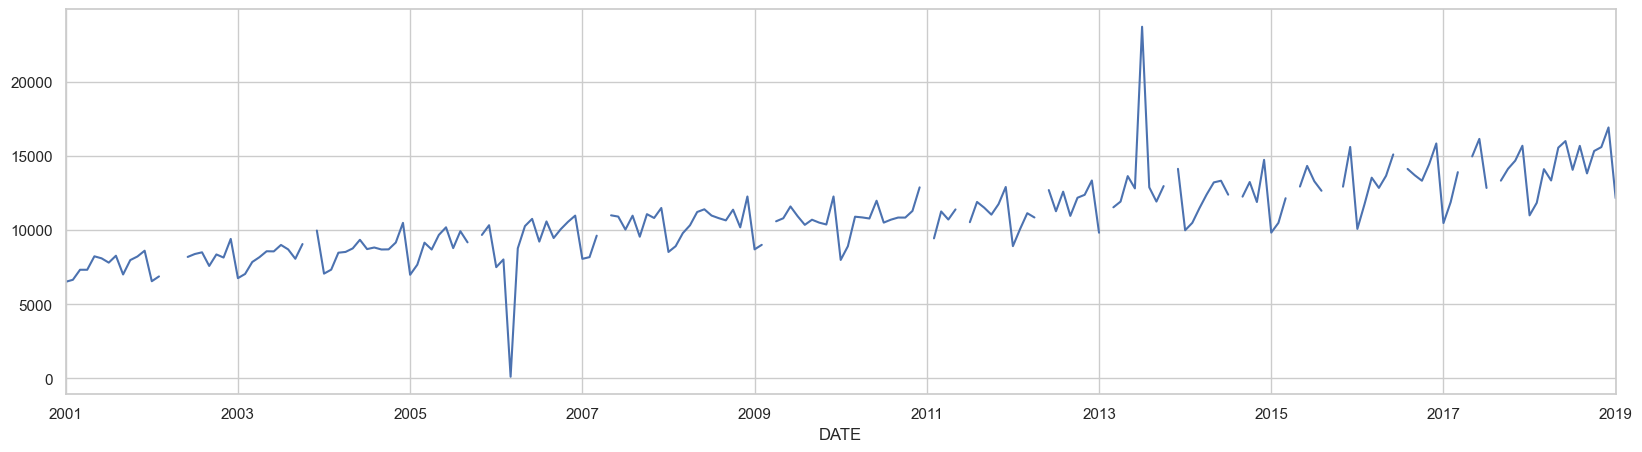

In [6]:
# plotting the time series data
mobile_sales["Sales"].plot()

# Handling Missing Values in Time Series Analysis
Never drop missing data in time series. This is because, there are components of seasonality present in the time series data, and the future values are predicted using the past values. Therefore, the element of time is very important for prediction, missing even one value will result in missing out on the accuracy of the future values.

# Imputation Techniques in Time Series

In [7]:
# finding the dates for which the sales values are missing
mobile_sales.loc[mobile_sales["Sales"].isna()]

Sales
DATE             
2002-03-01    NaN
2002-04-01    NaN
2002-05-01    NaN
2003-11-01    NaN
2005-10-01    NaN
2007-04-01    NaN
2009-03-01    NaN
2011-01-01    NaN
2011-06-01    NaN
2012-05-01    NaN
2013-02-01    NaN
2013-11-01    NaN
2014-08-01    NaN
2015-04-01    NaN
2015-09-01    NaN
2015-10-01    NaN
2016-07-01    NaN
2017-04-01    NaN
2017-08-01    NaN

In [8]:
# trying mean imputation
mobile_sales["Sales"].mean()

10842.757575757576

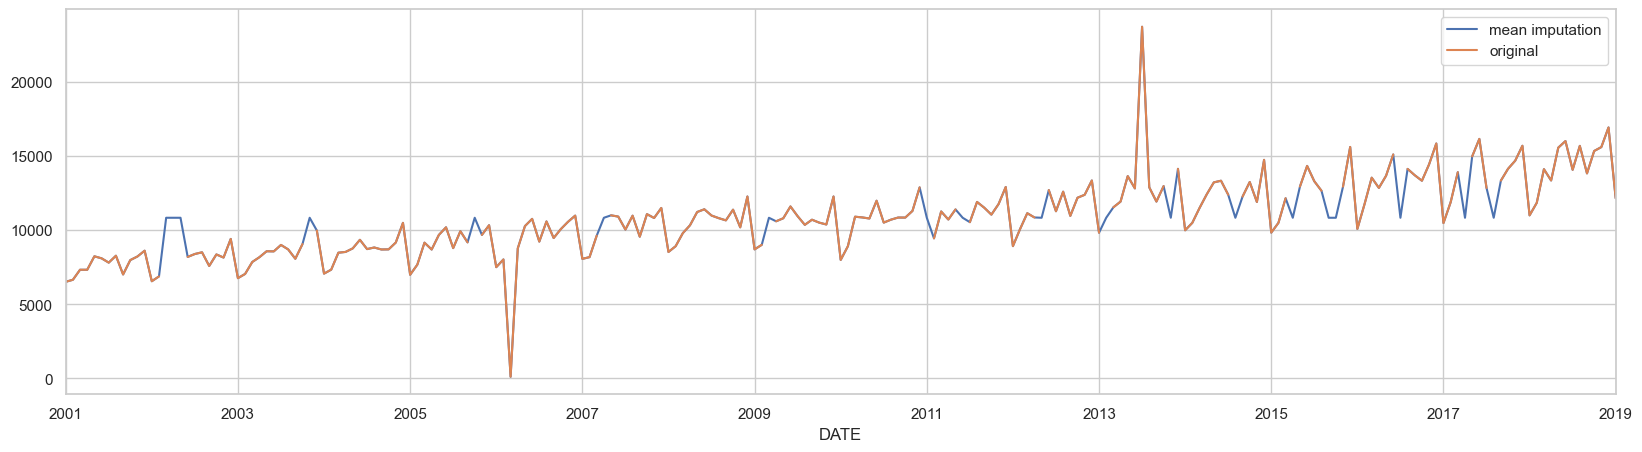

In [9]:
mobile_sales["Sales"].fillna(mobile_sales["Sales"].mean()).plot(label = "mean imputation")
mobile_sales["Sales"].plot(label = "original")
plt.legend()

In [10]:
# trying median imputation
mobile_sales["Sales"].median()

10745.0

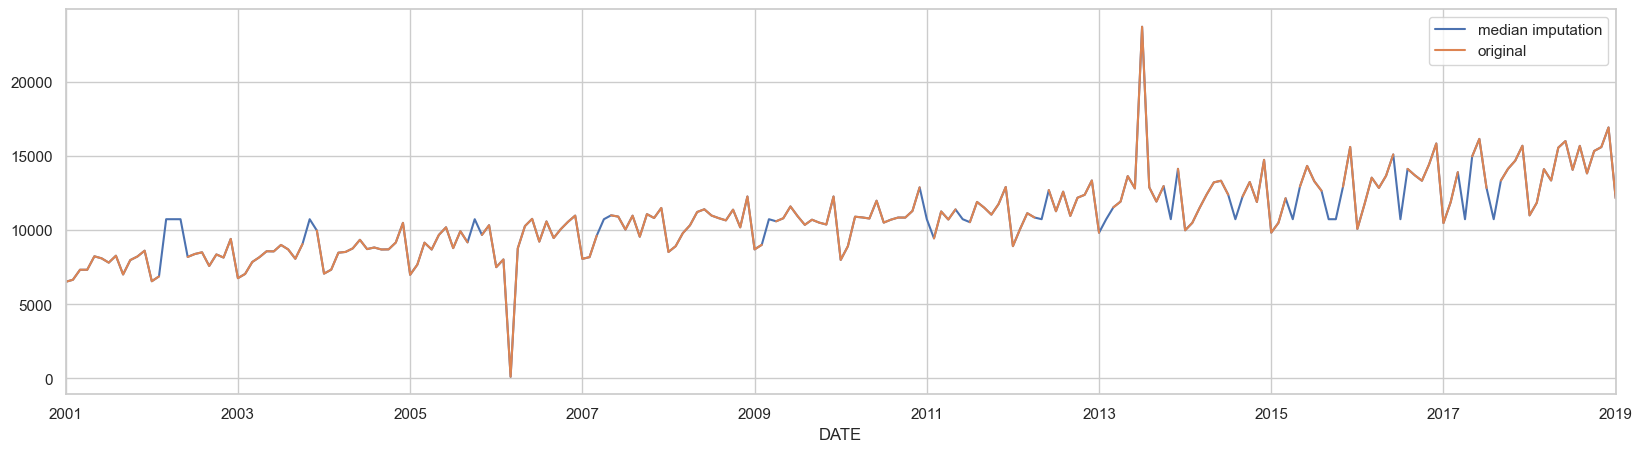

In [11]:
mobile_sales["Sales"].fillna(mobile_sales["Sales"].median()).plot(label = "median imputation")
mobile_sales["Sales"].plot(label = "original")
plt.legend()

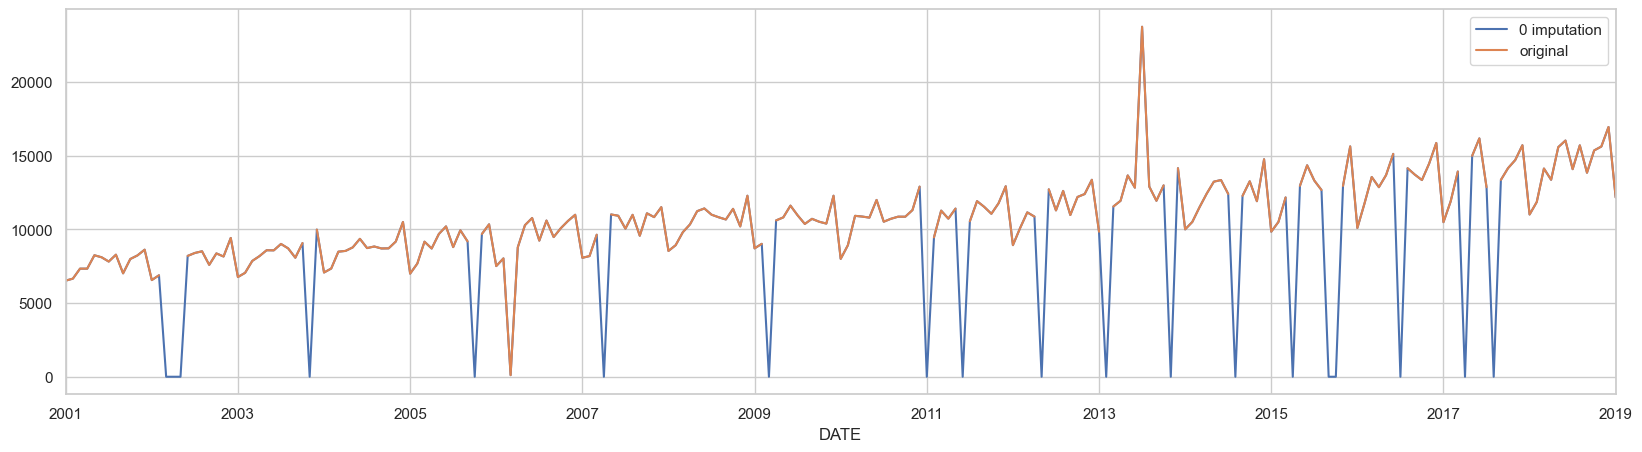

In [12]:
# imputing the missing values with 0
mobile_sales["Sales"].fillna(0).plot(label = "0 imputation")
mobile_sales["Sales"].plot(label = "original")
plt.legend()

It is clear from all of this that the missing values cannot be replaces with a global value (mean, median, mode) or a random value (0).

The values occurring before and after the missing values can be looked at for imputation. This technique is called as Interpolation.

In interpolation technique, the average of n values before and n values after the missing value is used to impute the missing value. This technique is called as centered moving average.

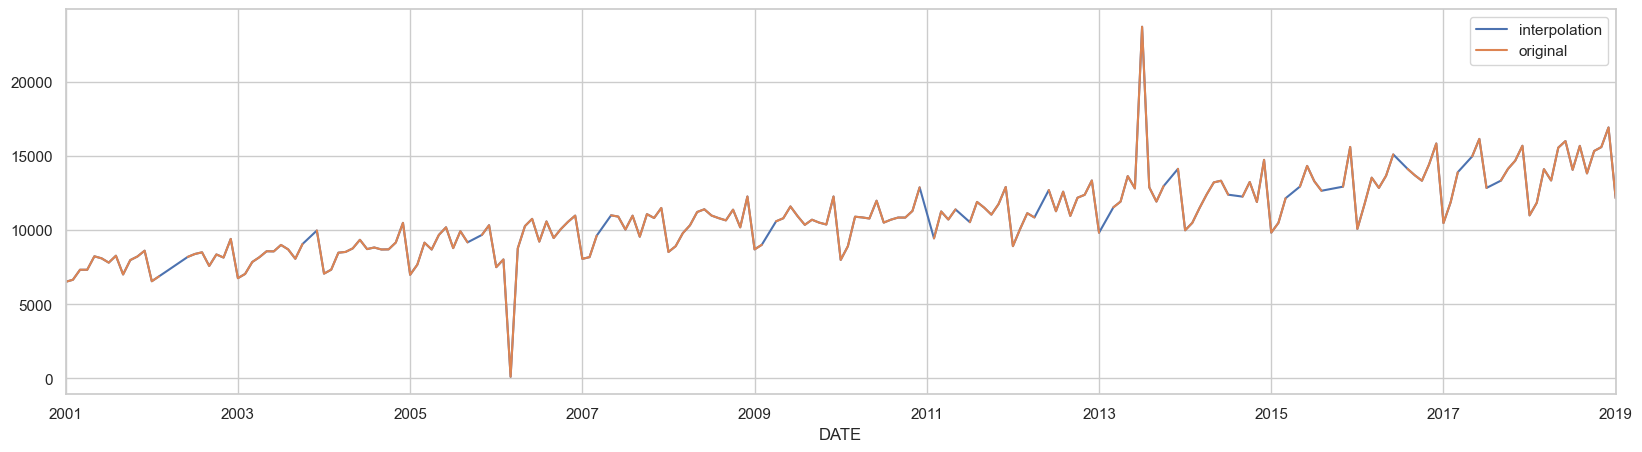

In [13]:
# imputation using the interpolation technique
mobile_sales["Sales"].interpolate(method = "linear").plot(label = "interpolation")
mobile_sales["Sales"].plot(label = "original")
plt.legend()

This definitely looks more convincing visually as well.

In [14]:
mobile_sales["Sales"] = mobile_sales["Sales"].interpolate(method = "linear")
mobile_sales.isna().sum()

Sales    0
dtype: int64

# Outliers Treatment in Time Series Analysis
It appears that there is one instance between 2005 - 2007, and another instance between 2013 - 2015 that appear to be outliers.

[]

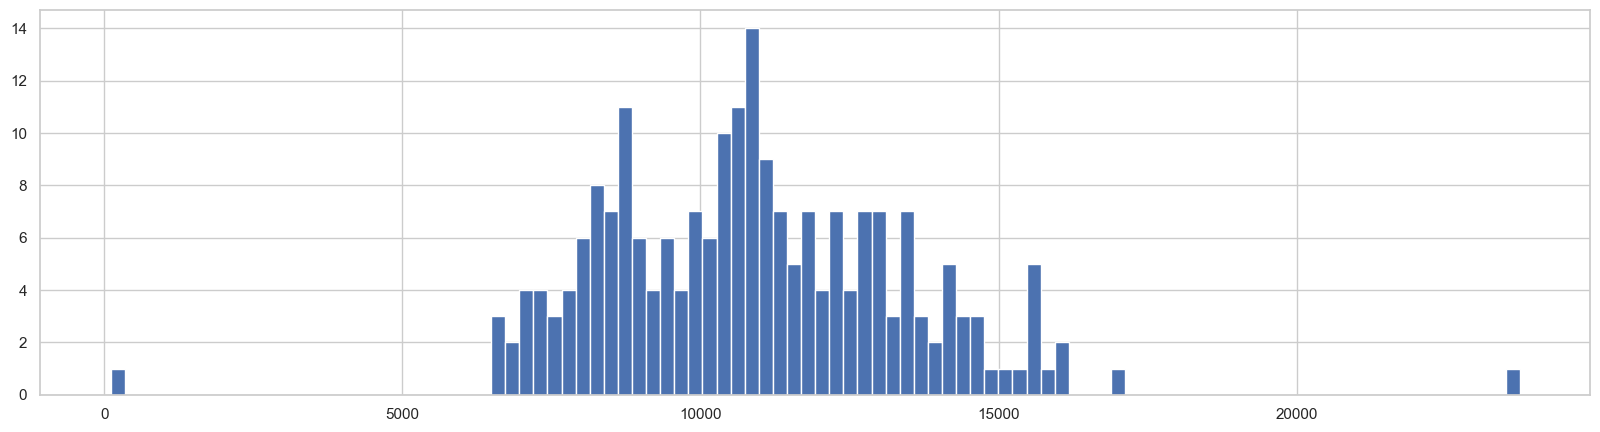

In [15]:
# visualizing the outliers using histograms
mobile_sales["Sales"].hist(bins = 100).plot()

Outliers can be handled using either one of the following two techniques:
- Trimming
- Winsorizing

### Trimming
- Trimming involves removing a certain percentage of data from both tails of the distribution.
- For example, if 5% is trimmed from each tail of the dataset, the lowest and the highest 5% of the data is removed.
- Trimming helps to reduce the influence of extreme values on statistical estimates and can make the analysis more robust to outliers.
- However, trimming may lead to loss of information, particularly if the extreme values contain important insights or represent genuine observations.

### Winsorizing
- Winsorizing is a method that replaces extreme values (outliers) with less extreme values, typically by setting them to the value of a specified percentile.
- For example, if winsorization is performed at 95th percentile, any value below 2.5th percentile are set to the value at the 2.5th percentile, and any value above the 97.5th percentile are set to the value at the 97.5th percentile.
- Winsorizing retains the shape of the distribution while reducing the impact of the outliers.
- It is less extreme than trimming because it does not completely remove the outlier values but rather moderates their influence.

Since data entries cannot be dropped while working with time series, winsorizing is the goto technique to deal with the outliers.

The standard practice is to floor at 5% and cap at 95%. But this is may vary to suit the objective.

In [16]:
# finding the value at 5th percentile
mobile_sales["Sales"].quantile(0.05)

7307.8

In [17]:
# finding the value at 95th percentile
mobile_sales["Sales"].quantile(0.95)

15164.599999999997

<Axes: xlabel='DATE'>

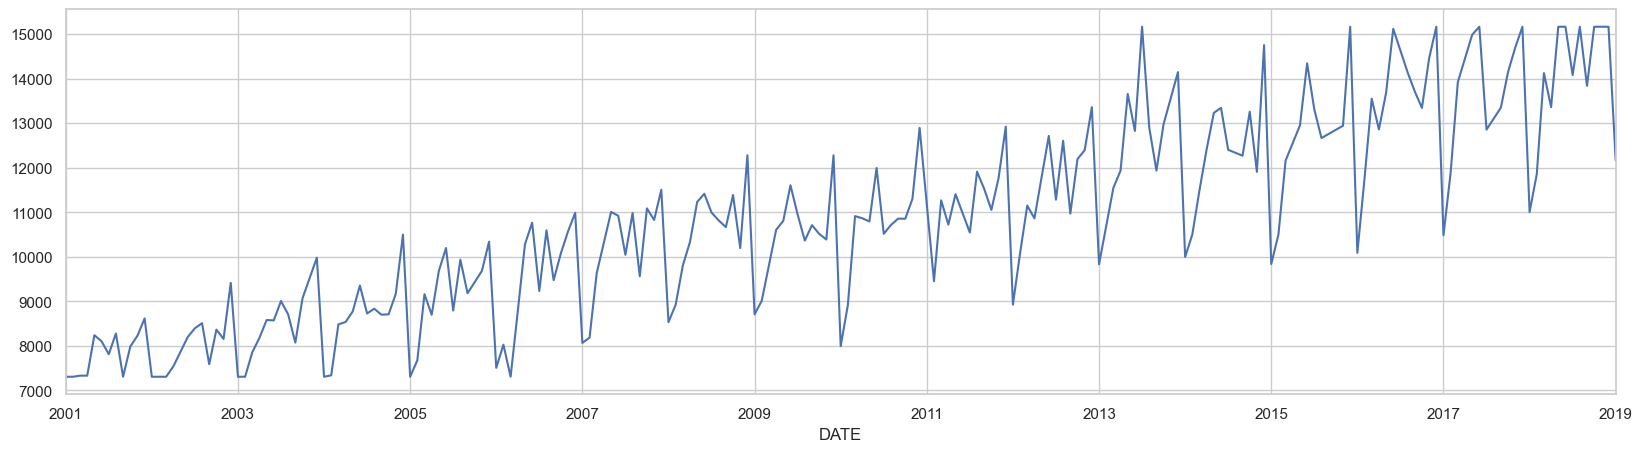

In [18]:
# applying the winsorizing technique
mobile_sales["Sales"].clip(upper = mobile_sales["Sales"].quantile(0.95), lower = mobile_sales["Sales"].quantile(0.05)).plot()

<Axes: xlabel='DATE'>

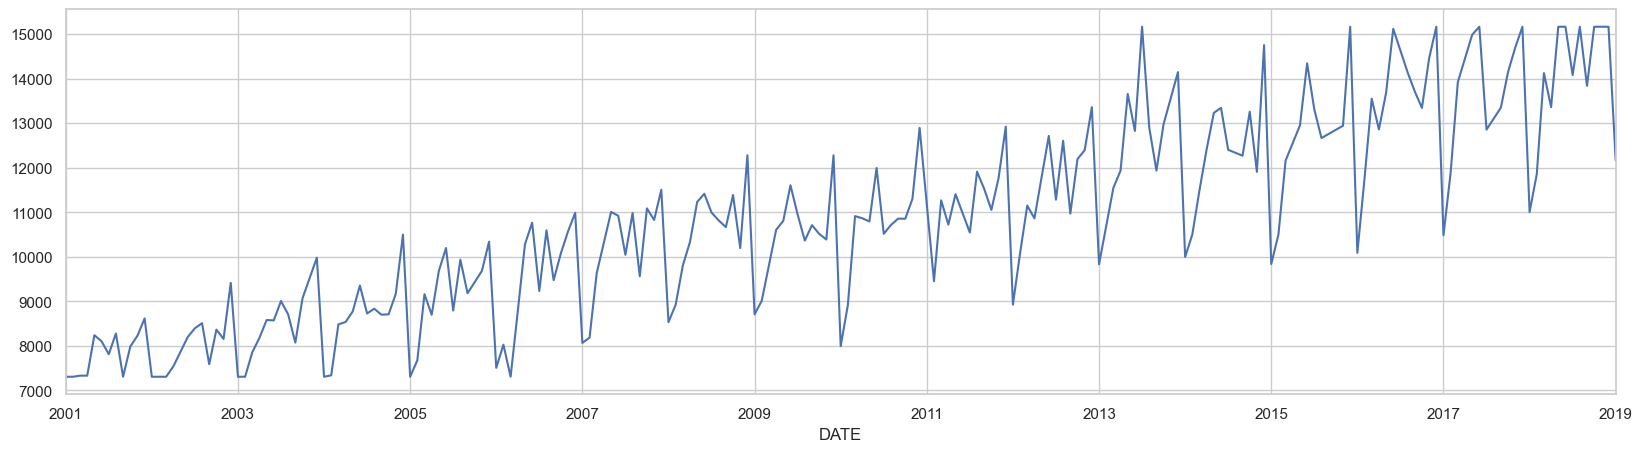

In [19]:
mobile_sales["Sales"] = mobile_sales["Sales"].clip(upper = mobile_sales["Sales"].quantile(0.95), lower = mobile_sales["Sales"].quantile(0.05))
mobile_sales["Sales"].plot()

# Breakdown of Time Series Components
Time series data has 4 components,
1. Level: Level is defined as base value on which the forecast is built upon.
2. Trend: Trend is the fashion in which the time series data is growing in.
3. Seasonality: Seasonality is the repeated pattern that is observed in the plot of the dataset. The repetition can be daily, weekly, monthly, quarterly etc.
4. Error

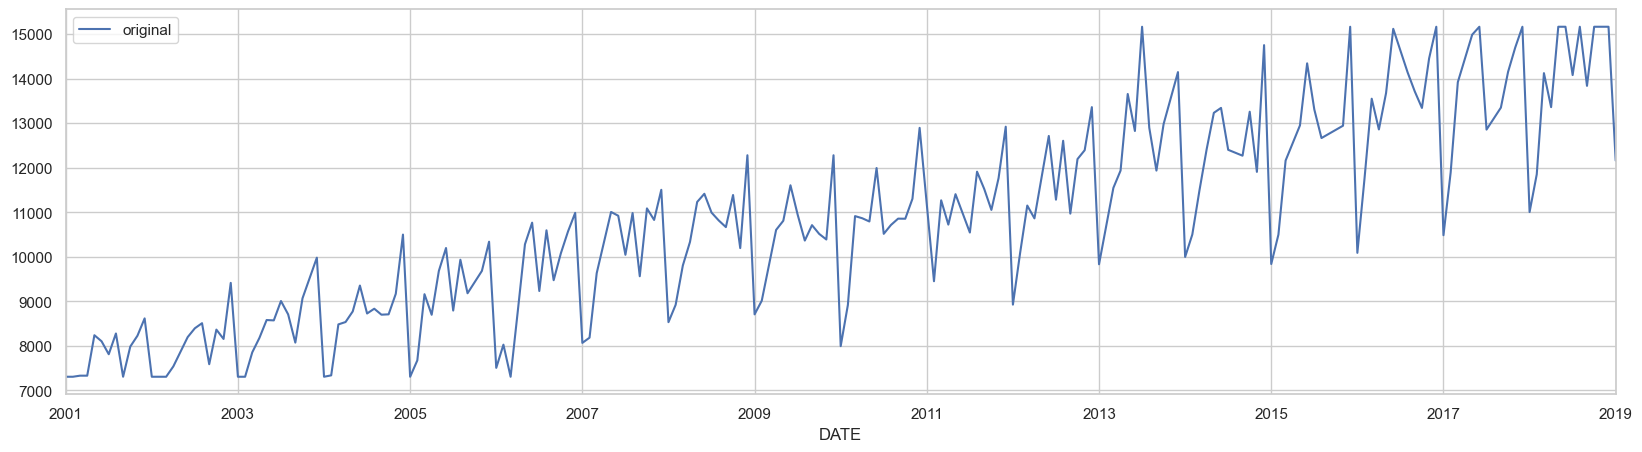

In [20]:
# plotting the original data
mobile_sales["Sales"].plot(label = "original")
plt.legend()

Level is the starting point of the plot at 2001. Trend is the general pattern that a straight line follows, if it is drawn from the start point to the end point.

If the trend is subtracted from the plot, and only the pattern is considered, what remains is called seasonality. Therefpre, seasonality is the repeated pattern that is observed in the plot of the dataset. The repetition can be daily, weekly, monthly, quarterly, yearly, etc.

To differentiate between trend and seasonality, trend is the direction in which the plot is moving in, upwards, downwards, flat trend. Seasonality is the repetitive pattern that is pbserved in the trend.

### High Level Representation of Time Series
Time Series y(t) = Level + Trend(t) + Seasonality(t) + Error

# Averages
Consider the following dataset,

dataset = {
    "Class": [7, 8, 9],
    "Students": [10, 20, 15],
    "Weight": [50, 60, 70]
}

### What is the average weight of students in this School?
There are 2 ways to find the average weight,
1. The traditional way of finding average = (50 + 60 + 70)/ 3
2. The weighted average = ((10 * 50) + (20 * 60) + (15 * 70))/ 45

The first method of calculating average is incorrect in this scenario, because the number of students in each class are different.

If the average of the entire school is to be calculated, weighted average is used. If the average of a class within school is to be calculated, normal average is used.

### How is this concept used in forecasting
Consider interpolation where the average of n values before, and n values after are considered, to fill the missing values. Similarly, the average of 1 to n entries, where n is the current column number, is calculated as a column of interest is traversed through.

This simple yet widely used technique is called as Moving Average. In time series, this concept is used to perform the task of forecasting.

Consider that the temperature in Bangalore tomorrow needst o be predicted. The temperature values recorded for the past few days are considered to perform this task. The number of past days that should b considered is an open choice, i.e., MA(3), MA(7), MA(14), etc. [MA(n) is the Moving Average of n numbers].

Moving average is used for smoothening as well. Smoothening is where the moving average of past n entries is considered, this helps in smoothening the peaks in trend. Questions like, "what is the average time spent on an application?", can be answered more accurately or in a more realistic fashion with this technique.

Say a forecast is being developed by looking into 7 days. Should equal weightage be given to all the data points, or should higher weightage be given to more recent data points, and lee weightage be given to past data points? This makes sense, because the temperature for tomorrow is going to be more closer to today's temperature. This techinique is called as weighted moving average. The Python pandas package has a method called rolling() that helps in achieving this.

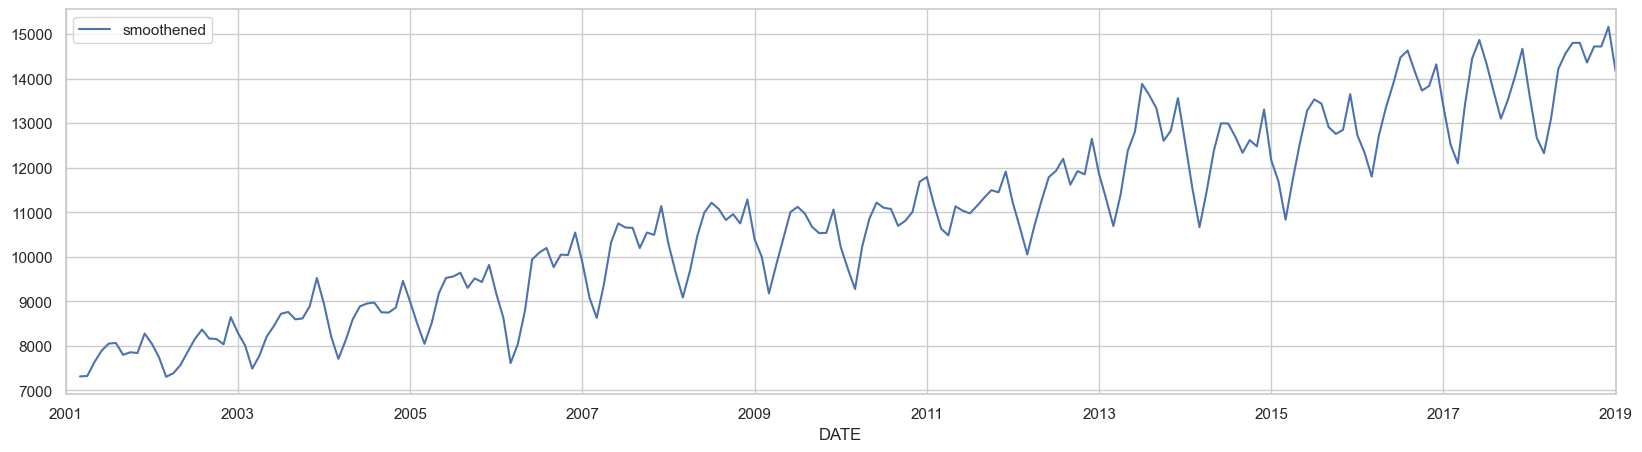

In [21]:
mobile_sales["Sales"].rolling(3, center = False).mean().plot(label="smoothened")
plt.legend()

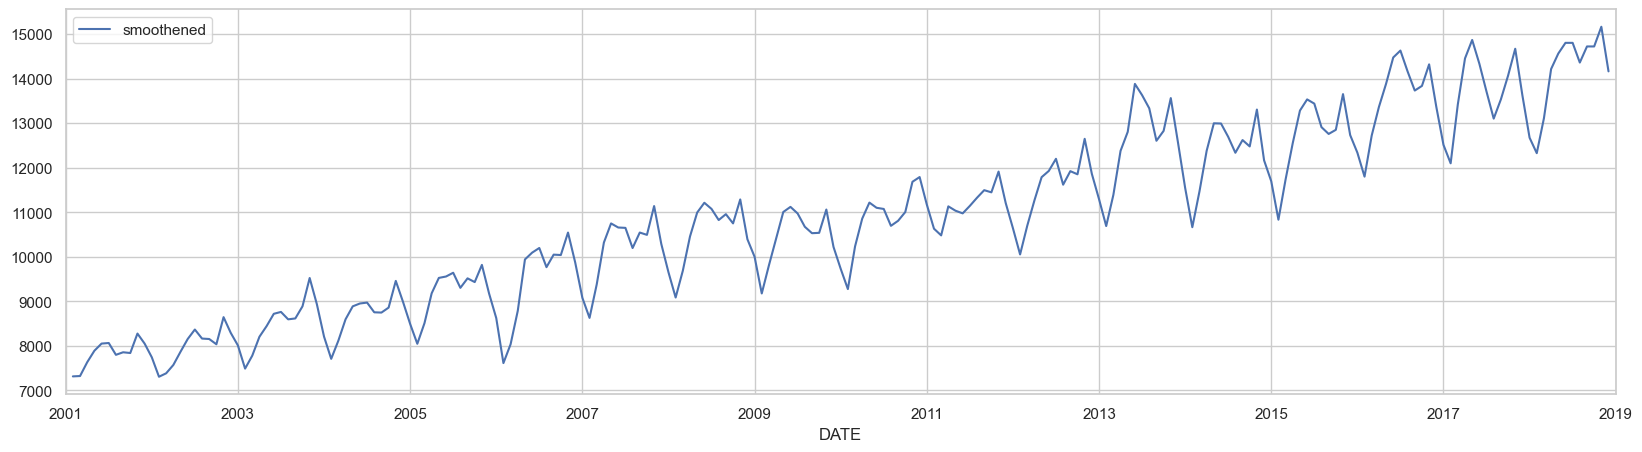

In [22]:
mobile_sales["Sales"].rolling(3, center = True).mean().plot(label = "smoothened")
plt.legend()

The difference betwee the two statements lies in how the rolling window is positioned relative to the data points when calculating the rolling mean:
1. "mobile_sales["Sales"].rolling(3, center = False).mean().plot(label="smoothened")":
    - Here, "center = False" means that the rolling windoe is not centered on the data points but rather anchored to the right side.
    - In other words, the rolling mean at each point is calculated using the current data point and the two preceding data points.
    - This configuration is useful for trailing averages where the rolling windiw moves along the data series from left to right, and each point in the plot corresponds to he right end of the rolling window.
2. "mobile_sales["Sales"].rolling(3, center = True).mean().plot(label="smoothened")":
    - In contrast, "center = True" venters the rolling window on the data points.
    - This means that the rolling window spans an equal number of data points before and after the current point.
    - The rolling mean at each point is calculated using one data point before the current data point, and one data point after.
    - As a result, the rolling mean series is shifted to the right by half of the window width compared to the first approach.
    - This configuration is useful for obtaining smoother and more centered averages, often used when you want to reduce the effects of short-term fluctuations while preserving the overall trend.

In summary, the difference lies in how the rolling windoe is positioned relative to the data points, affecting the alignment and interpretation of the resulting smoothed curve. The choice between "center = False" and "center = True" depends on the specific analysis requirements and the desired characteristics of the smoothened curve.

When "center = True", the value for which the moving average is being calculated for will start to come in the center.

# Trend
Trend is the increasing or decreasing behavior in the series over a period of time.

The data can have one of the following trends,
1. Uptrend
2. Downtrend
3. Changing
4. Flat trend

Generally, the best way to plot a trend line is to consider a long-term moving average.

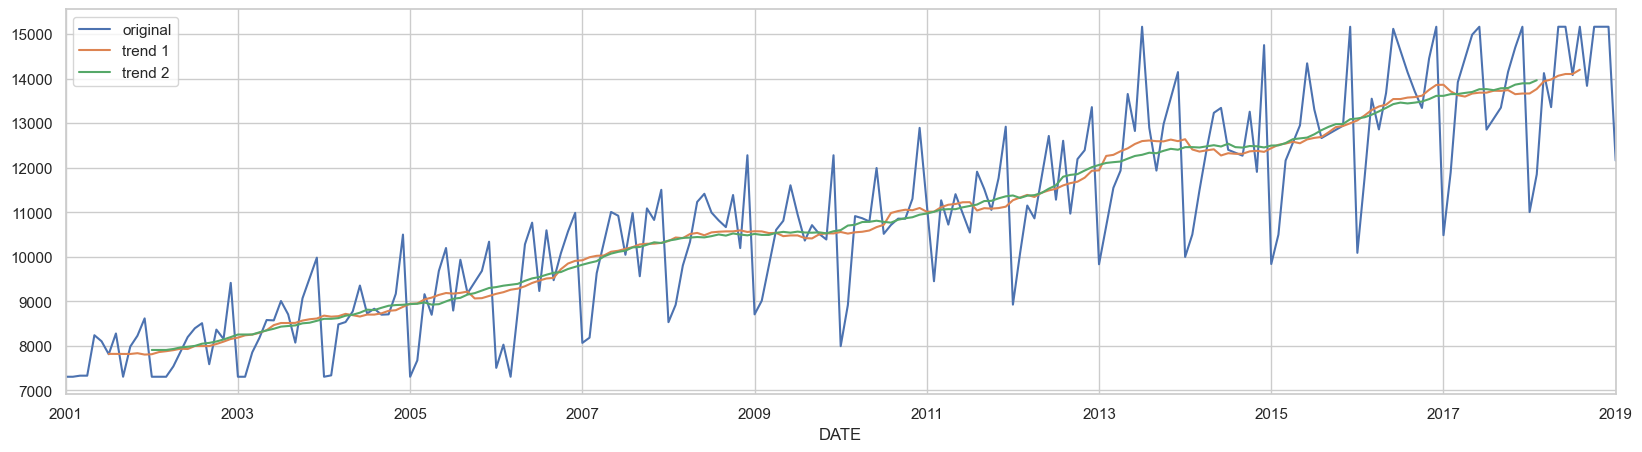

In [23]:
mobile_sales["Sales"].plot(label = "original")
mobile_sales["Sales"].rolling(12, center = True).mean().plot(label = "trend 1")
mobile_sales["Sales"].rolling(24, center = True).mean().plot(label = "trend 2")
plt.legend()

The R2 score tells the direction of the trend line,
- If the R2 score is > 0, there is an upward trend observed.
- If the R2 score is < 0, there is a downward trend observed.

Or the line can be found with an equation y = mx + c,
- If m > 0, there is an upward trend observed.
- If m < 0, there is a downward tren observed.

# Seasonality
If the data is analyzed at the same intervals (monthly, quarterly, yearly), and if a repetitive pattern is observed, this would be called as seasonality.

Seasonality is time series refers to a pattern that occurs at a regular interval. It can be called just a simple repeating wave.

Making copies of seasonality is always of a fixed and known period. In fact, the assumption that a time series can be predicted is due to the fact that it is repeatable. 

# Time Series Decomposition
Time series is made up of the following elements,

Time Series = Level + Trend + Seasonality + Error

y(t) = l + b(t) + s(t) + e(t)

Where,
- l = level of time series
- b(t) = trend of time series
- s(t) = seasonality of time series
- e(t) = error of time series

Level does not havea time component associated with it.

The equation of linear regression is given by,

y = (w.T * x) + e

Where,
- w = weight
- x = independent variable
- e = error

The trend will be the slope of this line.

The time series is almost similar to the equation of linear regression, if an observation is made.

# Types of Time Series
There are 2 types of time series,
1. Additive: y(t) = l + b(t) + s(t) + e(t)
2. Multiplicative: y(t) = l * b(t) * s(t) * e(t)

The peaks and troughs in multiplicative decomposition are higher and lower, which is opposite in additive decomposition.

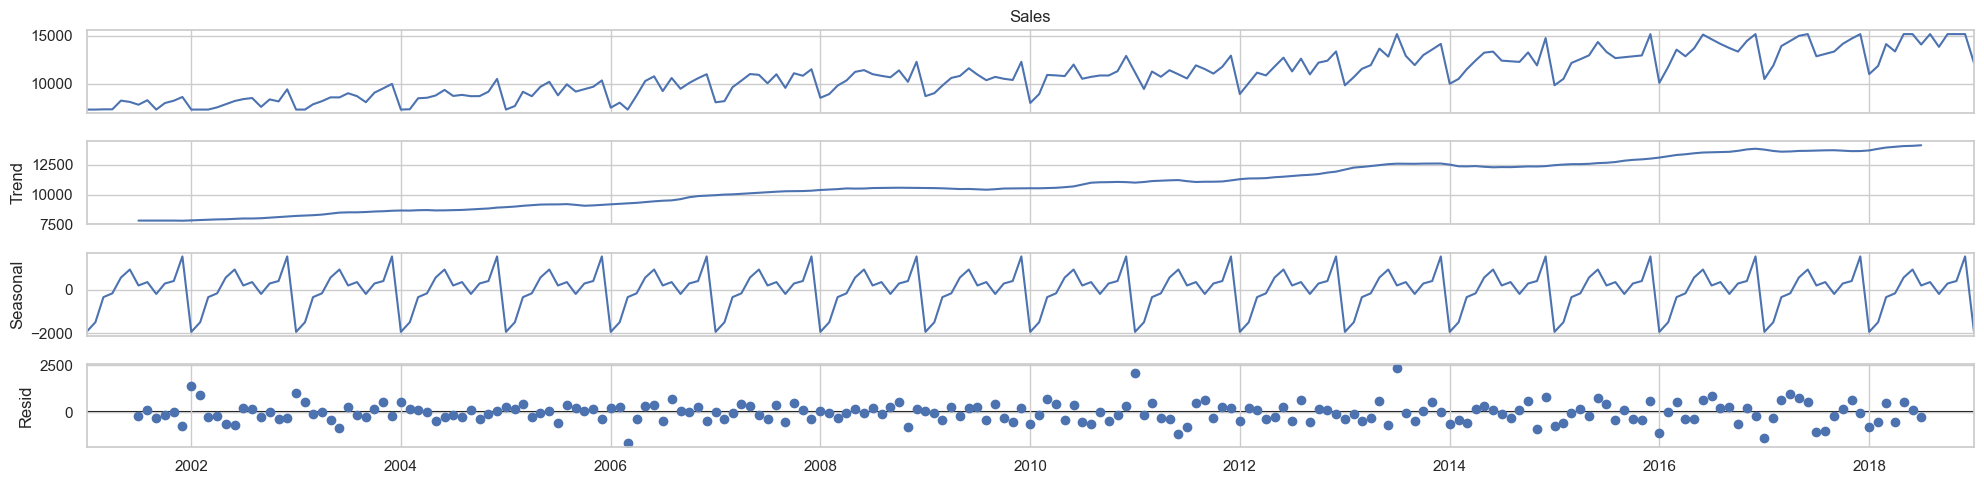

In [24]:
# additive decomposition
import statsmodels.api as sm

additive_model = sm.tsa.seasonal_decompose(mobile_sales["Sales"], model = "additive")

additive_model.plot(); # make sure that the semi-colon is added at the end

- The first plot is that of the actual time series data.
- The second plot is that of the trend.
- The third plot is that of the seasonality.
- The fourth plot is that of the error/ residual.

The error component in time series, like in linear regression, needs to be normally distributed. The mean of the error should be close to 0.

<Axes: >

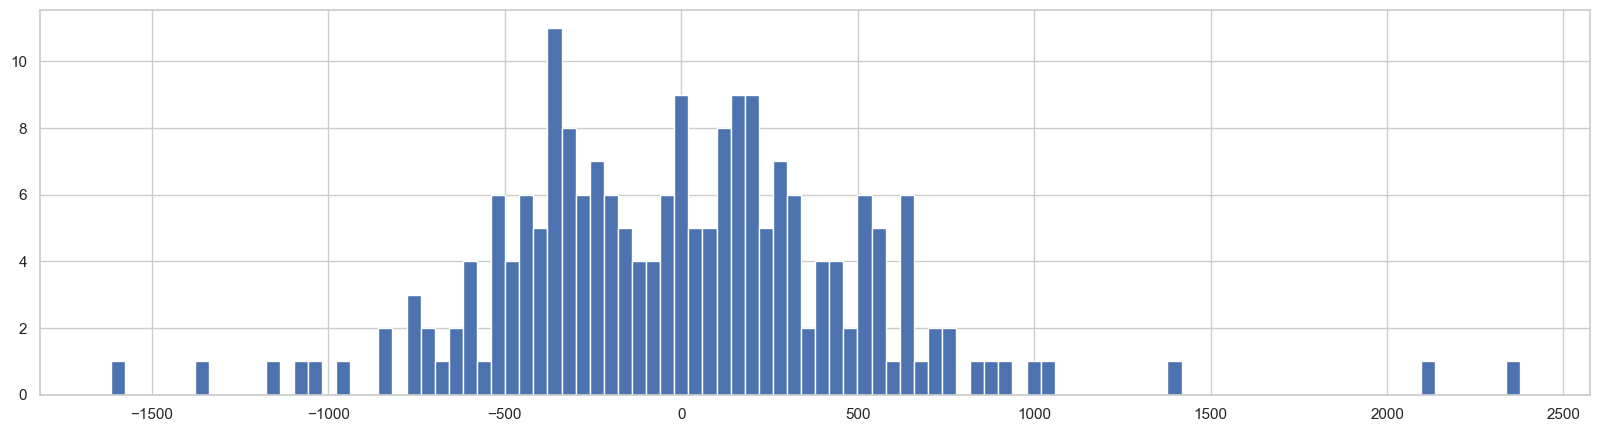

In [25]:
# visualizing the residuals (errors) of the additive model
additive_model.resid.hist(bins = 100)

In [26]:
# calculating the mean of the errors of the additive model
additive_model.resid.mean()

-2.5477736928096792

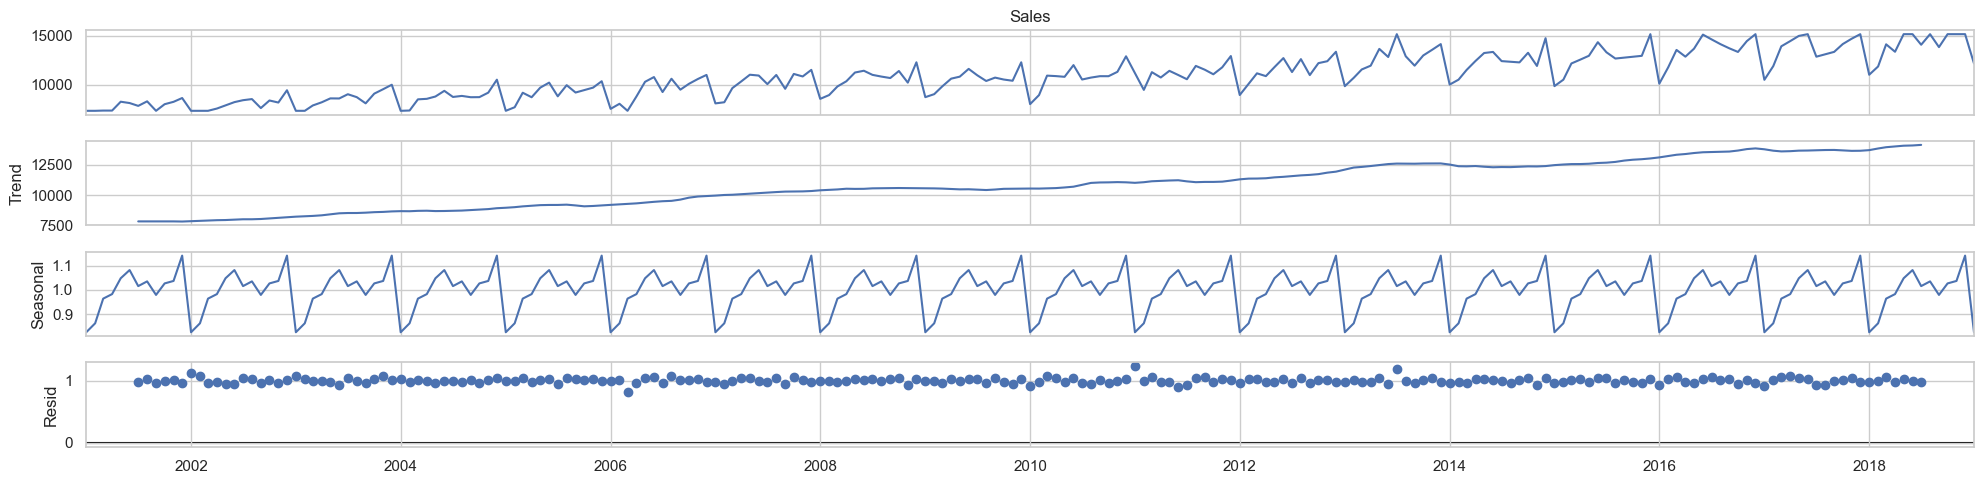

In [27]:
# multiplicative decomposition
multiplicative_model = sm.tsa.seasonal_decompose(mobile_sales["Sales"], model = "multiplicative")

multiplicative_model.plot();

<Axes: >

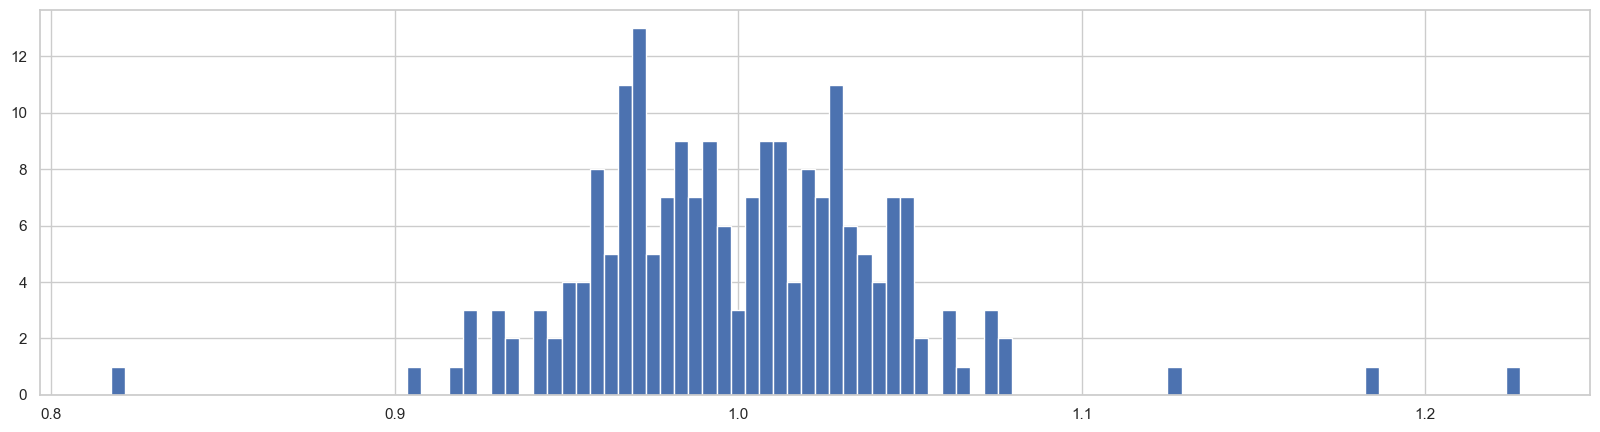

In [28]:
# visualizing the residuals of the multiplicative model
multiplicative_model.resid.hist(bins = 100)

In [29]:
# calculating the mean of the errors of the multiplicative model
multiplicative_model.resid.mean()

0.9997808377981765

Generally when the error in data does not have a normal distribution, and the mean of errors in ≠ 0, it means that the error also has some time series (error is also increasing or decreasing with time). Further decomposition of error should be done until it becomes normally distributed.

If the error is high, not all the time elements in the data are being captured. Therefore, the forecast will be of low quality.

# Mean Absolute Percentage Error and other Metrics

### MAPE
There are multiple metrics like MSE, RMSE, MAE, MAPE, etc.

For forecasting, MAPE is preferred over RMSE, because RMSE gives the relative performance. Meaning, it only gives a value and does not define what the value represents. If M1 has an RMSE of 15 and M2 has an RMSE of 25, then M1 is better than M2. Meaning, a comparison cannot be done over in what way 25 is better than 15.

Where as MAPE gives an idea about the absolute performance. MAPE stands for Mean Absolute Percentage Error. It is defined as,

MAPE = np.mean(np.abs(y_true - y_pred)/ y_true) * 100

Where,
- y_true = true value
- y_pred = predicted value

Essentially, how off is the predicted value from the actual value is found using MAPE. Meaning, if MAPE = 37.5%, then the predicted value is off by 37.5% from the actual value.

The only place where MAPE cannot be calculated is when y_true = 0.

There is no accepted range of MAPE as such, it varies from industry to industry, or objective to objective.

### Other Metrics
The following function can be used evalute the performance,

In [30]:
# importing the metrics
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# creating a function to print values of all these metrics
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

# Train-Test Split in Time Series Analysis
In linear regression, the split is done such that, train set is assigned 80% of the data, and the test set with the remaining 20% of the data.

In time series analysis, on the contrary, train-test split cannot be done. This is because, the order of time is very important while forecasting.

Therefore, if there are 200 points, and if the split should be done such that train set has 70% of the data and test set has 30% of the data, the first 140 points are assigned to the train set and the remaining 60 points are assigned to the test set.

The split is done by slicing, and not by traditional train-test split.

In [31]:
# defining the cutoff date from train set
train_cutoff_date = mobile_sales.index[-12]

# assigning the values to the train set
train_x = mobile_sales.loc[mobile_sales.index < train_cutoff_date].copy()

# assigning the values to the test set
test_x = mobile_sales.loc[mobile_sales.index >= train_cutoff_date].copy()

# viewing if the split has worked or not
train_x, test_x

(              Sales
 DATE               
 2001-01-01   7307.8
 2001-02-01   7307.8
 2001-03-01   7332.0
 2001-04-01   7332.0
 2001-05-01   8240.0
 ...             ...
 2017-09-01  13349.0
 2017-10-01  14150.0
 2017-11-01  14698.0
 2017-12-01  15164.6
 2018-01-01  11005.0
 
 [205 rows x 1 columns],
               Sales
 DATE               
 2018-02-01  11852.0
 2018-03-01  14123.0
 2018-04-01  13360.0
 2018-05-01  15164.6
 2018-06-01  15164.6
 2018-07-01  14080.0
 2018-08-01  15164.6
 2018-09-01  13838.0
 2018-10-01  15164.6
 2018-11-01  15164.6
 2018-12-01  15164.6
 2019-01-01  12160.0)

The latest data is more important than older data in future prediction. This is because there are multiple events occuring in the real time. More specifically, the latest data is important to understand the trend, past data helps in understanding the seasonality.

Random splittig of data into train and test sets should be avoided, because the sequence of data is disrupted, Since the time is a crucial parameter in predicting the manner in which the data is arranged. Meaning, what happens in April 2024, depends greatly on what happened in March 2024, than on what had happened in March 2023.

Things to keep in mind:
- Indexing is done on date.
- Train-Test split is not random.
- Latest data will go into test.

# Mean Forecasting
Say there is a plot of time versus sales, and prediction has to be made for t+1, t+2, t+3, ... and so on. In order to do so, the mean of the entire data points is calculated, and this calculated mean value is considered as the forecast for t+1.

This procedure is repeated for t+2, t+3, ... (the previous value, i.e., t+1 is considered as well while forecasting for t+2).

Adding a mean value to the dataset, does not change the mean of the dataset.

This very simple forecasting technique is generally used while making a short term prediction.

In [32]:
# calculating the mean of the train set
train_x["Sales"].mean()

10659.16

In [33]:
# creating a new column for the predictions
test_x["pred"] = train_x["Sales"].mean()
test_x

Sales      pred
DATE                         
2018-02-01  11852.0  10659.16
2018-03-01  14123.0  10659.16
2018-04-01  13360.0  10659.16
2018-05-01  15164.6  10659.16
2018-06-01  15164.6  10659.16
2018-07-01  14080.0  10659.16
2018-08-01  15164.6  10659.16
2018-09-01  13838.0  10659.16
2018-10-01  15164.6  10659.16
2018-11-01  15164.6  10659.16
2018-12-01  15164.6  10659.16
2019-01-01  12160.0  10659.16

<Axes: xlabel='DATE'>

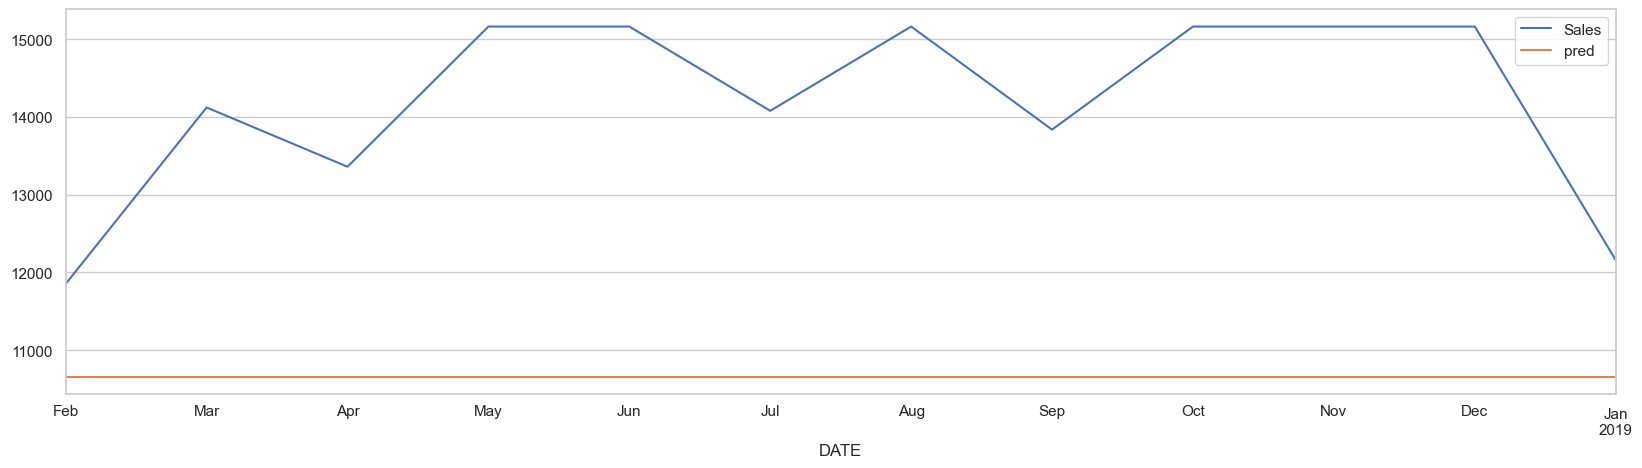

In [34]:
# plotting
test_x.plot()

In [35]:
# computing the performance of the mean model
performance(test_x["Sales"], test_x["pred"])

MAE : 3540.89
RMSE : 3725.69
MAPE: 0.244


As evident, trend and seasonality is not captured in this technique.

# Naive Technique (A Noob's Approach to Forecasting)
Naive technique states that, if a forecast is to be made at time = t, then look into the t-1 value, and use this to forecast. Meaning, instead of the mean of the data, the latest data in the dataset is considered as the forecast.

In [36]:
# selecting the value at the latest index in the train set
train_x["Sales"][-1]

11005.0

In [37]:
# creating a new column for the predictions
test_x["pred"] = train_x["Sales"][-1]
test_x

Sales     pred
DATE                        
2018-02-01  11852.0  11005.0
2018-03-01  14123.0  11005.0
2018-04-01  13360.0  11005.0
2018-05-01  15164.6  11005.0
2018-06-01  15164.6  11005.0
2018-07-01  14080.0  11005.0
2018-08-01  15164.6  11005.0
2018-09-01  13838.0  11005.0
2018-10-01  15164.6  11005.0
2018-11-01  15164.6  11005.0
2018-12-01  15164.6  11005.0
2019-01-01  12160.0  11005.0

<Axes: xlabel='DATE'>

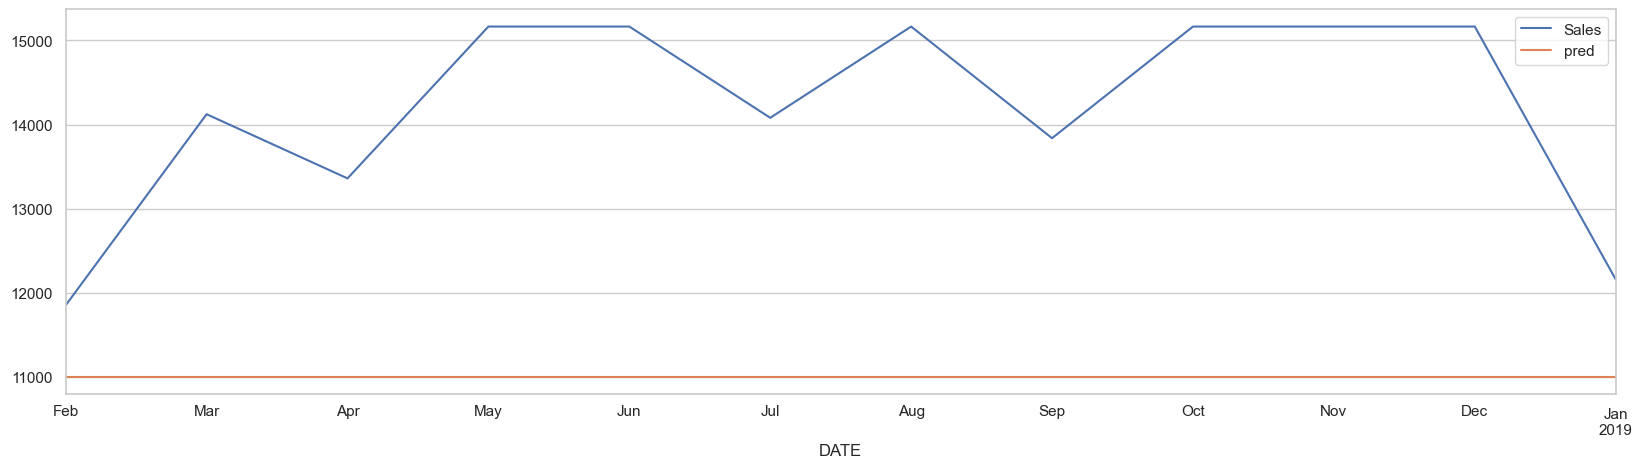

In [38]:
# plotting
test_x.plot()

In [39]:
# computing the performance of the naive model
performance(test_x["Sales"], test_x["pred"])

MAE : 3195.05
RMSE : 3398.707
MAPE: 0.219


Trend and seasonality is not captured in this technique. The only difference between this and the mean method is that, more weightage is assigned to the recent data.

# Seasonal Naive Approach
A year old data is considered, i.e., from Jan 2023 to Dec 2023. In the naive technique, all of the data points from Jan 2023 to Dec 2023 would have the same value, which is, Dec 2022.

In seasonal naive technique, an element of seasonality is captured. Meaning, Jan 2023 would have the same values as Jan 2022, Feb 2023 would have the same value as Feb 2022, and so on. This way some element of seasonality is captured in this technique.

In [40]:
test_x["pred"] = None

for i in test_x.index:
	test_x.loc[i]["pred"] = train_x.loc[i - pd.DateOffset(years=1)]["Sales"]

test_x

Sales  pred
DATE                     
2018-02-01  11852.0  None
2018-03-01  14123.0  None
2018-04-01  13360.0  None
2018-05-01  15164.6  None
2018-06-01  15164.6  None
2018-07-01  14080.0  None
2018-08-01  15164.6  None
2018-09-01  13838.0  None
2018-10-01  15164.6  None
2018-11-01  15164.6  None
2018-12-01  15164.6  None
2019-01-01  12160.0  None

In [41]:
test_x["pred"] = train_x["Sales"][-12: ]
test_x

train_x["Sales"][-12: ]

DATE
2017-02-01    11891.0
2017-03-01    13921.0
2017-04-01    14453.5
2017-05-01    14986.0
2017-06-01    15164.6
2017-07-01    12856.0
2017-08-01    13102.5
2017-09-01    13349.0
2017-10-01    14150.0
2017-11-01    14698.0
2017-12-01    15164.6
2018-01-01    11005.0
Name: Sales, dtype: float64

# Drift Technique
In seasonal naive technique, the seasonality is captured to an extent, but the trend is not captured at all. The question remains, how to capture if the time series is increasing / decreasing? The drift technique is used to address this.

Consider a plot of time versus sales, say that there is an increasing trend observed. If this is the case, it it generally expected that, in the forecast, the trend will be increasing as well.

The concept of slope is used to bake this element in. Slope is given by,

m = (y_t - y_0)/ (t - t_0)

Consider,

y = mx + c

m = (y_t+h - y_t)/ ((t + h) - t)

y_t+h = y_t + m * h

Where,
- y_t = latest value in the train set
- m = slope
- h = steps being predicted in the future

The assumption is that if there is an increasing trend observed from y_0 to y_t, then the trend should continue into y_t+1, y_t+2, and so on.

The value y_t+1 is calculated using,
- y_t+1 = y_t + m * 1

Similarly, the value y_t+2 is calculated using,
- y_t+2 = y_t + m * 2

In [42]:
# last value in the train set
y_t = train_x["Sales"][-1]

# computing m
m = (y_t - train_x["Sales"][0])/ len(train_x)

# number of future values
h = np.linspace(0, len(test_x) - 1, len(test_x))

# creating a new column for the predictions
test_x["pred"] = y_t + m * h

test_x

Sales          pred
DATE                             
2018-02-01  11852.0  11005.000000
2018-03-01  14123.0  11023.035122
2018-04-01  13360.0  11041.070244
2018-05-01  15164.6  11059.105366
2018-06-01  15164.6  11077.140488
2018-07-01  14080.0  11095.175610
2018-08-01  15164.6  11113.210732
2018-09-01  13838.0  11131.245854
2018-10-01  15164.6  11149.280976
2018-11-01  15164.6  11167.316098
2018-12-01  15164.6  11185.351220
2019-01-01  12160.0  11203.386341

<Axes: xlabel='DATE'>

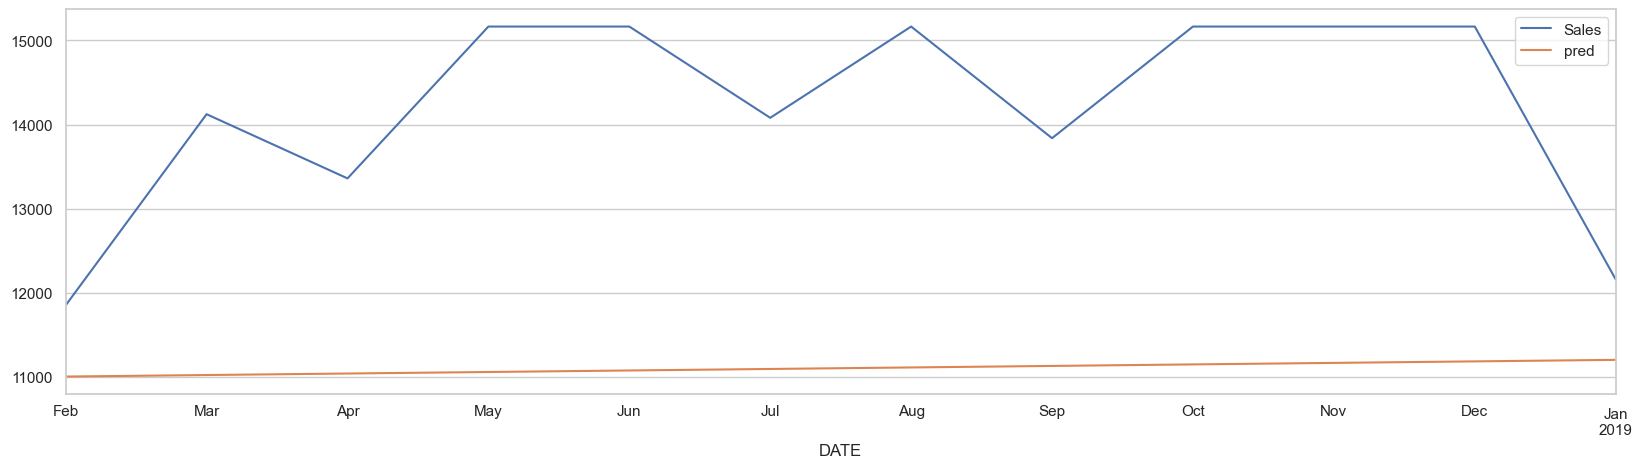

In [43]:
# plotting
test_x.plot()

In [44]:
# computing the performance of the drift model
performance(test_x["Sales"], test_x["pred"])

MAE : 3095.857
RMSE : 3301.099
MAPE: 0.212


This method captures the trend, but not the seasonality.

It is also clear from this that, seasonality is an important component that has to be captured than trend in order to get a better prediction.

#### NOTE:
All the simple forecasting techniques are employed when a something quick and hacky is required. These techniques generate forecasts which have very low fidelity or low confidence. These are not meant for long term use.

# Moving Averages
Consider 4 students,

Students = {
    "student": ["A", "B", "C", "D"],
    "age": [10, 12, 14, 11],
    "moving_average": [10, 11, 12, 11.75]
}

Instead of looking into the mean value, or the latest value, the dataset has to be chosen in such a way that both trend and seasonality are captured.

The moving average uses the mean technique with a small change. Instead of choosing the entire dataset, only a few entries are considered. By considering only the last few entries, the trend is captured. At the same time, only the latest data is chosen. Meaning, if forecasting for Jan 2023, consider calculating the average from Jan 2022 to Dec 2022. If forecasting for Feb 2023, consider calculating average from Feb 2023 to Jan 2023.

In [45]:
# creating a copy of the dataset to create a rolling window
df = mobile_sales.copy()
df.head()


Sales
DATE              
2001-01-01  7307.8
2001-02-01  7307.8
2001-03-01  7332.0
2001-04-01  7332.0
2001-05-01  8240.0

In [46]:
# checking the last few dates
mobile_sales.tail(10)

Sales
DATE               
2018-04-01  13360.0
2018-05-01  15164.6
2018-06-01  15164.6
2018-07-01  14080.0
2018-08-01  15164.6
2018-09-01  13838.0
2018-10-01  15164.6
2018-11-01  15164.6
2018-12-01  15164.6
2019-01-01  12160.0

In [47]:
# adding 12 future dates to the DataFrame
pd.DataFrame(index = pd.date_range(start = df.index[-1], periods = 12, freq = "MS"))

Empty DataFrame
Columns: []
Index: [2019-01-01 00:00:00, 2019-02-01 00:00:00, 2019-03-01 00:00:00, 2019-04-01 00:00:00, 2019-05-01 00:00:00, 2019-06-01 00:00:00, 2019-07-01 00:00:00, 2019-08-01 00:00:00, 2019-09-01 00:00:00, 2019-10-01 00:00:00, 2019-11-01 00:00:00, 2019-12-01 00:00:00]

In [48]:
# appending the future dates to the original DataFrame
# df = df.append(pd.DataFrame(index = pd.date_range(start = df.index[-1], periods = 13, freq = "MS")[1: ]))
# df.tail(20)
# df.append() is depricated for pandas versions 2.0.0 and above, use pd.concat()

df = pd.concat([df, pd.DataFrame(index = pd.date_range(start = df.index[-1], periods = 13, freq = "MS")[1: ])])
df.tail(20)

Sales
2018-06-01  15164.6
2018-07-01  14080.0
2018-08-01  15164.6
2018-09-01  13838.0
2018-10-01  15164.6
2018-11-01  15164.6
2018-12-01  15164.6
2019-01-01  12160.0
2019-02-01      NaN
2019-03-01      NaN
2019-04-01      NaN
2019-05-01      NaN
2019-06-01      NaN
2019-07-01      NaN
2019-08-01      NaN
2019-09-01      NaN
2019-10-01      NaN
2019-11-01      NaN
2019-12-01      NaN
2020-01-01      NaN

In [49]:
# calculating 3 months rolling window
# dropping all the null values
pred = df["Sales"].dropna().values
pred

array([ 7307.8       ,  7307.8       ,  7332.        ,  7332.        ,
        8240.        ,  8104.        ,  7813.        ,  8279.        ,
        7307.8       ,  7985.        ,  8229.        ,  8618.        ,
        7307.8       ,  7307.8       ,  7307.8       ,  7540.        ,
        7869.        ,  8198.        ,  8396.        ,  8510.        ,
        7589.        ,  8366.        ,  8156.        ,  9415.        ,
        7307.8       ,  7307.8       ,  7856.        ,  8181.        ,
        8581.        ,  8573.        ,  9008.        ,  8708.        ,
        8074.        ,  9068.        ,  9524.5       ,  9981.        ,
        7307.8       ,  7339.        ,  8483.        ,  8536.        ,
        8774.        ,  9355.        ,  8728.        ,  8835.        ,
        8701.        ,  8709.        ,  9170.        , 10499.        ,
        7307.8       ,  7675.        ,  9161.        ,  8699.        ,
        9682.        , 10198.        ,  8794.        ,  9935.        ,
      

In [50]:
# calculating the moving average
for i in range(12):
    pred = np.append(pred, pred[-3: ].mean())

# looking at the last 20 months
pred[-20: ]

array([15164.6       , 14080.        , 15164.6       , 13838.        ,
       15164.6       , 15164.6       , 15164.6       , 12160.        ,
       14163.06666667, 13829.22222222, 13384.0962963 , 13792.12839506,
       13668.48230453, 13614.90233196, 13691.83767718, 13658.40743789,
       13655.04914901, 13668.43142136, 13660.62933609, 13661.36996882])

In [51]:
# rounding off the predicted values
pred = pred.round(1)
pred[-20: ]

array([15164.6, 14080. , 15164.6, 13838. , 15164.6, 15164.6, 15164.6,
       12160. , 14163.1, 13829.2, 13384.1, 13792.1, 13668.5, 13614.9,
       13691.8, 13658.4, 13655. , 13668.4, 13660.6, 13661.4])

<Axes: >

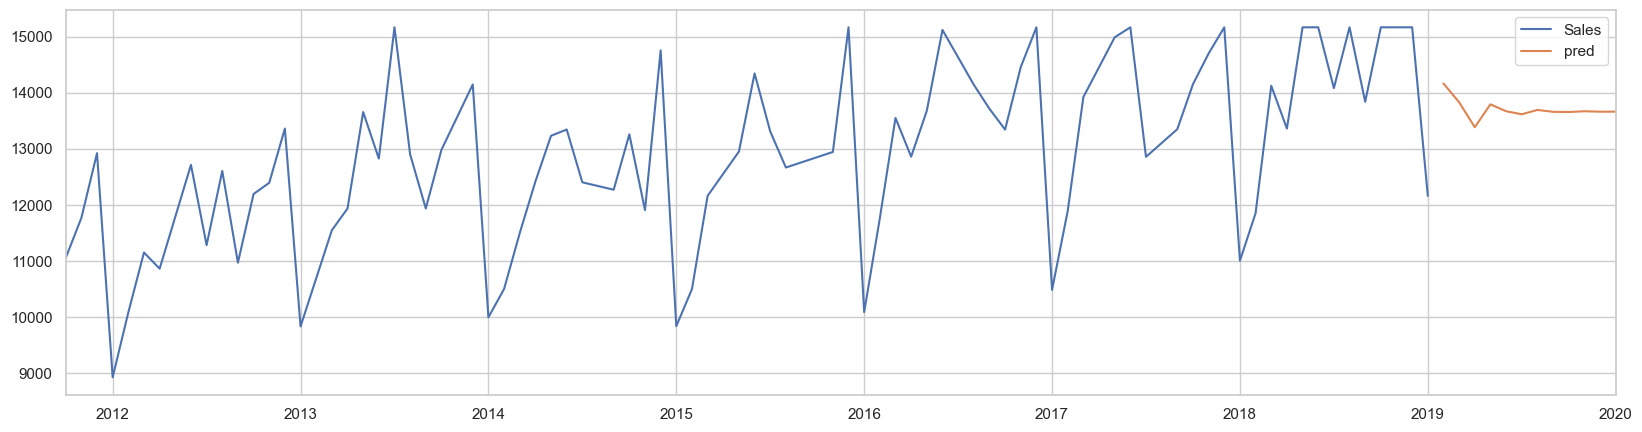

In [52]:
# visualizing
df["pred"] = pred
df.loc[~df["Sales"].isna(), "pred"] = np.nan
df.tail(100).plot()

MAE : 1575.682
RMSE : 1686.831
MAPE: 0.11


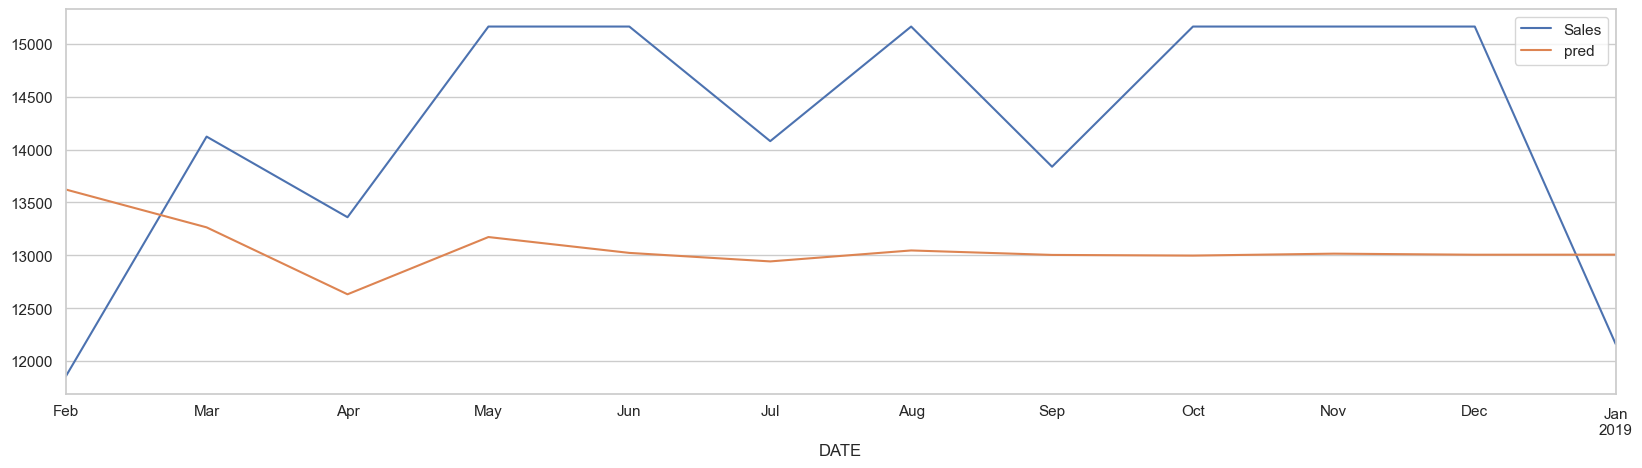

In [53]:
# using the above technique to see how the model works
df = train_x.copy()
df = pd.concat([df, pd.DataFrame(index = pd.date_range(start = df.index[-1], periods = 13, freq = "MS")[1: ])])
pred = df["Sales"].dropna().values

for i in range(12):
    pred = np.append(pred, pred[-3: ].mean())

test_x["pred"] = pred[-12: ]
test_x.plot()
performance(test_x["Sales"], test_x["pred"])

MAE : 1247.799
RMSE : 1364.818
MAPE: 0.088


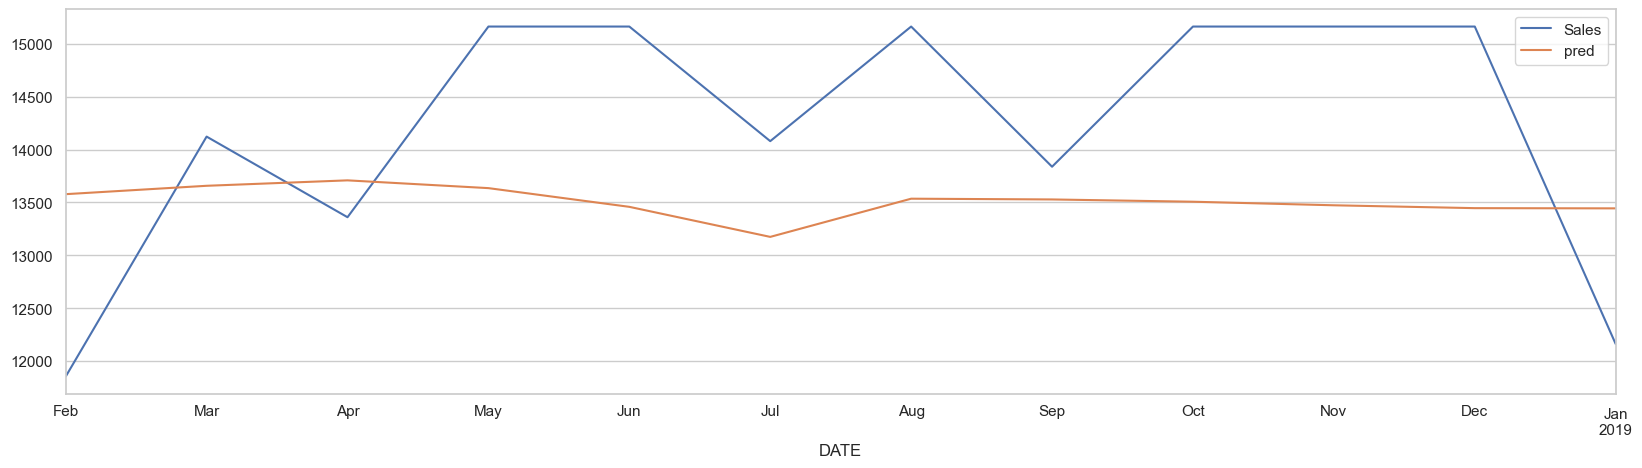

In [54]:
# repeating the same for 6 months moving average
df = train_x.copy()
df = pd.concat([df, pd.DataFrame(index = pd.date_range(start = df.index[-1], periods = 13, freq = "MS")[1: ])])
pred = df["Sales"].dropna().values

for i in range(12):
    pred = np.append(pred, pred[-6: ].mean())

test_x["pred"] = pred[-12: ]
test_x.plot()
performance(test_x["Sales"], test_x["pred"])

MAE : 1099.138
RMSE : 1235.632
MAPE: 0.078


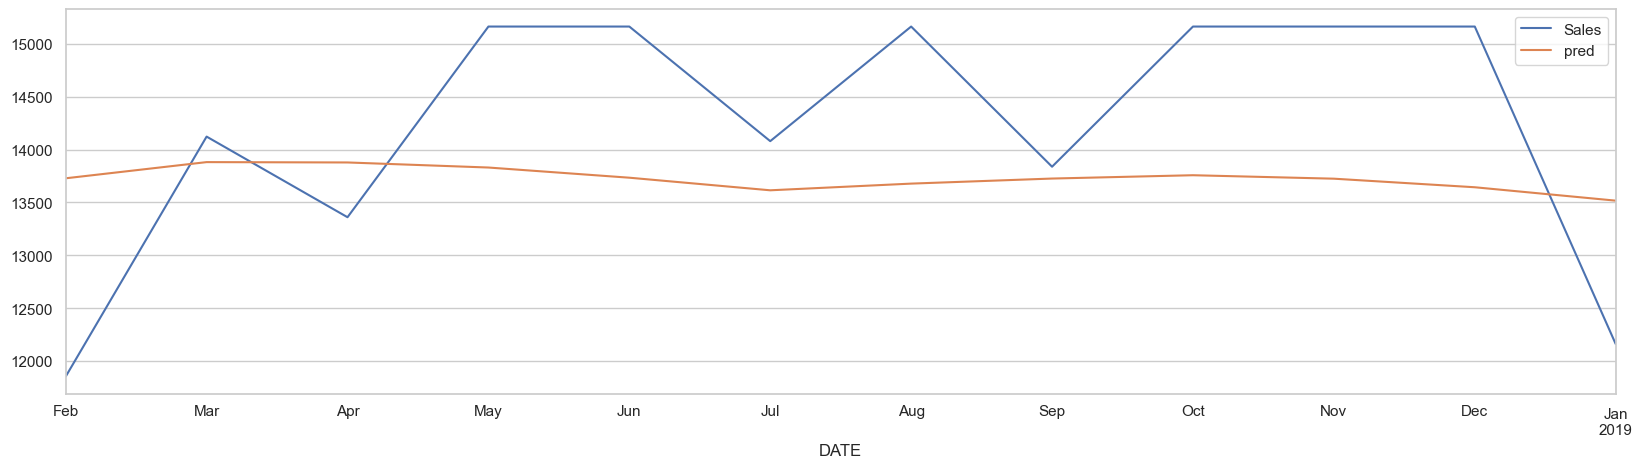

In [55]:
# repeating the same for 12 months moving average
df = train_x.copy()
df = pd.concat([df, pd.DataFrame(index = pd.date_range(start = df.index[-1], periods = 13, freq = "MS")[1: ])])
pred = df["Sales"].dropna().values

for i in range(12):
    pred = np.append(pred, pred[-12: ].mean())

test_x["pred"] = pred[-12: ]
test_x.plot()
performance(test_x["Sales"], test_x["pred"])

Both trend and seasonality are captured to a good extend in this technique.

# Smoothing Based Technique
Consider a plot of Time verus Sales, the trend is flat-drop-flat-drop-flat-drop. This is divided into 3 windows, a, b and c each one representing a flat-drop trend. The mostimportant among them is c while making a prediction.

While predicting for t+1,

y_t+1 = α * y_t + (1 - α) * y_t-1

Where,
- y_t+1 = future prediction
- y_t = latest prediction
- y_t-1 = latest - 1 prediction

Meaning, a weightage of α is given to the latest and a weightage od (1 - α) is given to latest - 1 prediction.

Therefore,

Prediction for t+1 month = (Actual value * α) + ((1 - α) * Prediction for time series till month = t)

While calculating moving average, some or all the data points from the past were considered for computing the average. The problem is that, when a flat average is taken, all the future forecast show no trend or seasonality.

To solve this problem, weightage is assigned to the data points. Most recent data point are assigned the highest weightage and the older data points are assigned with the least weightage.

Generally, if there are n data points, and the weights, α1, α2, α3, ..., αn are assigned to them,

∑αi = α1 + α2 + α3 + ... + αn = 1

Therefore,

∑αi = 1

The plot of Time vs Weight is such that as the time decreases, the weight decreases exponentially. The overall sum would be equal to 1.

This is underlying principle behind forecasting using smoothing techniques.

Consider the following example,

data = {
    "month": ["Jan 2023", "Feb 2023", "March 2023", "April 2023", "May 2023", "June 2023", "Jul 2023"],
    "sales": [100, 150, 160, 180, 200, 250, np.nan]
}

If a prediction is to be made for Jul 2023, the weights would be assigned in the following fashion,

data = {
    "month": ["Jan 2023", "Feb 2023", "March 2023", "April 2023", "May 2023", "June 2023", "Jul 2023"],
    "sales": [100, 150, 160, 180, 200, 250, np.nan],
    "weightage": [0.05, 0.07, 0.08, 0.1, 0.3, 0.05, np.nan]
}

The total weightage assigned = 1.

The prediction for Jul 2023 is mathematically given by,

Jul 2023 = (250 * 0.5) + (200 * 0.3) + (180 * 0.1) + (160 * 0.08) + (150 * 0.07) + (100 * 0.05)

While talking about time series, or whenever making prediction about some time period, the following components are involved,

Time Series = Level + Trend + Seasonality + Error

y(t) = L + b(t) + s(t) + e(t)

Level is the base value at which the forecasting starts.

Consider the following time series,
1. A time series with flat-drop-flat-drop-flat-drop line. This is clearly a declining trend. But if a small window is analyzed, say a flat, there is no trend observed. Also there is no seasonality observed for the same.
2. In a time series with increasing wavy line with small peaks and troughs, a trend is observed, but there is no seasonality.
3. In a time series with increasing wavy line with large peaks and troughs, a trend and seasonality both are observed.

All of the above 1, 2, and 3 are examples of time series, of course with noticeable differences between them.

- To perform any forecasting using the 1st chart, only level and error can be considered, because there is no trend and seasonality. That is, y(t) = Level + Error.
- To perform any forecasting using the 2nd chart, level, trend and error can be considered. That is, y(t) = Level + Trend + Error.
- To perform any forecasting using the 3rd chart, level, trend, seasonality and error can be considered. That is, y(t) = Level + Trend + Seasonality + Error.

### Simple Exponential Smoothing
Consider time series 1, where exponential smoothing has to be performed. If predicting for t+1,

y_t+1 = (α1 * y_t) + (α3 * y_t-1) + (α3 * y_t-2) + (α4 * y_t-3) + ... + (αn * y_t-n)

Where,
- y_t, y_t-1, y_t-2, ... = Level
- α1, α2, α3, ... = weights
- also, α1 > α2 > α3 > ... > αn

Rewriting,

y_t+1 = (α * y_t) + ((1 - α) * y_t_cap)

Where,
- y_t = recent value
- y_t_cap = all historic values

The concept of recursion is used,

y_t+1 = (α * y_t) + ((1 - α) * y_t_cap) ...eq1

y_t_cap can be calculated as,

y_t_cap = (α * y_t-1) + ((1 - α) * y_t-1_cap)

Substitute y_t_cap in eq1,

y_t+1  = (α * y_t) + ((1 - α) * ((α * y_t-1) + ((1 - α) * y_t-1_cap)))

y_t+1 = (α * y_t) + (α(1 - α) * y_t-1) + (α(1 - α) * y_t-1_cap) ...eq2

y_t-1_cap can be calculated as,

y_t-1_cap = (α * y_t-2) + ((1 - α) * y_t-2_cap)

Substitute y_t-1_cap in eq2,

y_t+1 = (α * y_t) + (α(1 - α) * y_t-1) + (α(1 - α) * ((α * y_t-2) + ((1 - α) * y_t-2_cap)))

Expand the above equation.

Therefore,
- y_t is given the weightage of α.
- y_t-1 is given the weightage of α(1 - α).
- y_t-2 is given the weightage of α(1 - α) ** 2.
- y_t-3 is given the weightage of α(1 - α) ** 3.

If α = 0.8, then α(1 - α) = 0.16, α(1 - α) ** 2 = 0.032. When this is plotted, an exponential decline is seen.

To sum it up in simple words,
- A weightage of α is assigned to the most recent data point.
- A weightage of α(1 - α) is assigned to the second most recent data point.
- A weightage of α(1 - α) ** 2 is assigned to the third most recent data point.
- A weightage of α(1 - α) ** 3 is assigned to the fourth most recent data point.
- and so on.

To sum up, Simple Exponential Smoothing, also SES, is applicable when the data has no trend and no seasonality.

In order to predict for t+1, weights are assigned to the data points, highest weight is assigned to the most recent data point. As the recency decreases, the weight value assigned also decreases.

The equation looks as follows,

y_t+1 = (α * y_t) + (α(1 - α) * y_t-1) + (α(1 - α) ** 2 * y_t-2) + (α(1 - α) ** 3 * y_t-3) + ... + (α(1 - α) ** n * y_t-n)

Weight is a hyperparameter here. Generally,

α = 1/ (2 * seasonality)

If the seasonality is repeating after every 12 month, then,

α = 1/ (2 * 12) = 1/ 24

The above will be the starting value of α. But since it is a hyperparameter, it is open for exploration.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


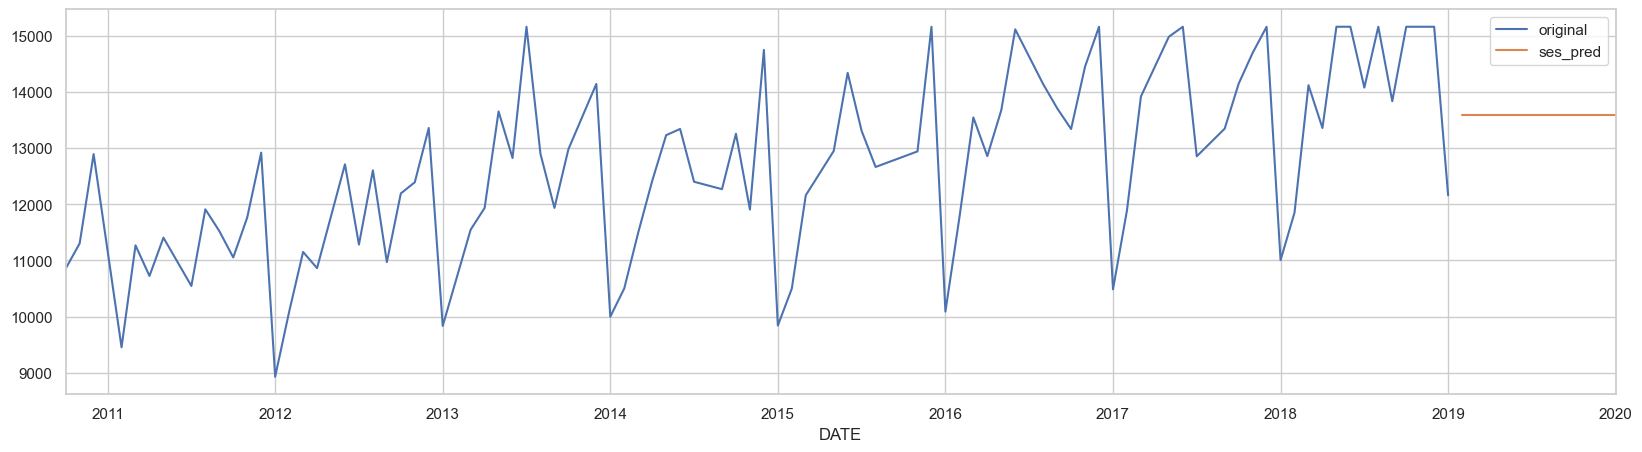

In [56]:
# ses
model = sm.tsa.SimpleExpSmoothing(mobile_sales["Sales"])
model_fit = model.fit(smoothing_level = 1/ 24)
pred = model_fit.forecast(steps = 12)
mobile_sales["Sales"].tail(100).plot(label = "original")
pred.plot(label = "ses_pred")
plt.legend()

The observed output is flat for the predicted values, this is because both the trend and seasonality are not picked up which is the assumption of SES. SES only considers Level + Error.

MAE : 1426.325
RMSE : 1558.716
MAPE: 0.099


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


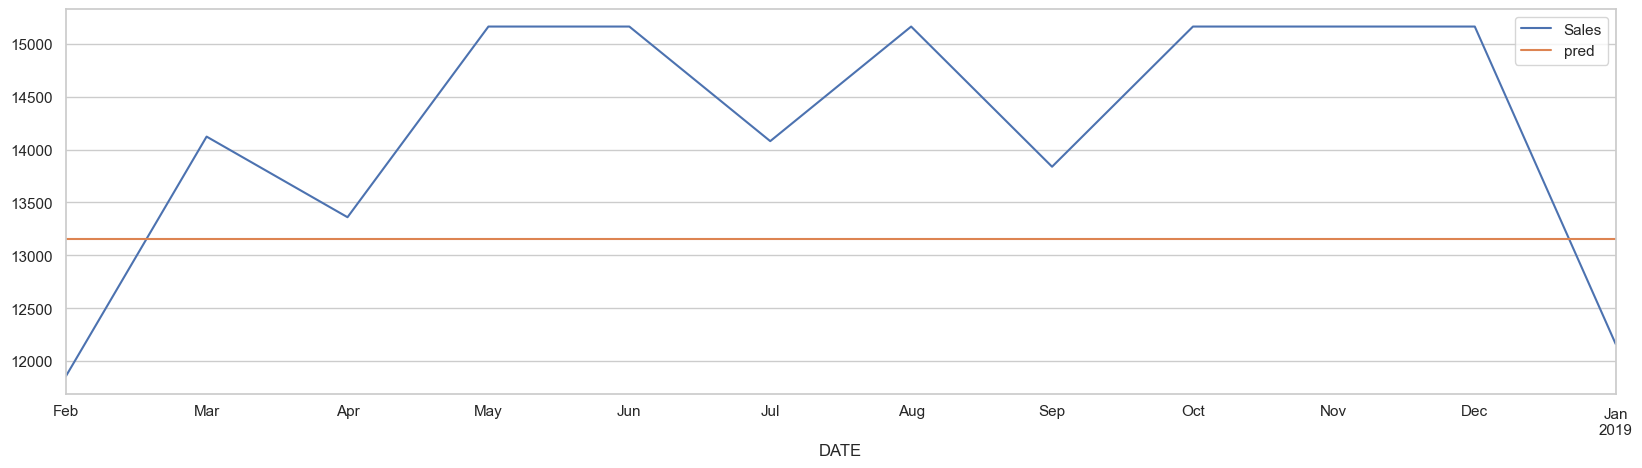

In [57]:
# calculating the model performance
model = sm.tsa.SimpleExpSmoothing(train_x["Sales"])
model_fit = model.fit(smoothing_level = 1/ 24)
test_x["pred"] = model_fit.forecast(steps = 12)
test_x.plot()
performance(test_x["Sales"], test_x["pred"])

SES is evidently not fit for this use case, as the data contains trend and seasonality.

### Double Exponential Smoothing (Holt Method)
Double Exponential Smoothing is abbreviated as DES. In this technique, dataset which has time series 2 is considered. The time series is represented as,

y(t) = Level + Trend + Error

Similar to SES, exponential smoothing is applied to,
1. Level
2. Trend

The prediction for t+1 would be made as follows,

y_t+1_cap = Level + Trend

The slope between y_t and y_t+1 is calculated as,

Slope = (y_t+1 - y_t)/ ((t + 1) - t)

Slope is also called as Trend (b(t)).

Therefore,

y_t+1 = y_t + b

If predicting for t+3,

y_t+3 = y_t + (b * 3)

This is the general equation. The b also has a component of time associated with it. In this case there are 2 smoothing parameters, α and β.

Where,
- α = smoothing of level
- β = smoothing of trend

The most recent data point will be given a higher weightage, and older data points will be given a lower weightage.

y_t+1_cap = ((α * y_t) + (α(1 - α) * y_t-1) + (α(1 - α) ** 2 * y_t-2)) + ((β * b_t) + (β(1 - β) * b_t-1) + (β(1 - β) ** 2 * b_t-2))

This method is also called Holt's method. Refer this: https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html

This method is used to deal with smoothing of trend or seasonality. Where as SimpleExpSmoothing() is used while dealing with just level.

- α = smoothing level
- β = smoothing trend
- γ = smoothing seasonality

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


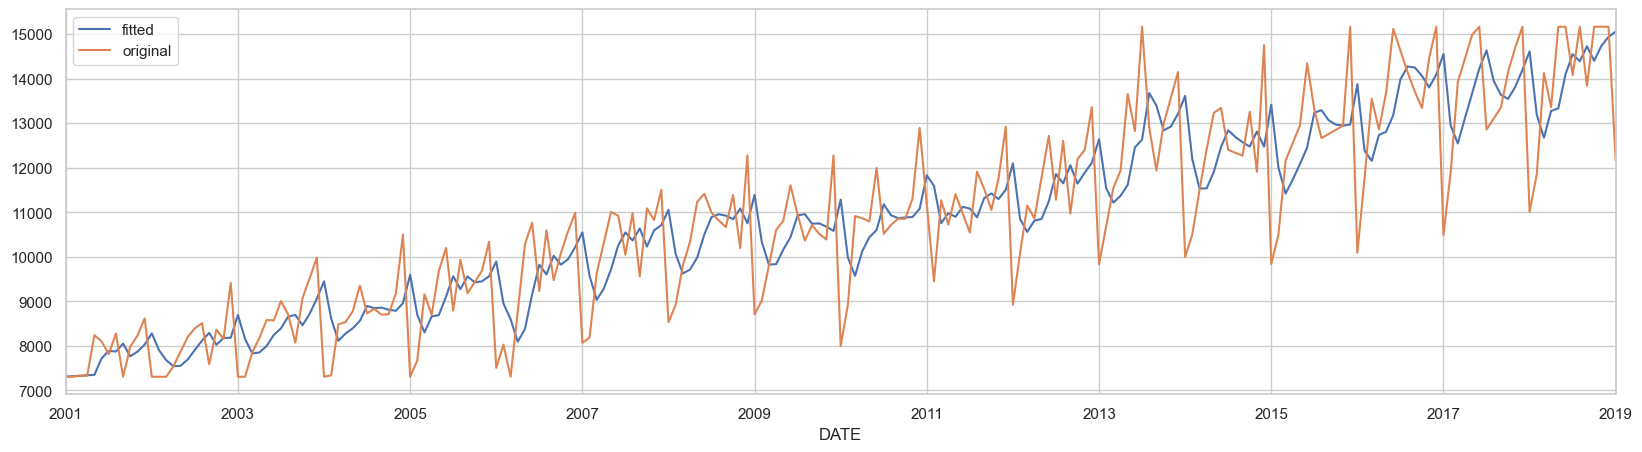

In [58]:
# fitting the model
model = sm.tsa.ExponentialSmoothing(mobile_sales["Sales"], trend = "add")
model_fit = model.fit(smoothing_level = 0.4)
# model_fit = model.fit(smoothing_level = 0.4, smoothing_trend = 0.1)
model_fit.fittedvalues.plot(label = "fitted")
mobile_sales["Sales"].plot(label = "original")
plt.legend()

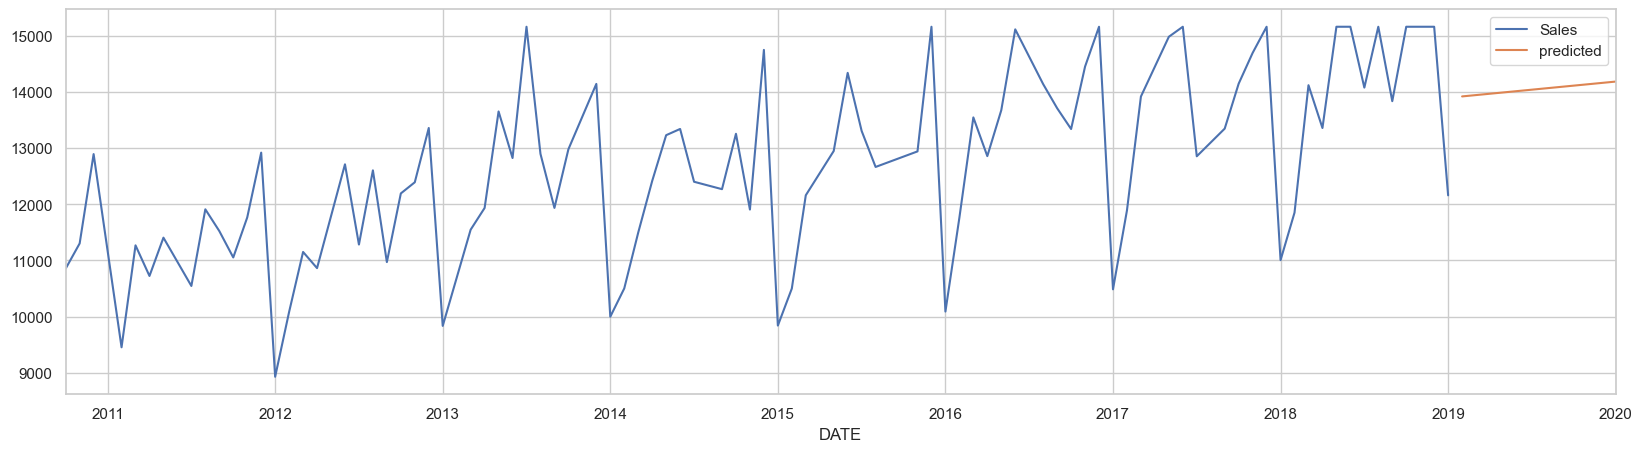

In [59]:
# predicting
pred = model_fit.forecast(steps = 12)
mobile_sales.tail(100).plot(label = "actual")
pred.plot(label = "predicted")
plt.legend()

The trend shows a slight upward inclination

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAE : 1327.243
RMSE : 1451.702
MAPE: 0.092


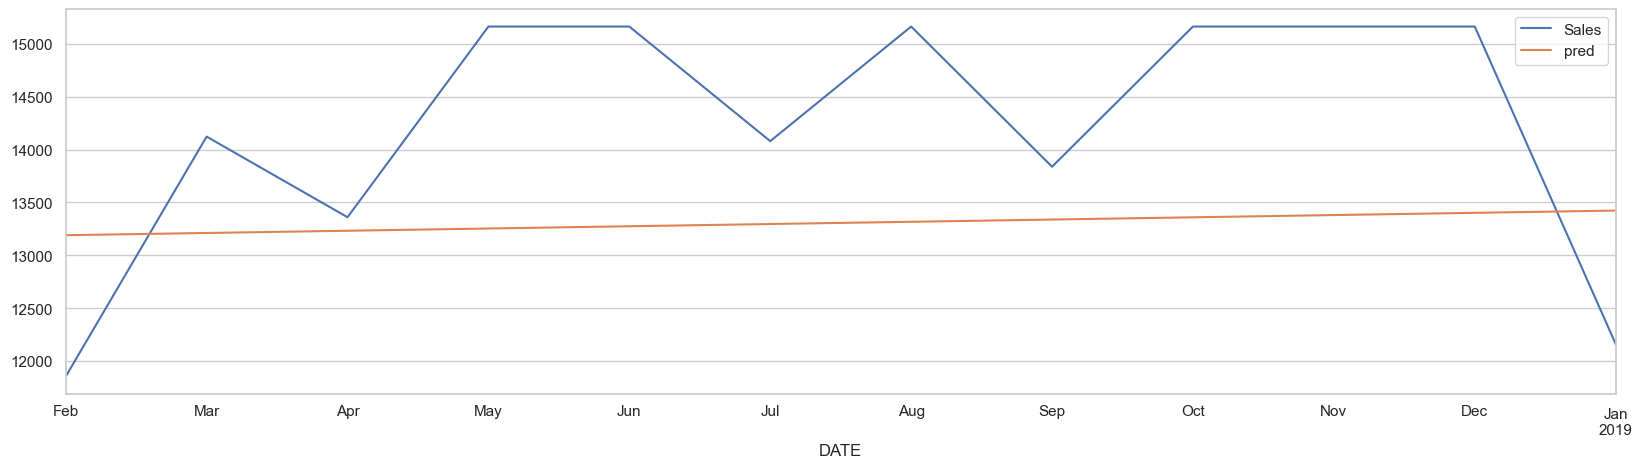

In [60]:
# evaluating the performance
model = sm.tsa.ExponentialSmoothing(train_x["Sales"], trend = "add")
model_fit = model.fit(smoothing_level = 0.4)
test_x["pred"] = model_fit.forecast(steps = 12)
test_x.plot()
performance(test_x["Sales"], test_x["pred"])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


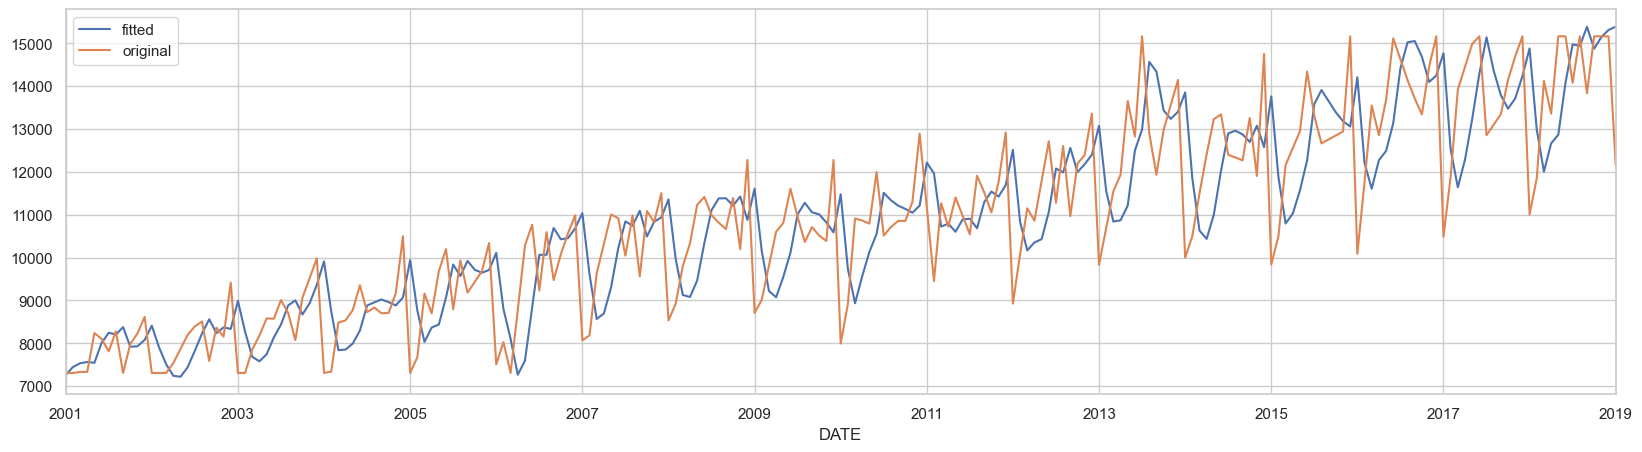

In [61]:
# fitting another model
model1 = sm.tsa.ExponentialSmoothing(mobile_sales["Sales"], trend = "add")
model1_fit = model1.fit(smoothing_level = 0.4, smoothing_trend = 0.4)
model1_fit.fittedvalues.plot(label = "fitted")
mobile_sales["Sales"].plot(label = "original")
plt.legend()

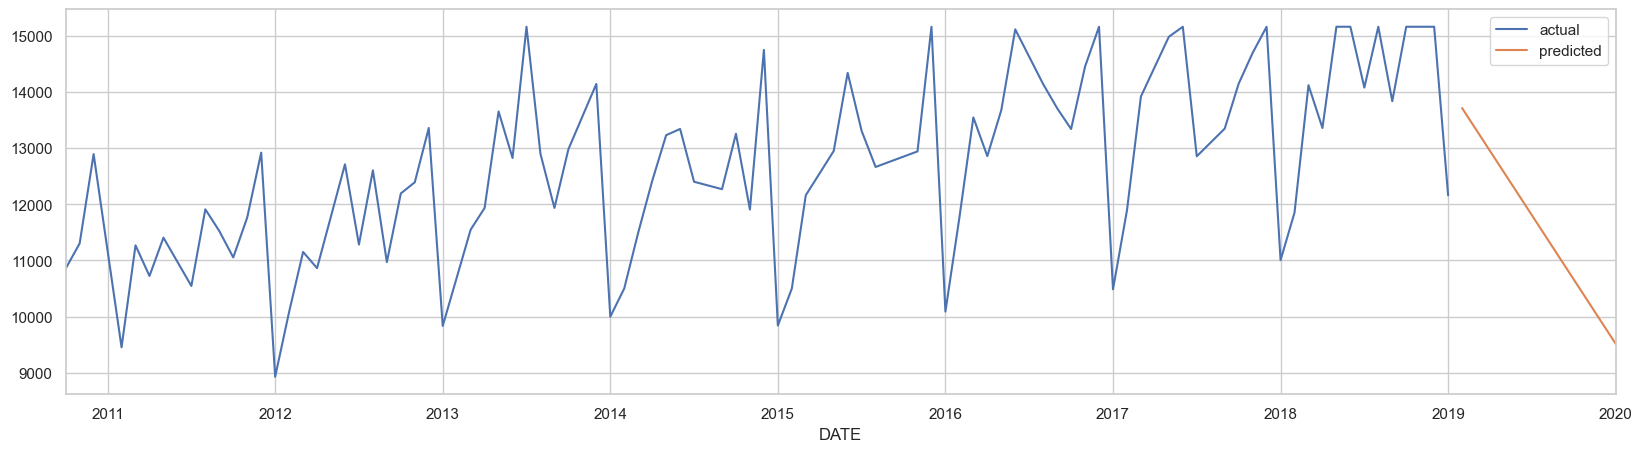

In [62]:
# predicting on the new model (model1)
pred = model1_fit.forecast(steps = 12)
mobile_sales["Sales"].tail(100).plot(label = "actual")
pred.plot(label = "predicted")
plt.legend()

MAE : 3298.297
RMSE : 3615.542
MAPE: 0.228


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


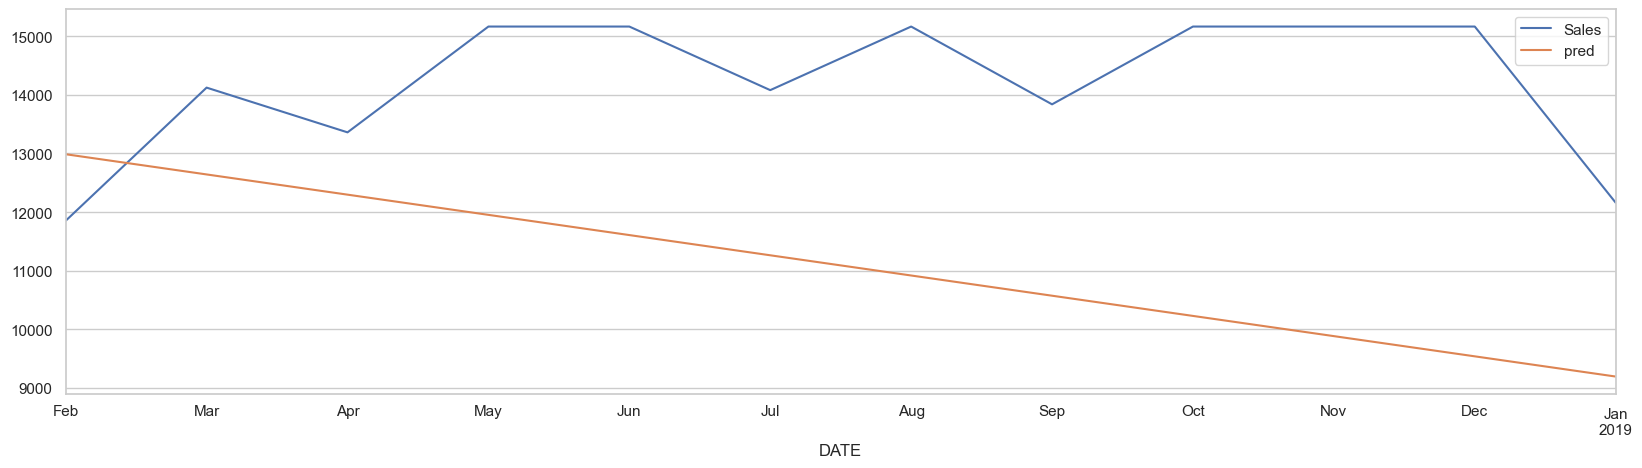

In [63]:
# evaluating the performance
model1 = sm.tsa.ExponentialSmoothing(train_x["Sales"], trend = "add")
model1_fit = model.fit(smoothing_level = 0.4, smoothing_trend = 0.4)
test_x["pred"] = model1_fit.forecast(steps = 12)
test_x.plot()
performance(test_x["Sales"], test_x["pred"])

### Triple Exponential Smoothing (Holt - Winter's Method)
Triple Exponential Smoothing is abbreviated as TES. In this technique, dataset which has time series 3 is considered. The time series is represented as,

y_t+h_cap = Level + Tren + Seasonality + Error

Say that, prediction has to be made for April 2024 (y_t+h_cap), and the data is available till Jan 2024,

y_t+h_cap = l_t + b_t * h + s_t+h-m

Where,
- b_t = slope at Jan 2024.
- m = seasonality ar Apr 2023 (frequency of seasonality, i.e., the number of seasons in a year). For example, for quarterly data m = 4, for monthly data m = 12.

Therefore for TES,

y_t+h_cap = ((α * y_t) + (α(1 - α) * y_t-1) + ... + (α(1 - α) ** n * y_t-n)) + ((β * b_t) + (β(1 - β) * b_t-1) + ... + (β(1 - β) ** n * b_t-n)) + ((γ * s_t) + (γ(1 - γ) * s_t-1) + ... + (γ(1 - γ) ** n * s_t-n))

MAE : 458.67
RMSE : 544.212
MAPE: 0.032


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


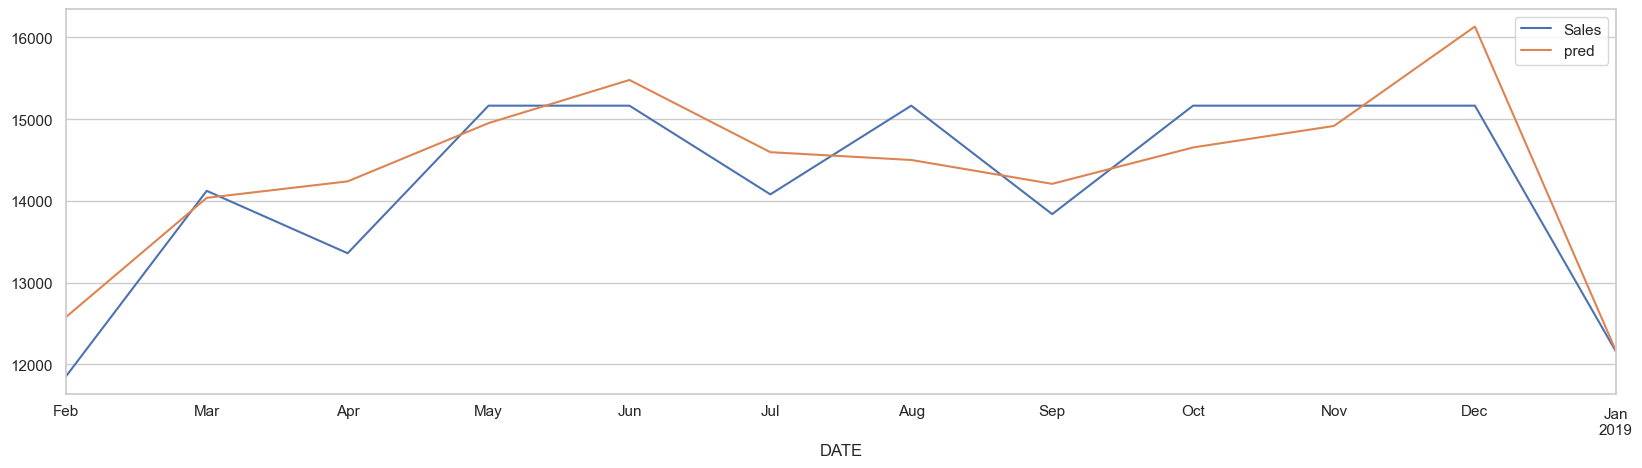

In [64]:
# fitting the model
model = sm.tsa.ExponentialSmoothing(train_x["Sales"], trend = "add", seasonal = "add")
model_fit = model.fit(smoothing_level = 1/ 24, smoothing_trend = 0.25, smoothing_seasonal = 0.2)
test_x["pred"] = model_fit.forecast(steps = 12)
test_x.plot()
performance(test_x["Sales"], test_x["pred"])

To sum up SES, DES, and TES,
- SES = Level
- DES = Level + Trend
- TES = Level + Trend + Seasonality

# Stationarity
Stationarity means, static, or constant in nature. In terms of Time Series, stationarity means the parameters like mean, variance, amplitude, frequency do not change naturally with time. Consider heart beat for example, unless a person is not sprinting, or undergoing some form of physical workout, it is pretty much normal in amplitude with a mean of 72 bpm. As opposed to a scenario where the amplitude is increasing with time. Another scenario is case 3, where the mean would be having an upward trend.

The next set of time series models work on stationary series.

A time series with an increasing wavy line with large peaks and troughs can be broken down into the following parts,
- Trend
- Seasonality
- Residuals (Errors)

The objective is to remove the trend and seasonality from the data, and keep the residuals (error).

The forecasting using ARIMA models is based on residuals. Meaning, residuals are used in order to make predictions using ARIMA models. So far, only nn-stationary time series were considered. But in order to use certain forecasting methods, stationary time series is required.

### How to confirm if a dataset is stationary? 
### How to determine stationarity?
Conducting a Dickey-Fuller test will reveal if a dataset is stationary or not. The output of the test is p-value. If p-value is greater than 0.05 then the dataset is not stationary, else if it is lesser than 0.05 then the dataset is stationary.

Therefore,
- H0 = Dataset is not stationary
- H1 = Dataset is stationary

<Axes: xlabel='DATE'>

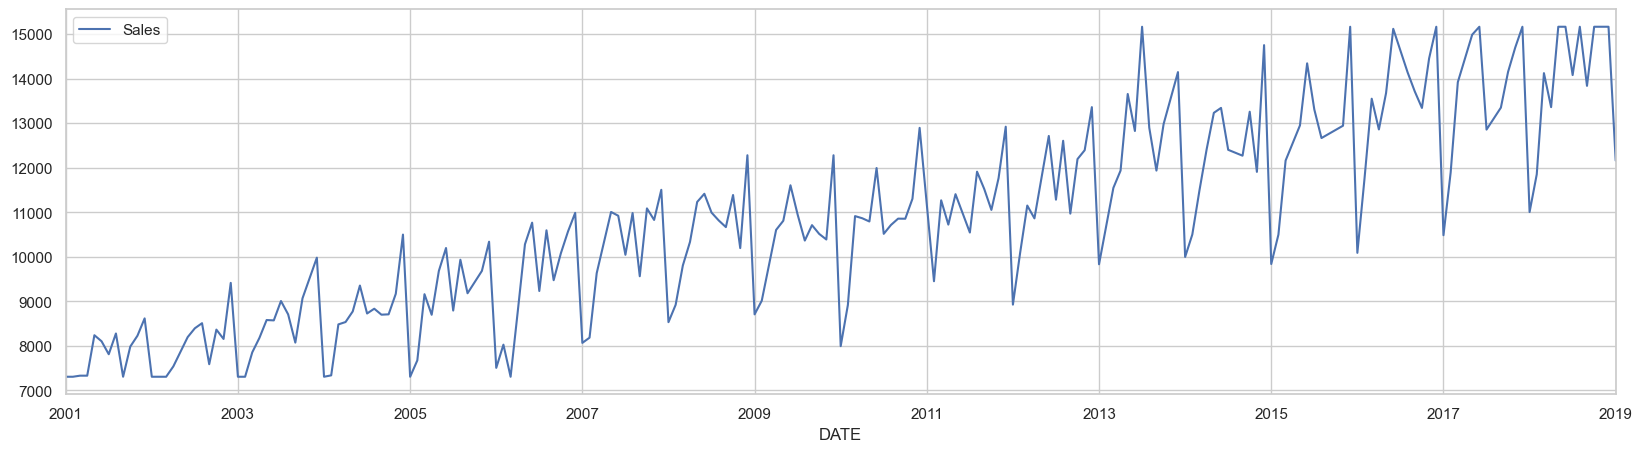

In [65]:
mobile_sales.plot()

In [66]:
sm.tsa.stattools.adfuller(mobile_sales["Sales"])

(0.19603564271715754,
 0.9720383666351424,
 12,
 204,
 {'1%': -3.462818103072159,
  '5%': -2.8758145932936805,
  '10%': -2.574378674548251},
 3222.73044282947)

In [67]:
p_value = sm.tsa.stattools.adfuller(mobile_sales["Sales"])[1]
p_value

0.9720383666351424

In [68]:
if p_value <= 0.05:
    print("H1")
else:
    print("H0")

H0


### Techniques for Converting Non-Stationary Dataset to a Stationary Datase
#### Removing Trend (Detrending)
Consider a time series with an increasing wavy line with large peaks and troughs. The trend here is something like y = mx + c.

Differentiating y = mx + c, will output m. Meaning, y' = m.

If the time series is differentiated there will not be any trend left. The equation of time series is,

y(t) = b(t) + s(t) + e(t)

y(t) = (mx_t + c) + s(t) + e(t)

If the differentiation of a trend line is taken, the trendline will become flat. The differentiating is calculated as,

lim_{Δt -> 0} ((y + Δy) - y)/ ((t + Δt) - t)

In the time series, while moving from one time element to another time element, the slope is calculated.

slope(m) = (y_t+1 - y_t)/ (t + 1 - t) = (y_t+1 - y_t)

If this principle of differentiation is leveraged on the below dataset,

dataset = {
    "month": ["Jan", "Feb", "Mar", "Apr", "May", "June"],
    "sales": [100, 150, 200, 250, 300, 350],
    "current - previous": [np.nan, 50, 50, 50, 50, 50]
}

The trend now is a flat line. This way of flattenning the time series is called detrending, more specifically it is called detrending by differencing.

Generally the differentiation is carried out until the time series becomes a flatline.

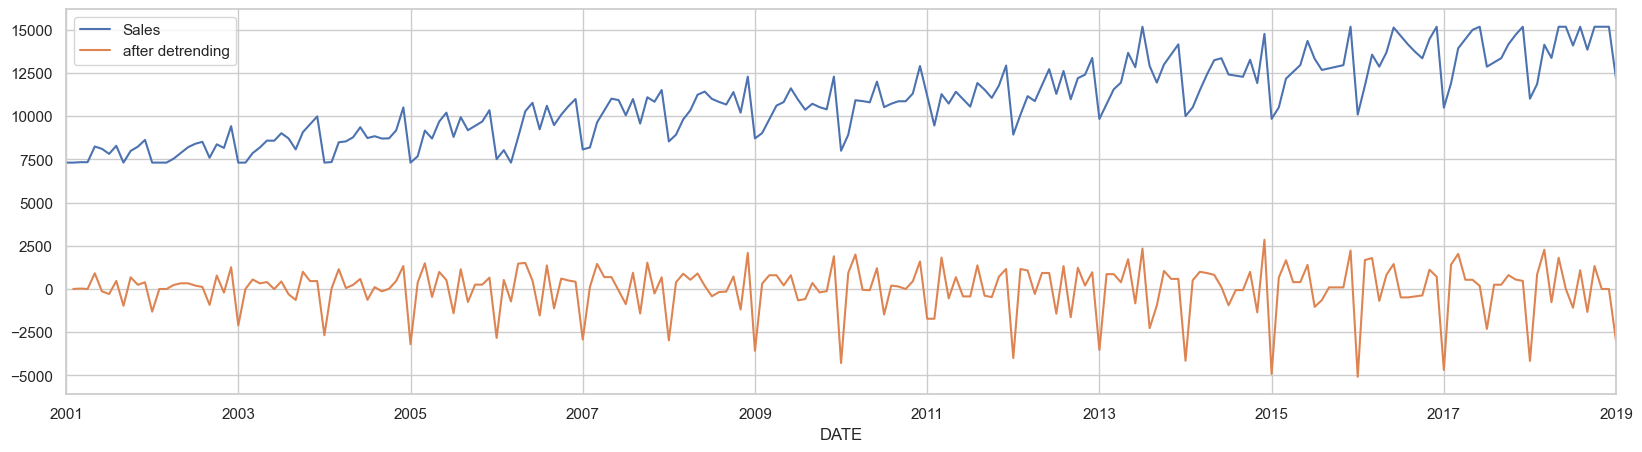

In [69]:
# detrending by differentiating
detrend = mobile_sales["Sales"].diff()
mobile_sales.plot(label = "original")
detrend.plot(label = "after detrending")
plt.legend()

In [70]:
# carrying out dickey-fuller test on the dataset after detrending
p_value = sm.tsa.stattools.adfuller(detrend.dropna())[1]

print(p_value)

if p_value <= 0.05:
    print("Stationary")
else:
    print("Not Stationary")

2.340436167699096e-16
Stationary


#### Removing Seasonality (Deseasonalizing)
Consider a time series with an increasing wavy line with large peaks and troughs. After differentiating, the trend get removed. But the time series still has a wavy line with large peaks and troughs. This cannot still be called as stationary, because there is still an element of seasonality present in it.

Differentiating by 1 causes the values to shift by 1 to the right side. As the differentiating value increases, the wave will keep shifting to the right side (phase shift). If the time series is differentiated by m (seasonality), the wave reduces in size by m. Meaning, amplitude reduces in size. The resultant will be a deseasonalized dataset.

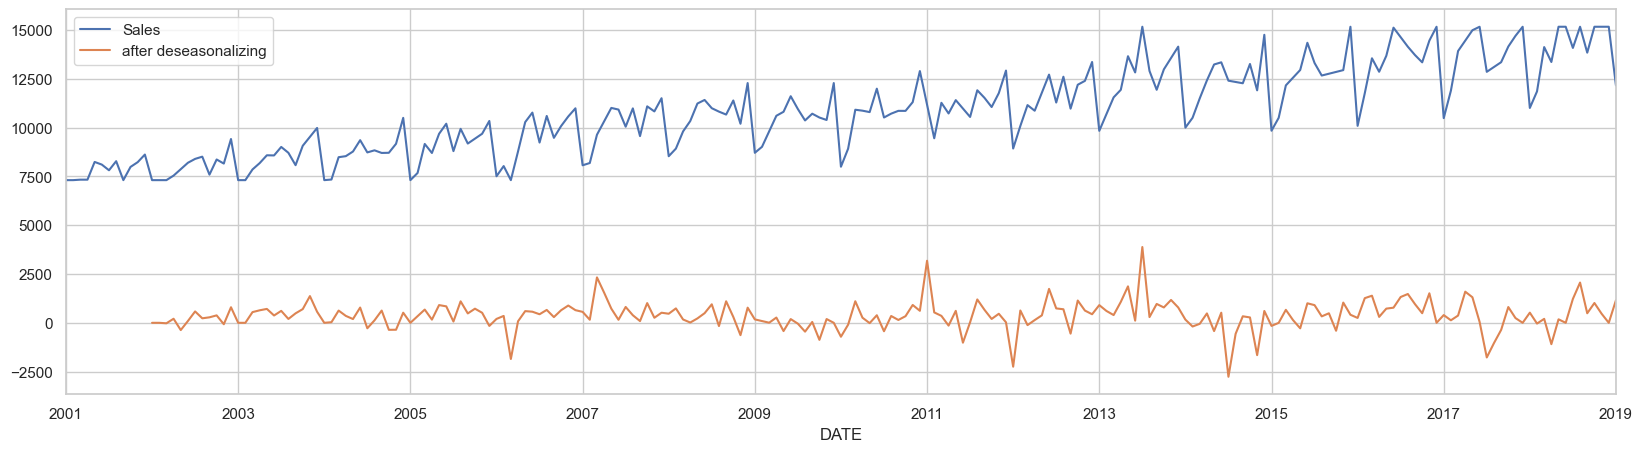

In [71]:
deseasonalized = mobile_sales["Sales"].diff(12)
mobile_sales.plot(label = "original")
deseasonalized.plot(label = "after deseasonalizing")
plt.legend()

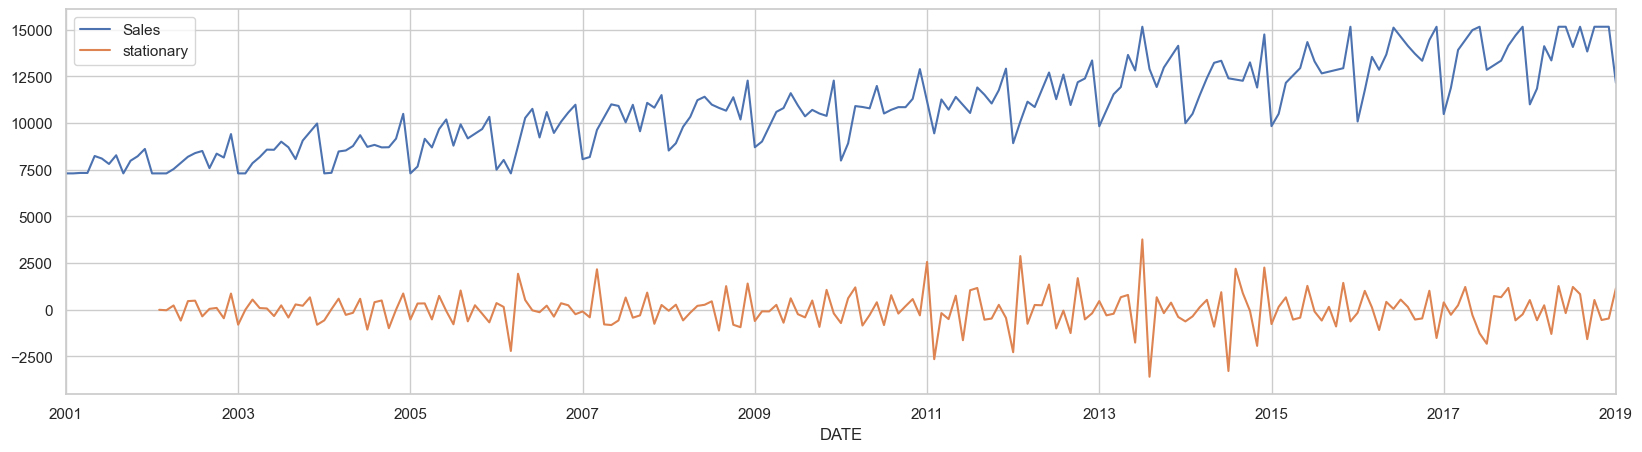

In [72]:
# differentiate by 1 to remove the trend, and differentiate by 12 to remove the seasonality
stationary = mobile_sales["Sales"].diff(1).diff(12)
mobile_sales.plot(label = "original")
stationary.plot(label = "stationary")
plt.legend()

In [73]:
# carrying out dickey-fuller test on the dataset after detrending
p_value = sm.tsa.stattools.adfuller(stationary.dropna())[1]

print(p_value)

if p_value <= 0.05:
    print("Stationary")
else:
    print("Not Stationary")

1.93266930986648e-06
Stationary


The residuals from time series decomposition can be used as well to obtain a stationary series.

NOTE: If a data cannot be converted from non-stationary to stationary, then ARIMA models are not used. Instead, Holt-Winter's method is used for forecasting.

So far, seasonality was predicted manually by looking into the time series. To address this concern, ACF and PACF is used.

# Auto Correlation Factor
Consider a simple example of Mango season in India, if the prices of the Mangoes have to be predicted for the month of April, say this is represented by s_april.

To predict s_april, past sales figures or values have to be looked into (s_march, s_feb, s_jan, ..., s_prev_april). Meaning, whatever the price will be in April, it will slightly depend on the price in March (previous values in general). If somehow a correlation between the current month and the previous month is found, there definitely will be good correlation between them. It is also possible that, the correlation may go beyond 1 or 2 or 3 or more months in the past.

ACF says that,
1. Find the correlation of the current month with the previous month.
2. Find the correlation of the current month with t-2 months (2 months in the past).
3. Also look into t-m months.

dataset = {
    "month": ["Mar", "Feb", "Jan", "Dec", "Nov"],
    "t-1": ["Feb", "Jan", "Dec", "Nov", "Oct"],
    "t-2": ["Jan", "Dec", "Nov", "Oct", "Sep"],
    .
    .
    .
    "t-m":
}

The sales in March has some relation to sales in February. Also, it has some relation with each month before March as well.

Consider the following correlations,
- Mar-Feb = 0.8
- Mar-Jan = 0.6
- Mar-Dec = 0.5
- Mar-Sep = 0.95

This value obtained for Mar-Sep, tells that these 2 numbers generally grow together, which is what correlation talks about, which is, how 2 numbers are growing together. The difference between March and September is 6 months, this 6 months of difference is called as seasonality.

All possible combinations are looked into, and the correlations are calculated.

ACF, says that, if there is a time series data like so,

dataset = {
    "time": [1, 2, 3, 4, ..., 200],
    "sales": [500, 450, 400, 350, ..., 50],
    "t-1": [450, ...],
    "t-2": [400, ...],
    "t-3": [350, ...]
}

For each entry of time, the correlation between every other time entry (older) is calculated. If this is done for all the time series, at a certain combination, there will be a correlation value which will be very high. If this value is obtained at t-n, then n will be the value for seasonality.

Basically the correlation of the above table is found. Whichever combination (backwards) shows the maximum correlation, i.e., t-n, will be the value for seasonality. The shifting, i.e., t-n, is used as a hyperparameter.

# Partial Auto Correlation Factor
Say that, Ice-cream sales are being predicted for Mar 2023. The sale in Feb 2023 has an impact on Mar 2023 sales. Similarly, Jan 2023 sales will also have some impact on Mar 2023 sales.

There are 3 kinds of correlations that exist:
1. Direct correlation between Jan 2023 and Mar 2023 - C1.
2. Correlation between Jan 2023 and Feb 2023 - C2.
3. Correlation between Feb 2023 and Mar 2023 - C3.

When the ACF is calculated between Jan 2023 and Mar 2023 (shift in 2 months t-2), there are direct (C1) and indirect (C2 and C3).

Because of this indirect correlation, there might be some noise that could seep into the picture. This noise could give an incorrect understanding of the impact of the Jan 2023 sales on Mar 2023 sales.

Partial Auto Correlation Factor removes all the indirect relations, and considers only the direct relations, which helps in obtaining a better understanding of what the seasonality is.

PACF achieves this by calculating correlation as Linear Regression.

Therefore,

correlation = αc_1 + βc_2 + γc_3 + error

In [74]:
# calculating acf anf pacf
mobile_sales["Sales"].head()

DATE
2001-01-01    7307.8
2001-02-01    7307.8
2001-03-01    7332.0
2001-04-01    7332.0
2001-05-01    8240.0
Name: Sales, dtype: float64

In [75]:
# shifting the data by 1 month
mobile_sales["Sales"].shift(1).head()

DATE
2001-01-01       NaN
2001-02-01    7307.8
2001-03-01    7307.8
2001-04-01    7332.0
2001-05-01    7332.0
Name: Sales, dtype: float64

In [76]:
# calculating the correlation
lag = 1
np.corrcoef(mobile_sales["Sales"][lag: ], mobile_sales["Sales"].shift(lag)[lag: ])[0][1]

0.8107166374274491

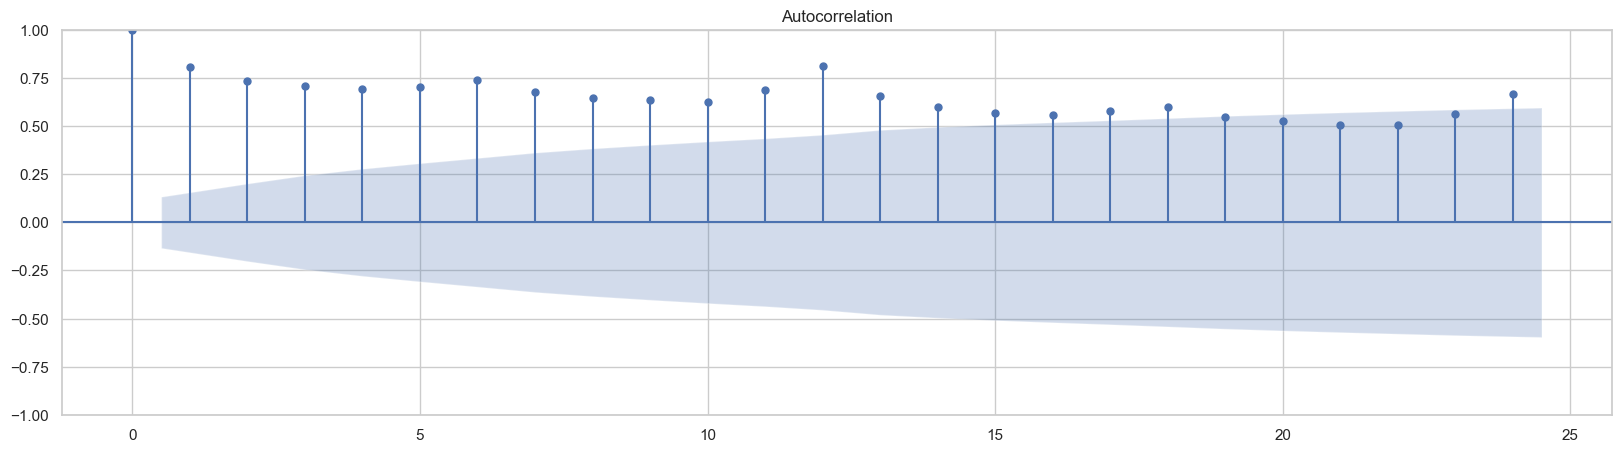

In [77]:
# using python package to find acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(mobile_sales["Sales"]); # make sure to include the semi-colon

- The lines with a dot on the top represents the correlation values. 
- The blue space in the plot represents the confidence in correlation.
- If the vertical line with the dot is extending outside the blue space, then the confidence on correlation is high.

But how to zero down on which value to consider as seasonality?
- PACF helps in answering the above question accurately

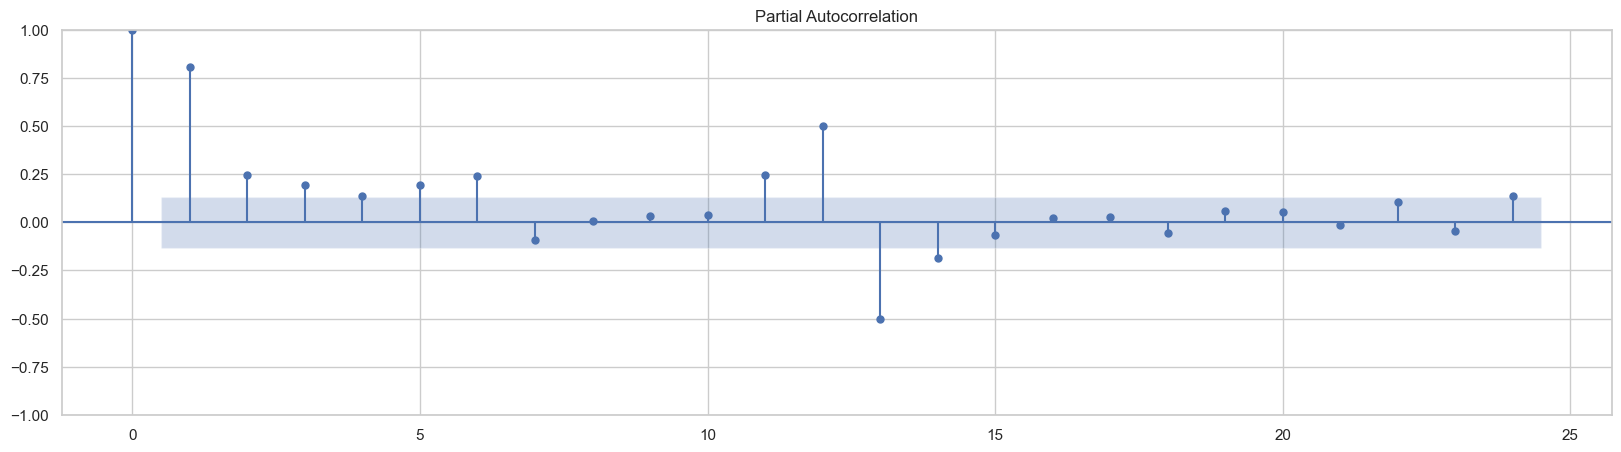

In [78]:
plot_pacf(mobile_sales["Sales"]);

Looking at the plot, seasonality = 1 or 12 is the best value to consider for seasonality.

ACF and PACF are used to decide what seasonality value to consider. Meaning, seasonality hyperparameter can be tuned using them.

NOTE:
- McDonald's stores lead to less wars.
- Ice-cream sales are directly related to increase in drowning.

# Correlation vs Causation

### If a variable x is correlated with another variable y, does that mean x causes y?

A variable x may be useful for forecasting a variable, but that does not mean x is causing y. For example,
- It is possible to model the number of drownings at the beach resort each month with the number of ice-creams sold in the same period.
- The model can give reasonable forecasts, not because ice-creams cause drownings, but because people eat more ice cream on hot days when they are also more likely to go swimming.

So the 2 variables, ice-cream and drowning are correlated, but one is not causing the other.

They are both caused by a 3rd variable, i.e., temperature.

This is an example of confounding.

### What is the relevance of correlation and/ or causality with forecasting models?

Correlations are useful for forecasting, even when there is no causal relationship between the two variables. For example,
- It is possible to forecast if it will rain in the afternoon by observing the number of cyclists on the road in the morning.
- When there are fewer cyclists than usual, it is more likely to rain later in the day.

This model can give reasonable forecasts, not because cyclists prevent rain, but becaue people are more likely to cycle when there is less or no chance of rain.

In this case, there is a causal relationship, but in the opposite direction to the forecasting model.

### If good forecasts can be based on correlated variables, why bother trying to understand the causality behind them?

Though a good forecast can be obtained based on correlated variables, if the causality behind those variables is understood, better features can be identified, thereby creating a better model.
- A better model for drownings example will probably include temperature and visitor numbers and exclude ice-cream sales.
- A good forecasting model for rainfall will not include cyclists, but it will include atmospheric observations from the previous few days.

# ARIMA Family of Forecasting Techniques

A time series has 4 components: Level + Trend + Seasonality + Error.

In ARIMA techniques, the objective is to perform forecasting on stationary series, or a time series with trend and seasonality is converted to a stationary series upon which the forecasting is performed, there after both trend and seasonality are introduced back into the series.

The python package called SARIMAX, which has multiple hyperparameters is used to build all the different models under the ARIMA family of models.

# AR Model

AR stands for Auto Regression. Once the trend and seasonality is removed out of the time series, only the residuals are left, with no clear trend observed. If the dataset is just residuals, then the current value could be predicted using past values. For example, if there is a time stamp y_t then,

y_t = (α * y_t-1) + (β * y_t-2)

This is the same as the observation made in the previous techniques as well, which is, the past values play an important role while predicting the future values.

Auto Regression states that forecast will be treated as a regression problem, and the past values would be used as independent variables. Similar to linear regression, 

y = w1x1 + w2x2 + ... + wnxn + w0

Where,
- y = y_t_cap = value that has to be predicted
- x1 = y_t-1
- x2 = y_t-2, and so on
- xn = y_t-n

The equation looks like,

y_t_cap = a0 + a1y_t-1 + a2y_t-2 + ... + any_t-n

This is very close to exponential smoothing. Where,

y_t_cap = αl_t + α(1 - α)l_t + ...

Where past values are considered with some weightage attached to them.

But there are 2 fundamental differences here,

The weightage in exponential smoothing attached to the past values was decaying. Meaning, the weight value was declining exponentially. But in AR model's equation, a1, a2, a3, ... these are coefficients of linear regression (the coefficients are determined by gradient descent).

The equation for AR model of order P, i.e., AR(P) is,

y_t_cap = α + α1y_t-1 + α2y_t-2 + ... + αpy_t-p

Where, p order means the number of past values to consider. This is a hyperparameter, ACF and PACF and some random values are considered to zero down on the p value. Generally, one complete season is looked into. Meaning, if the seasonality is 12, then p = 12.

In [79]:
# before applying the AR model, check the nature of the time series model currently (stationary/ non-stationary) using dickey-fuller test
train_x.head()

Sales
DATE              
2001-01-01  7307.8
2001-02-01  7307.8
2001-03-01  7332.0
2001-04-01  7332.0
2001-05-01  8240.0

In [80]:
p_value = sm.tsa.stattools.adfuller(train_x["Sales"])[1]

if p_value <= 0.05:
    print("Stationary")
else:
    print("Not stationary")

Not stationary


In [81]:
# since the time series has to be stationary in order to use AR model, detrending by differentiating by 1
train_x_stationary = train_x.copy()
train_x_stationary["Sales"] = train_x_stationary["Sales"].diff(1)
train_x_stationary.dropna(inplace = True)

# conducting the dickey-fuller test again
p_value = sm.tsa.stattools.adfuller(train_x_stationary["Sales"])[1]

if p_value <= 0.05:
    print("Stationary")
else:
    print("Not stationary")

Stationary


In [82]:
# implementing the SARIMAX model by setting the order parameter to, order = (1, 0, 0)
# order = (p, d, q)
import statsmodels as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_x_stationary["Sales"], order = (1, 0, 0))
model_fit = model.fit(disp = False) 
# this is an optional argument that controls output during the fitting process
# setting it to False suppresses any informational messages printed to the console while fitting the model
test_x["pred"] = model_fit.forecast(steps = 12)
test_x["pred"]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


DATE
2018-02-01    1462.909654
2018-03-01    -514.497705
2018-04-01     180.946163
2018-05-01     -63.637823
2018-06-01      22.381091
2018-07-01      -7.871313
2018-08-01       2.768300
2018-09-01      -0.973597
2018-10-01       0.342409
2018-11-01      -0.120423
2018-12-01       0.042352
2019-01-01      -0.014895
Name: pred, dtype: float64

Since the forecast was made on the detrended series, the trend has to be integrated back in order to obtain the true value of the forecasts.

In [83]:
# integrating the trend back
test_x["pred"] = test_x["pred"].cumsum() + train_x["Sales"][-1]

MAE : 2191.957
RMSE : 2424.183
MAPE: 0.149


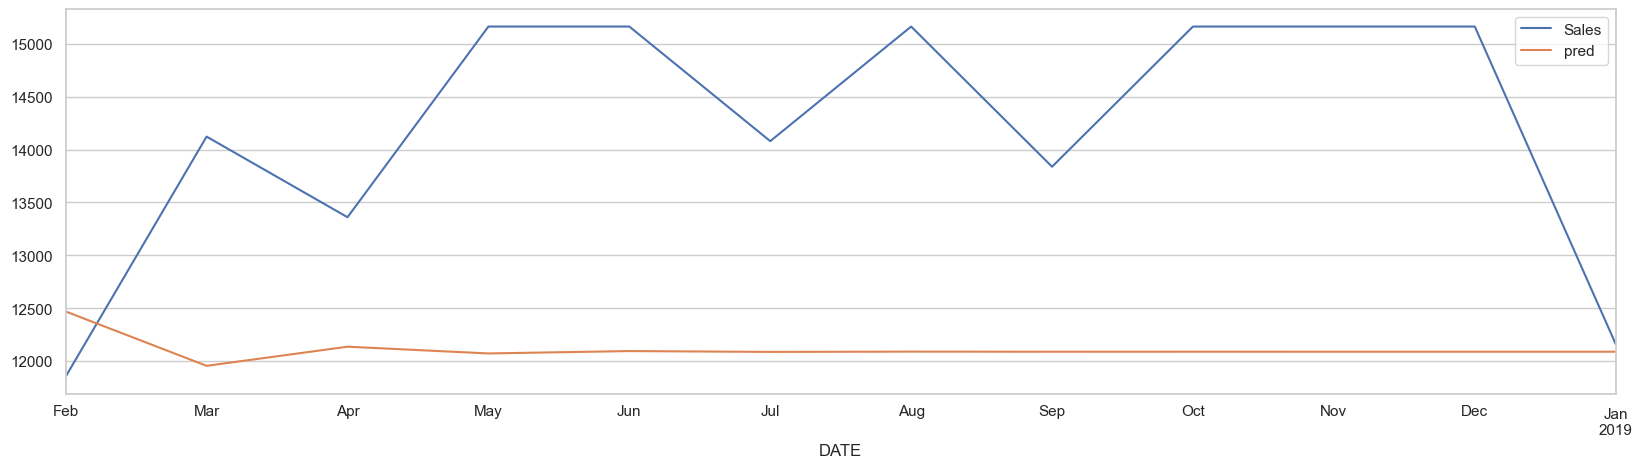

In [84]:
# plotting and computing the performance
test_x.plot()
performance(test_x["Sales"], test_x["pred"])

This is obviously not performing well. Checking the ACF and PACF to see what the optimal value for the order should be.

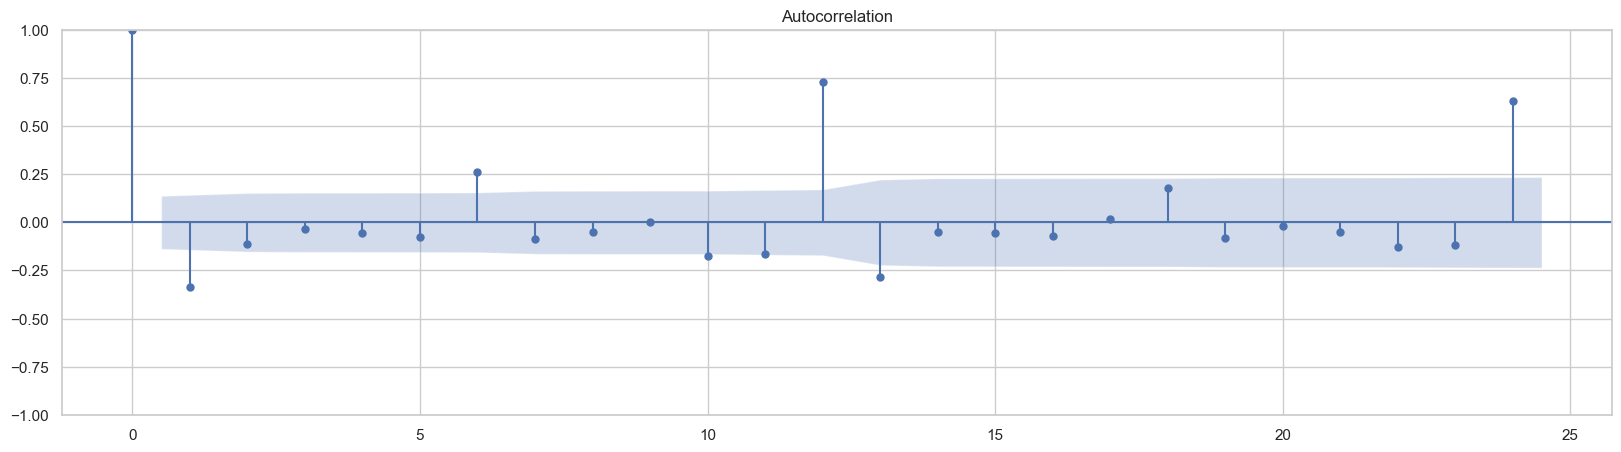

In [85]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train_x_stationary["Sales"]);

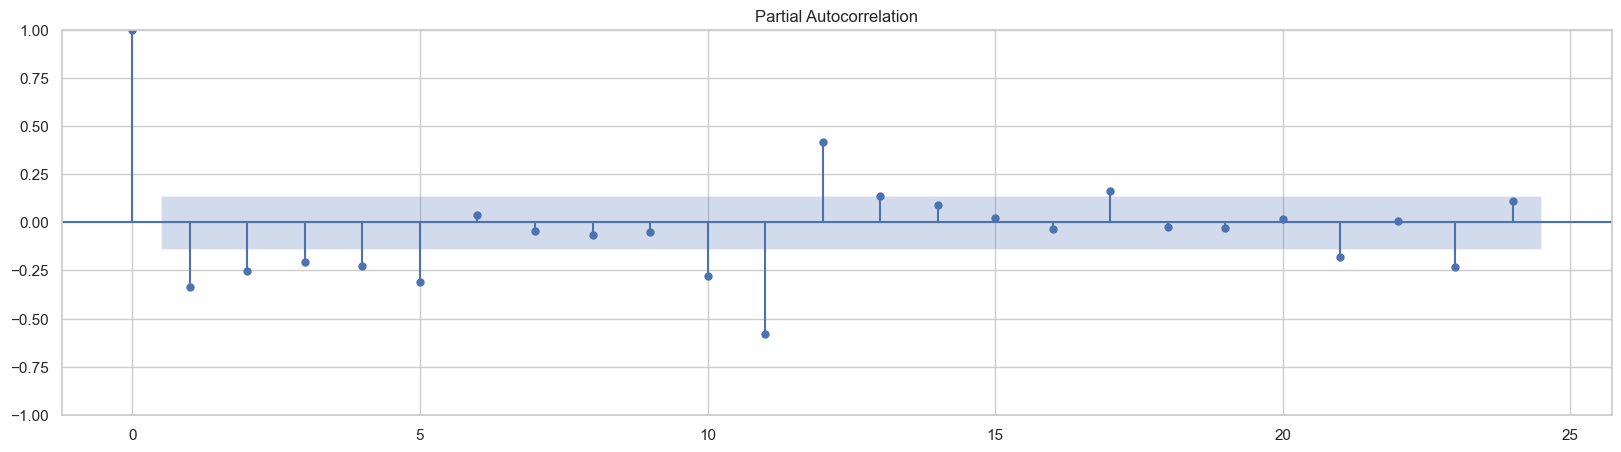

In [86]:
plot_pacf(train_x_stationary["Sales"]);

From the above plots, 3 can be considered as the best value. Note that negative is also significant. (From the above plot 4 or 5 can also be considered).

Additional notes:
- If the ACF plot gradually decreases, and PACF plot suddenly cuts off after lag = k, then AR model with order p = k can be considered.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE : 1489.515
RMSE : 1677.498
MAPE: 0.102


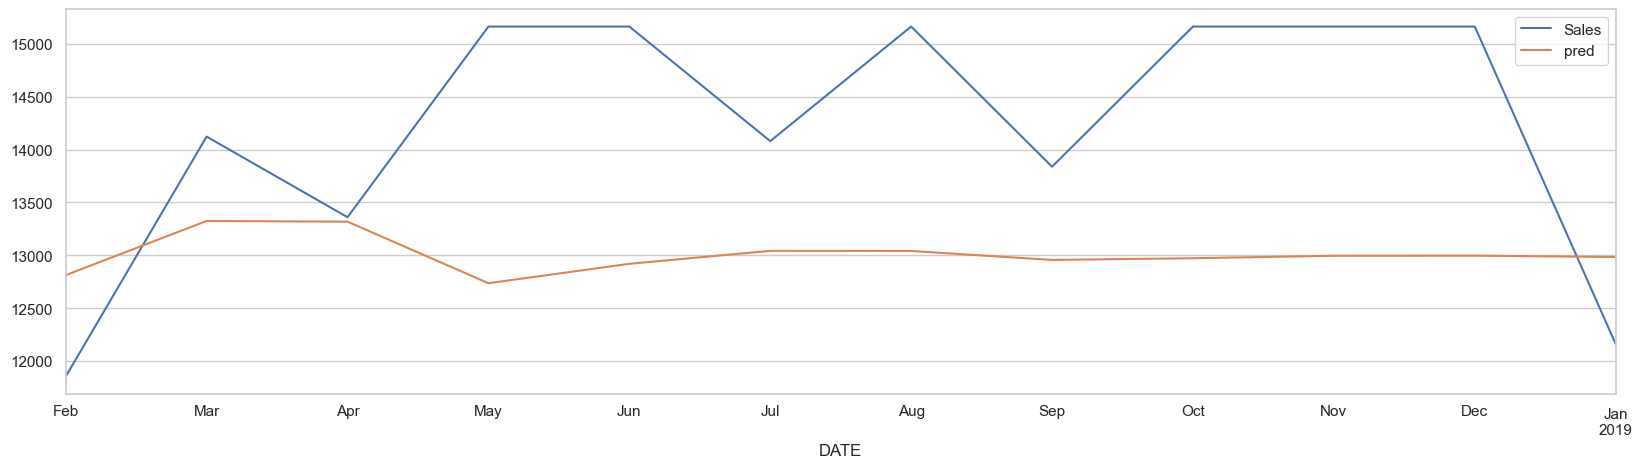

In [87]:
model = SARIMAX(train_x_stationary["Sales"], order = (3, 0, 0))
model_fit = model.fit(disp = False)
test_x["pred"] = model_fit.forecast(steps = 12)

# integrating the trend back
test_x["pred"] = test_x["pred"].cumsum() + train_x["Sales"][-1]

# plotting and computing the performance
test_x.plot()
performance(test_x["Sales"], test_x["pred"])

# MA Model
MA stands for Moving Average. This is slightly different from the MA models seen earlier. The earlier MA model considered weighted average of the last n values in order to make a prediction for a future date.

This MA model leverages the error. Error is defined as,

Error = Actual - Forecast

This model looks in the error to predict what the future value is going to be.

Consider a time series data with a wavy pattern with peaks and troughs, and μ is the average of the entire data.

### If the model has to make the first prediction, how would the model work?
Say that the naive model is used, it would predict the mean or the recent value. This predicted value, say it lies above the actual value in the plot. Say this value is e1. e1 is calculated as,

e1 = Actual - Predicted.

This e1 will be negative, since the predicted value is higher and the actual value is lower.

Since the predicted value is higher, the model learns from this and predicts the very next value lower than the earlier predicted value. Now say that this value is lower than the actual. Therefore e2 is positive. This learning continues and the next value predicted is slightly higher than the previouslu predicted value. This learning and prediction pattern con tinues, and the model learns to fine tune. The error pattern is looked into and the next value is predicted according to the previous error. This is the fundamental principle of moving average (MA) models.

Moving average model say that, if a new value y_t+1_cap has to be predicted,

y_t+1_cap = μ + (some weight to the previous error).

### How many previous error to consider?
This is a hyperparameter. Meaning, if there is a dataset, where a value y_t_cap has to be predicted,

y_t_cap = μ + (m1 * e_t-1) + (m2 * e_t-2) + ... + (mn * e_t-n) + ε*τ

Where,
- µ = mean of the entire dataset
- e_i = error = actual - predicted
- m = constants (weights)
- ε = error (random error the model is unable to explain)

This above is the equation for MA model MA(q).

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE : 1178.722
RMSE : 1311.776
MAPE: 0.083


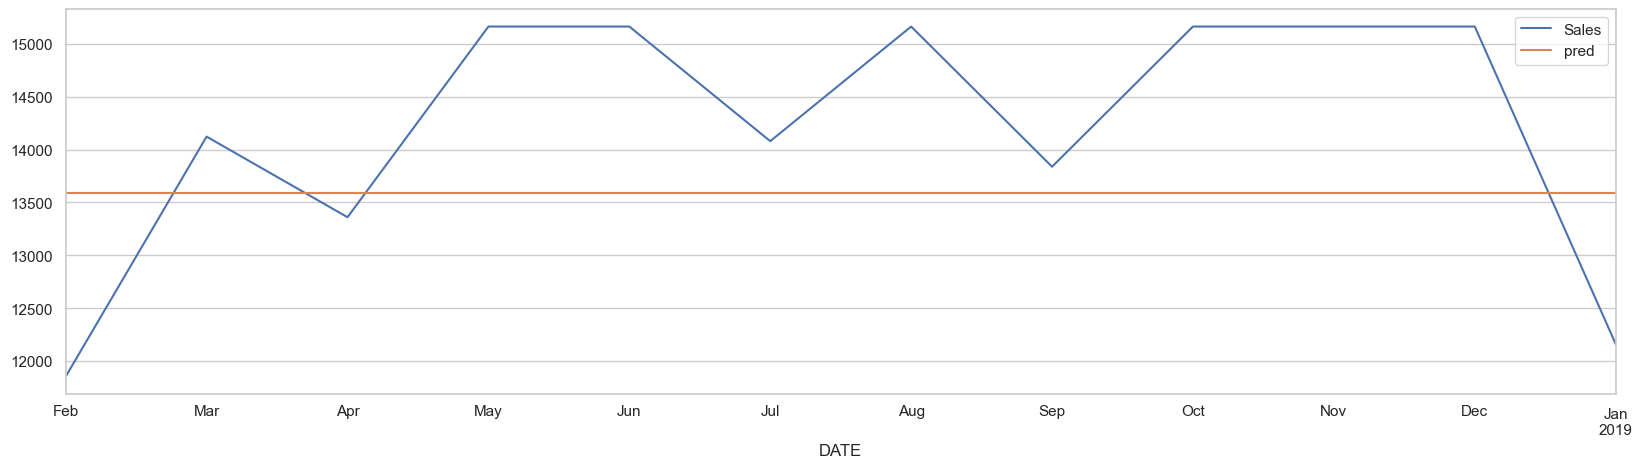

In [88]:
# trying q = 1
model = SARIMAX(train_x_stationary["Sales"], order = (0, 0, 1))
model_fit = model.fit(disp = False)
test_x["pred"] = model_fit.forecast(steps = 12)

# integrating the trend back
test_x["pred"] = test_x["pred"].cumsum() + train_x["Sales"][-1]

# plotting and computing the performance
test_x.plot()
performance(test_x["Sales"], test_x["pred"])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE : 1171.637
RMSE : 1302.051
MAPE: 0.082


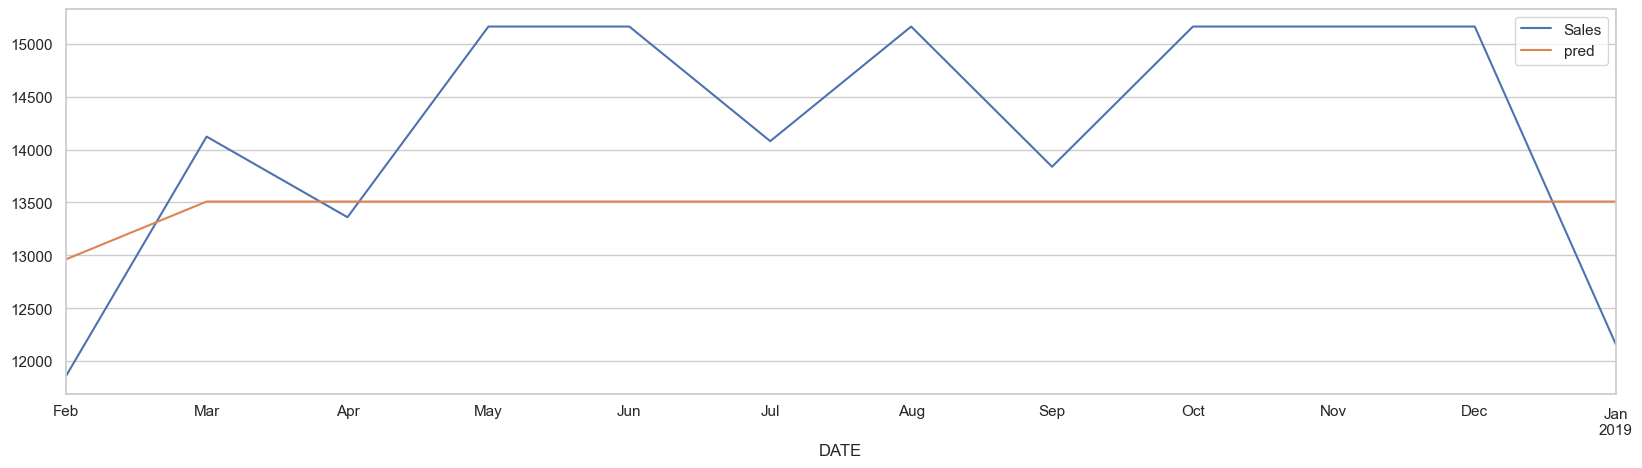

In [89]:
# trying q = 2
model = SARIMAX(train_x_stationary["Sales"], order = (0, 0, 2))
model_fit = model.fit(disp = False)
test_x["pred"] = model_fit.forecast(steps = 12)

# integrating the trend back
test_x["pred"] = test_x["pred"].cumsum() + train_x["Sales"][-1]

# plotting and computing the performance
test_x.plot()
performance(test_x["Sales"], test_x["pred"])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE : 1153.09
RMSE : 1288.016
MAPE: 0.08


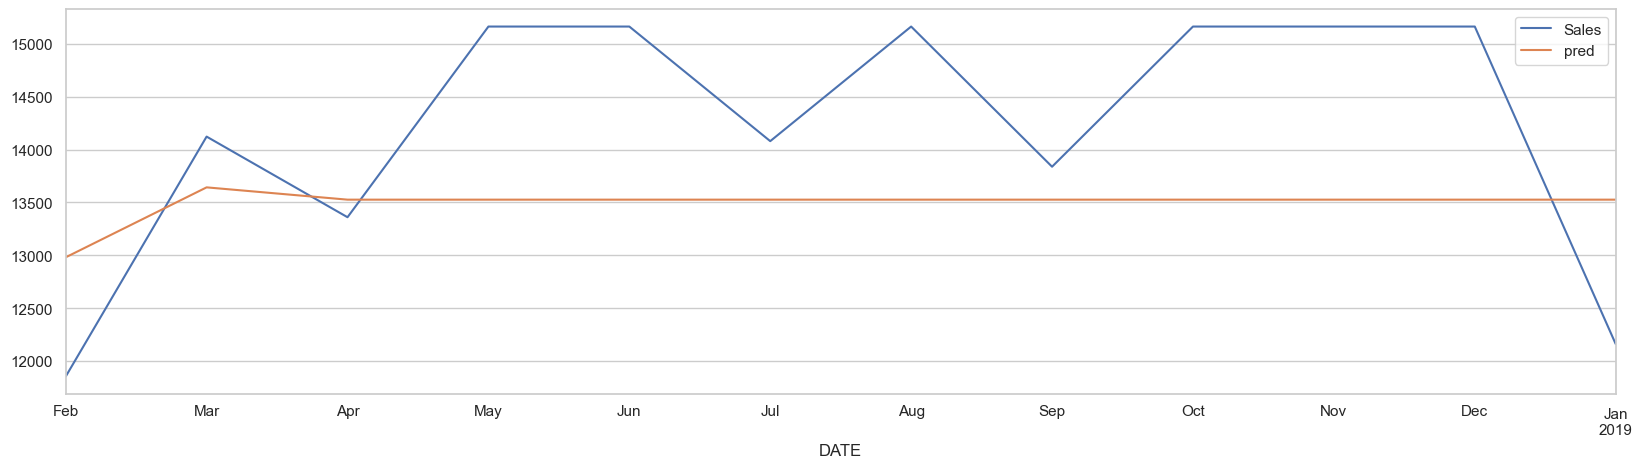

In [90]:
# trying q = 3
model = SARIMAX(train_x_stationary["Sales"], order = (0, 0, 3))
model_fit = model.fit(disp = False)
test_x["pred"] = model_fit.forecast(steps = 12)

# integrating the trend back
test_x["pred"] = test_x["pred"].cumsum() + train_x["Sales"][-1]

# plotting and computing the performance
test_x.plot()
performance(test_x["Sales"], test_x["pred"])

# ARMA Model
ARMA stands for Auto Regression Moving Average. This model combines AR and MA model. Meaning, if there is a dataset where a value y_t_cap has to be predicted,

ARMA = AR + MA

y_t_cap = (α + α1y_t-1 + α2y_t-2 + ... + αpy_t-p) + (μ + (m1 * e_t-1) + (m2 * e_t-2) + ... + (mn * e_t-n) + ε*τ)

Let, α + μ + ε = C

Therefore, ARMA(p, q) = C + (α + α1y_t-1 + α2y_t-2 + ... + αpy_t-p) + (μ + (m1 * e_t-1) + (m2 * e_t-2) + ... + (mn * e_t-n) + ε*τ)

There are 2 hyperparameters in this case p and q, where,
- p = order of regression
- q = order of moving average

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 1148.95
RMSE : 1293.445
MAPE: 0.08


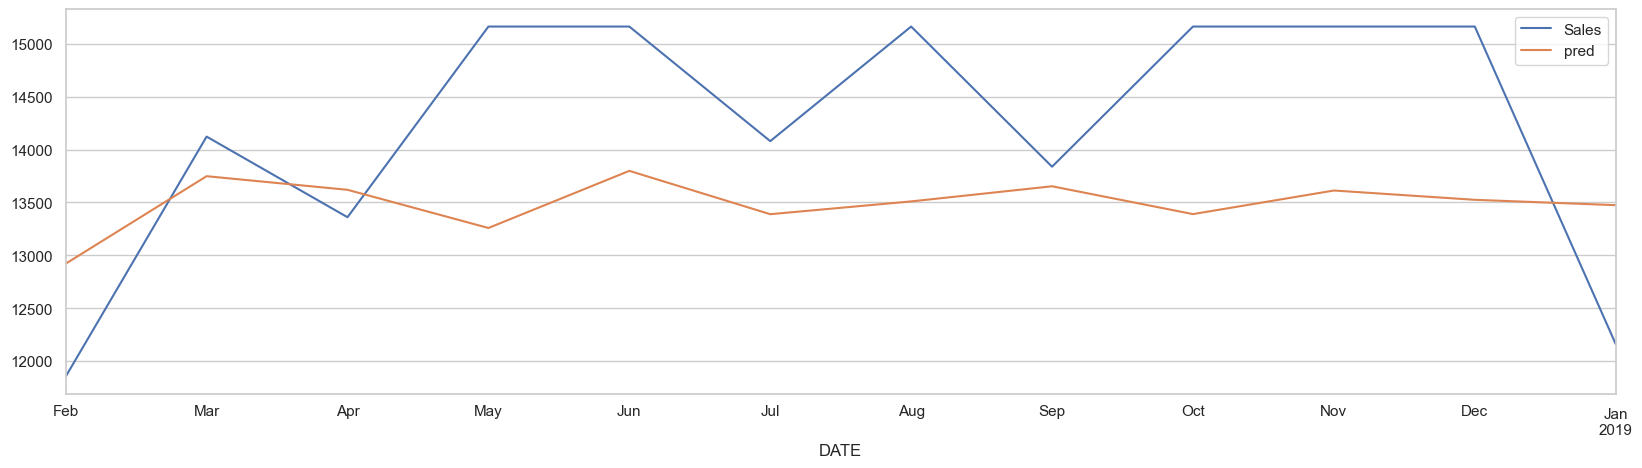

In [91]:
# trying with p = 3 and q = 3
model = SARIMAX(train_x_stationary["Sales"], order = (3, 0, 3))
model_fit = model.fit(disp = False)
test_x["pred"] = model_fit.forecast(steps = 12)

# integrating the trend back
test_x["pred"] = test_x["pred"].cumsum() + train_x["Sales"][-1]

# plotting and computing the performance
test_x.plot()
performance(test_x["Sales"], test_x["pred"])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 1134.446
RMSE : 1245.28
MAPE: 0.079


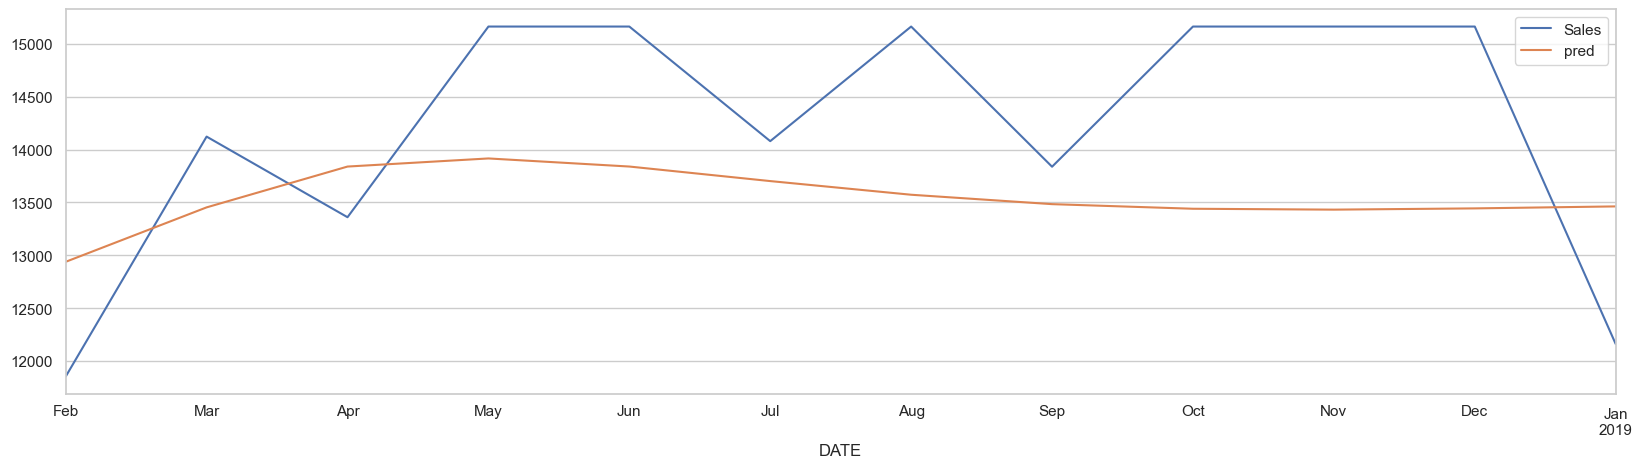

In [92]:
# trying with p = 3 and q = 2
model = SARIMAX(train_x_stationary["Sales"], order = (3, 0, 2))
model_fit = model.fit(disp = False)
test_x["pred"] = model_fit.forecast(steps = 12)

# integrating the trend back
test_x["pred"] = test_x["pred"].cumsum() + train_x["Sales"][-1]

# plotting and computing the performance
test_x.plot()
performance(test_x["Sales"], test_x["pred"])

NOTE:
The AR, MA and ARMA models have a constant, which is that, they only work for stationary series.

# ARIMA Model
ARIMA stands for Auto Regression Integrated Moving Average. ARIMA model is applied to time series which has trend.

When detrending is performed on time series, the result will be a stationary time series. Post which ARMA model can be applied, the trend can be reintroduced after the model is applied. On the contrary, ARIMA model detrends and retrends by itself. There is no manual effort invloved.

Therefore,

ARIMA = ARMA + Detrend

Where,
- p = order of regression
- q = order of moving average
- d = order of differencing 
- d = 1 for linear trends, d = 2 for quadratic trends, d = 3 or more for polynomial trends

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 1138.26
RMSE : 1289.23
MAPE: 0.079


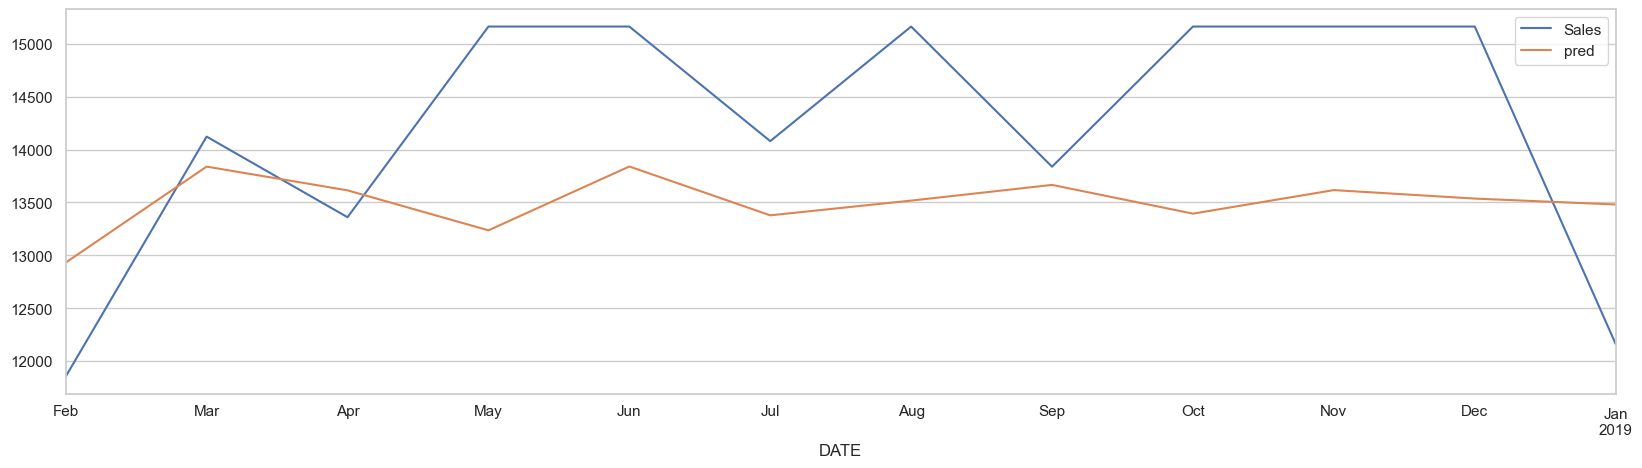

In [93]:
# importing SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

# trying with p = 3, d = 1 (linear trend), and q = 3
# model is trained on raw dataset, i.e., on train_x and NOT on train_x_stationary
model = SARIMAX(train_x["Sales"], order = (3, 1, 3))
model_fit = model.fit(disp = False)
test_x["pred"] = model_fit.forecast(steps = 12)

# plotting and computing the performance
test_x.plot()
performance(test_x["Sales"], test_x["pred"])

# SARIMA Model
SARIMA stands for Seasonality Auto Regression Integrated Moving Average. After detrending, the time series would still have seasonality in it. To address this kind of data which has seasonality, SARIMA models are used. SARIMA deals with time series with trend and seasonality.

SARIMA models have the following paramters,
- p = order of AR
- d = order of trend
- q = order of MA
- s = order of seasonality
- P = seasonal AR
- D = seasonal detrend
- Q = seasonal MA

If the sales for Dec 2024 were to be predicted, the sales in Dec 2023 have to be considered, also the sales in Dec 2022, Dec 2021, and so on also have to be considered.

Dec 2024 = (a1 * Dec 2023) + (a2 * Dec 2022) + (a3 * Dec 2021) + ...

AR Model = y_t_cap = a0 + (a1 * y_t-1) + (a2 * y_t-2) + ... + (ap * y_t-p)

Seasonal AR Model = y_t_cap = a0 + (a1 * y_t-S) + (a2 * y_t-2S) + ... + (aP * y_t-PS)

Seasonal MA Model = y_t_cap = μ + (m1 * e_t-S) + (m2 * e_t-2S) + ... + (mQ * e_t-QS)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 432.183
RMSE : 530.553
MAPE: 0.03


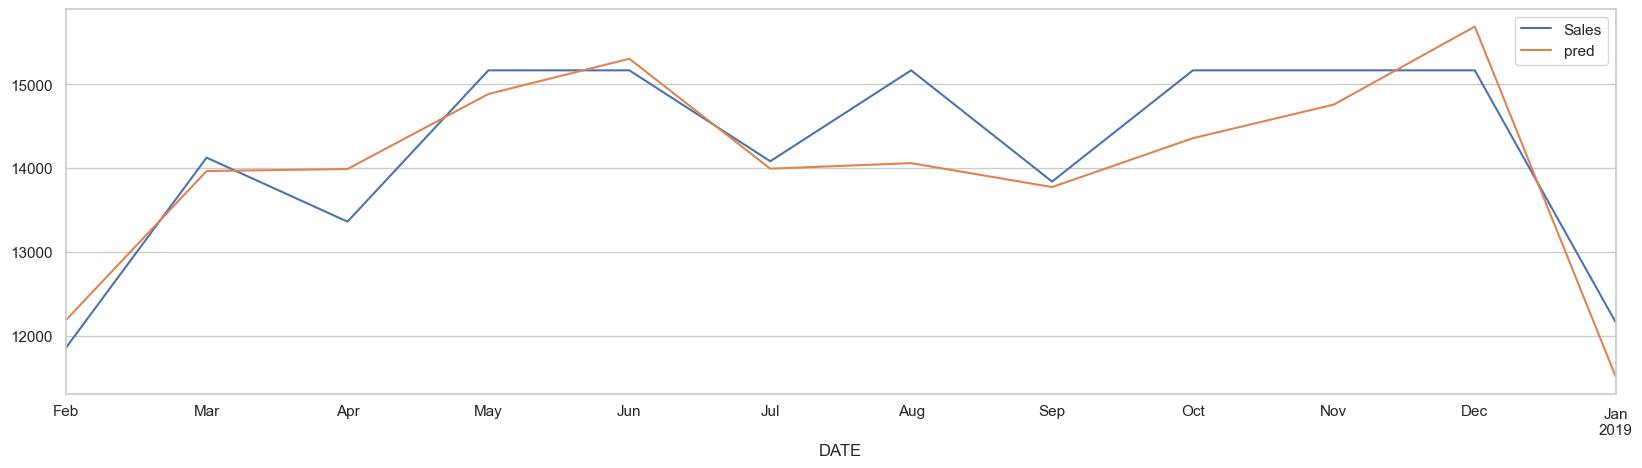

In [94]:
# training a model with order = (3, 1, 3) and seasonal_order = (1, 1, 1, 12)
model = SARIMAX(train_x["Sales"], order = (3, 1, 3), seasonal_order = (1, 1, 1, 12))
model_fit = model.fit(disp = False)
test_x["pred"] = model_fit.forecast(steps = 12)

# plotting and computing the performance
test_x.plot()
performance(test_x["Sales"], test_x["pred"])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 415.231
RMSE : 529.126
MAPE: 0.029


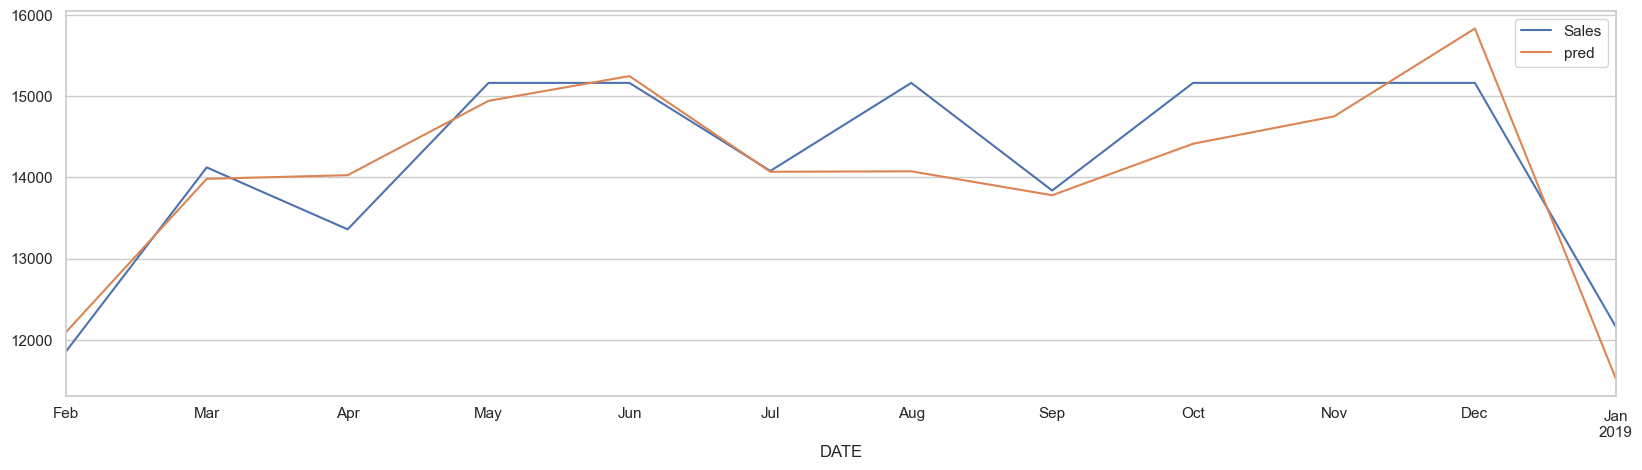

In [95]:
# training a model with order = (3, 1, 3) and seasonal_order = (3, 1, 3, 12)
model = SARIMAX(train_x["Sales"], order = (3, 1, 3), seasonal_order = (3, 1, 3, 12))
model_fit = model.fit(disp = False)
test_x["pred"] = model_fit.forecast(steps = 12)

# plotting and computing the performance
test_x.plot()
performance(test_x["Sales"], test_x["pred"])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 432.432
RMSE : 534.66
MAPE: 0.03


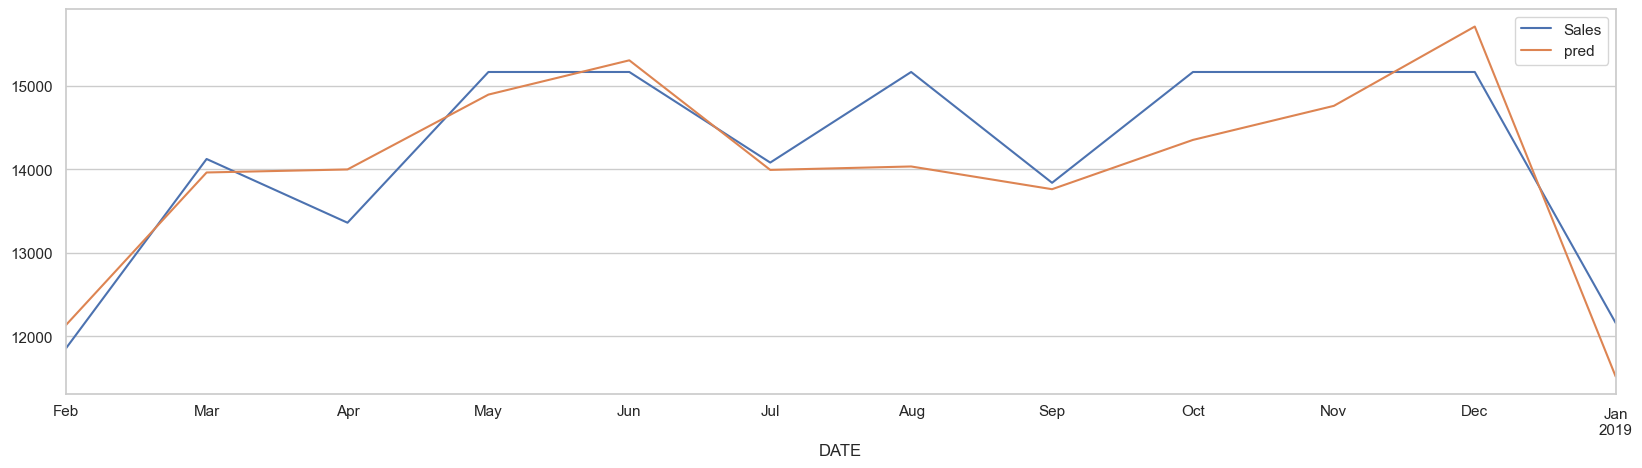

In [96]:
# training a model with order = (3, 1, 3) and seasonal_order = (2, 1, 2, 12)
model = SARIMAX(train_x["Sales"], order = (3, 1, 3), seasonal_order = (2, 1, 2, 12))
model_fit = model.fit(disp = False)
test_x["pred"] = model_fit.forecast(steps = 12)

# plotting and computing the performance
test_x.plot()
performance(test_x["Sales"], test_x["pred"])

# Correlation vs Causation
Consider the following data from Über,

df_uber = {
    "temperature_in_degrees": [20, 22, 23, 33, 38],
    "rides_booked": [15, 32, 50, 74, 102]
}

It is clearly seen that with increase in temperature, the number of Über rides booked are also increasing. The increase is rather polynomial than linear. 

When there are 2 features/ variables, where a relationship can be established, this relationship could be positive or it could be negative. This reltionship can be found using Pearson correlation test. If the r value is, r = 1, then there is a strong postive correlation. If the r value is, r = -1, then there is a strong negative correlation. If r value is, r = 0, then there is no correlation.

In the above data, there is a strong relationship between temperature and rides booked.

Now consider that Lokesh is an Operations Manager with Über, and Eshaan is a Data Scientist. Eshaan goes to Lokesh and says that whenever there is an increase in temperature,  the number of Drivers should be increased, and whenever there is a decrease in temperature, the number of Drivers should be decreased.

Should Lokesh listen to this advise? Yes, because the data is suggesting the same.

Now consider that the temperature is rising during the same time when the Govenment passed a law which increases the insurance prices. car cost. Although there is correlation, it cannot be said with absolute certainity that one is influencing the other.

Only when it can be said with absolute certainity, that one event influences the other and there is no chance involved, it can be believed to be true.

Correlation does not lead to causation, this means that even though there is correlation, there is not sufficient cause to support this correlation.

Refer this: https://www.statology.org/correlation-does-not-imply-causation-examples/

In a nutshell, correlation means, when 2 things are moving together. Causation means, one event is influencing the other.

A/ B testing is performed to confirm this.

# Confidence Interval
Confidence interval is the mean of the estimate +/ - the explained variance.

Consider that the average height of the Indian males has to be calculated. The approaches that can be taken are,

Measure the height of all the Indians. The mean value obtained after the heights of all the Indians are measured is called as the population mean. This would also be the true average of the Indian males. But the reality of doing this is that, India is a country with a population of 1.4 billions roughly, and 52% of the population are males, meaning 0.74 billions. Going out there and measuring the heights of each of these individuas is a tedious task.

But is a small sample out of this 0.74 billion is taken, say 1 ;akh people (the sample can be random or stratified). This sample is treated as a true representation of the population entirely.
- Say that the mean height of this sample is 5ft7in. This mean is called as the sample mean.
- Say that another random population of 1 lakh is considered, and the sample mean for this is found to be 5ft6in.
- A hundred or thousand such samples can be considered, and each of them will have a sample mean.
    
This variation in sample mean happens because of sampling error.

Therefore, rather than quoting an absolute value, a range is suggested. It is usually said in the following way,

"Based on the 100 or 1000 samples, the average height of Inidan males is between 5ft6in to 5ft9in, and there is a 95% chance that the height can lie in this range."

This is called as confidence interval (CI).

# Confidence Interval in Forecasting
In forecasting, a prediction is performed. Consider a time series dat which has an increasing wavy pattern. Say that some future value is being predicted. Would this predicted value be accurate? Since this is a prediction, there is always a probability of error, and hence it will not be accurate. Therefore, a confidence interval is calculated, in addition to the predicted value. This confidence interval abviously has a range. Therefore, there are 3 values, predicted value, upper interval of the range, and the lower interval of the range.

### How to calculate the confidence interval?
There are a couple of approaches,
1. CI = Mean +/ - z_score * (std_dev/ √n)
2. CT = Mean +/ - 2 * sigma

### How to obtain the confidence interval?
The get_forecast() method from the statsmodels package is used to obtain the upper and lower values of the confidence interval. The parameter alpha controls the measure of how much confidence is required from the forecasts.

One example for 1 step ahead forecast CI is to just take the residual distribution.

For example, the 95% confidence interval will be,

y_t+1_cap = y_t_cap + (u_resid +/ - (s * σ_resid))

Note that for a good forecast, u_resid should be close to 0.

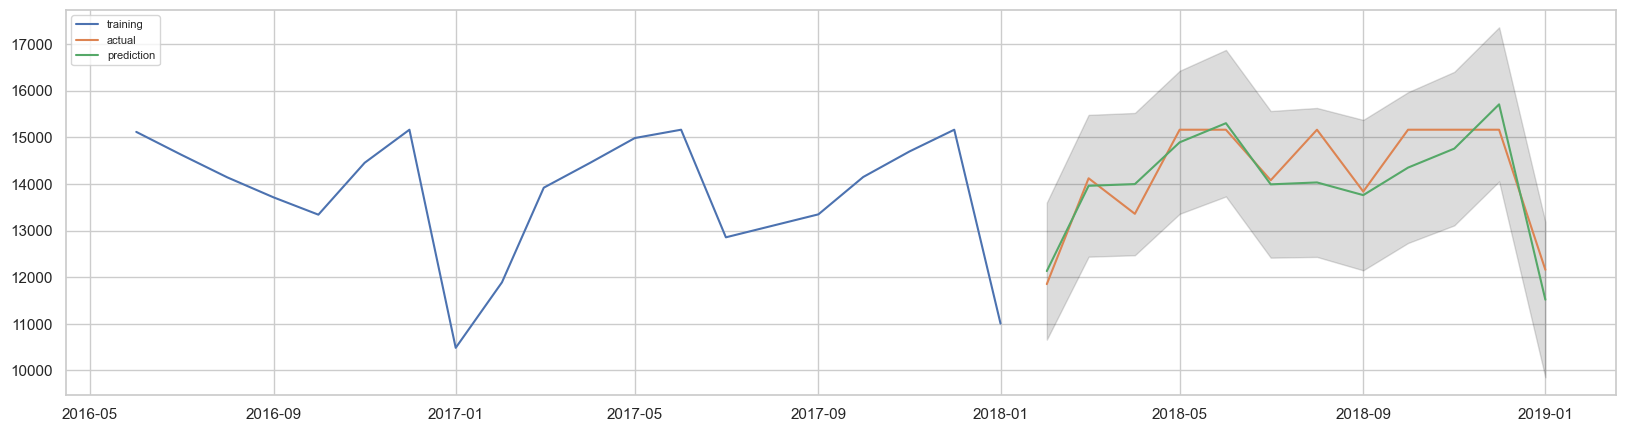

In [97]:
test_x[["lower", "upper"]] = model_fit.get_forecast(steps = 12).conf_int(0.05).values
plt.plot(train_x["Sales"][-20: ], label = "training")
plt.plot(test_x["Sales"], label = "actual")
plt.plot(test_x["pred"], label = "prediction")

# this line highlights the confidence interval region
plt.fill_between(test_x.index, test_x["lower"], test_x["upper"], color = "k", alpha = 0.15)
plt.legend(loc = "upper left", fontsize = 8)
plt.show()

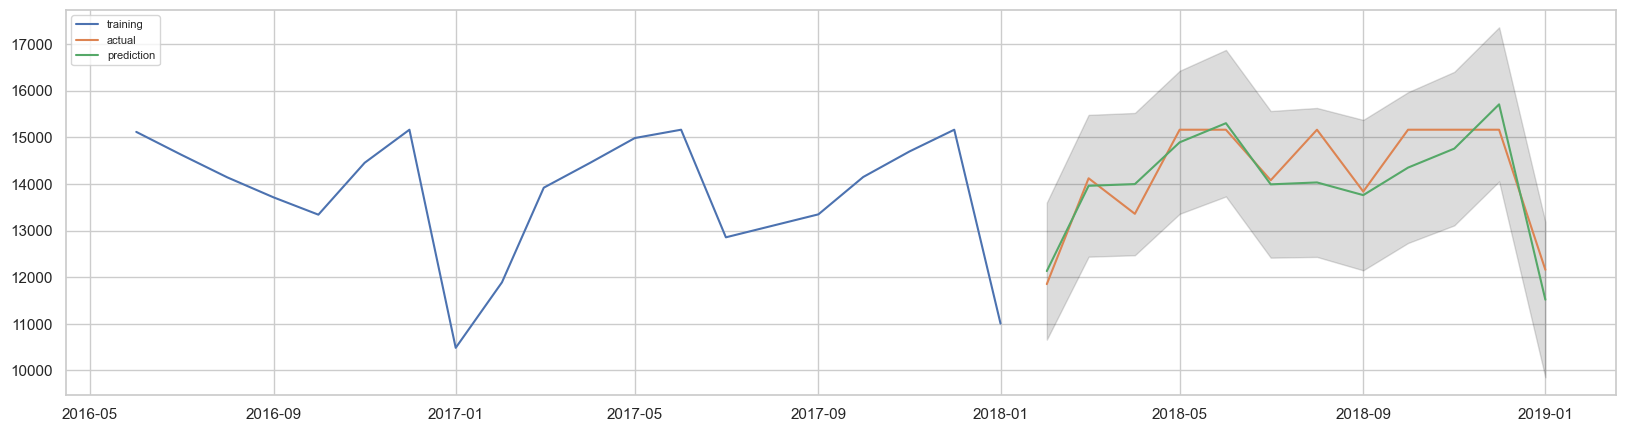

In [98]:
# trying again with alpha = 0.01
test_x[["lower", "upper"]] = model_fit.get_forecast(steps = 12).conf_int(0.01).values
plt.plot(train_x["Sales"][-20: ], label = "training")
plt.plot(test_x["Sales"], label = "actual")
plt.plot(test_x["pred"], label = "prediction")

# this line highlights the confidence interval region
plt.fill_between(test_x.index, test_x["lower"], test_x["upper"], color = "k", alpha = 0.15)
plt.legend(loc = "upper left", fontsize = 8)
plt.show()

In [99]:
a = model_fit.get_forecast(steps=12).conf_int(0.05).values
a

array([[10660.97874077, 13602.50160492],
       [12440.30889032, 15482.76566558],
       [12471.51416833, 15524.18410553],
       [13359.75316287, 16428.24648551],
       [13732.5316605 , 16876.02310733],
       [12419.28095108, 15565.39005099],
       [12435.56577239, 15631.1916321 ],
       [12147.71298426, 15374.76212393],
       [12733.80076989, 15969.1209635 ],
       [13111.98520757, 16406.26059084],
       [14055.46027696, 17361.65787397],
       [ 9852.74312286, 13184.00664267]])

In [100]:
a = model_fit.get_forecast(steps=12).conf_int(0.01).values
a

array([[10660.97874077, 13602.50160492],
       [12440.30889032, 15482.76566558],
       [12471.51416833, 15524.18410553],
       [13359.75316287, 16428.24648551],
       [13732.5316605 , 16876.02310733],
       [12419.28095108, 15565.39005099],
       [12435.56577239, 15631.1916321 ],
       [12147.71298426, 15374.76212393],
       [12733.80076989, 15969.1209635 ],
       [13111.98520757, 16406.26059084],
       [14055.46027696, 17361.65787397],
       [ 9852.74312286, 13184.00664267]])

### How to interpret confidence interval?
Suppose that the forecasted value is y_cap, and a confidence interval of (m, n) was obtained for a alpha value of, alpha = 0.05.

It means that the time series model will estimate the upper (n) and lower (m) bound of the values around the forecast, where there is only 5% chance that the real value will not be in that range.

That is, 95% of the forecasted values will fall within the range (m, n).

### NOTE
Say that the upper value is μ + 2σ, and the lower value is μ - 2σ. Now say that there are 2 forecasting models, m1 and m2, and a metric called ∆ is being calculated. Where,

∆ = Upper - Lower

For m1, ∆ = 20, and for ∆ = 30.

The model m1 is a better model among the two, because the variance here is lower compared to m2. Meaning, higher variance implies lower certainity.

# Exogenous Variable
Exogenous quiet simply means outlier or external or alien.

Consider a dataset of date and traffic between Bangalore and Mysore. When plotted, there are sudden surges seen. One of the possible reasons could be a long weekend, where people are travellling to nearby hill stations like Ooty, Coonoor, Kodaikanal, etc. Long weekends don;t occur at the same time every year. Such scenarios, which are not predictable are called exogenous variable. Such events cannot be planned for, and hence corrective measures can be taken when they occur.

In forecasting there is something called as momentum forecast. Momentum forecast is basically done based on historical data. But exogenous variables are unknown and hence they cannot be factored in.

Another example is, rise in the internet usage during the COVID-19 pandemic.

The changes observed during the normal weekends is not exogenous in nature.

Real world events like World Cups/ Olympics/ Global Events/ Big Movie releases etc, are all examples of exogenous events.

Examples of exogenous events:
- If you are working in Air-Conditioning industry, sales usually increase from April to June, but sometimes the sales also go up during January to February as well, this is due to El Niño effect. This is also an example of exogenous event.
- Say if the pakoda/ samosa consumption increases out of nowhere, due to rainfall. This is also an example of exogenous event.
- Oil prices going up due to a war is also an example of exogenous event.

Therefore, any event that has not been witnessed periodically, and if such events mess up the real world forecasts, those events are called exogenous events. In a nutshell, anything that is unanticipated and leads to a change in the forecast is called exogenous variable.

In [101]:
# importing a new dataset
df = pd.read_csv("rest_vis.csv")
df.head()

date   weekday  holiday  total
0  1/1/2016    Friday        1  296.0
1  1/2/2016  Saturday        0  191.0
2  1/3/2016    Sunday        0  202.0
3  1/4/2016    Monday        0  105.0
4  1/5/2016   Tuesday        0   98.0

In [102]:
df.shape

(517, 4)

In [103]:
# finding the number of rows which have NaN values in the dataset
df.isna().sum()

date        0
weekday     0
holiday     0
total      39
dtype: int64

In [104]:
# creating a copy of the dataset
df1 = df.copy()
df1.head()

date   weekday  holiday  total
0  1/1/2016    Friday        1  296.0
1  1/2/2016  Saturday        0  191.0
2  1/3/2016    Sunday        0  202.0
3  1/4/2016    Monday        0  105.0
4  1/5/2016   Tuesday        0   98.0

In [105]:
# dropping all the NaNs in the dataset
df.dropna(inplace = True)

In [106]:
# setting the date column as index
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace = True)
df.head()

weekday  holiday  total
date                                
2016-01-01    Friday        1  296.0
2016-01-02  Saturday        0  191.0
2016-01-03    Sunday        0  202.0
2016-01-04    Monday        0  105.0
2016-01-05   Tuesday        0   98.0

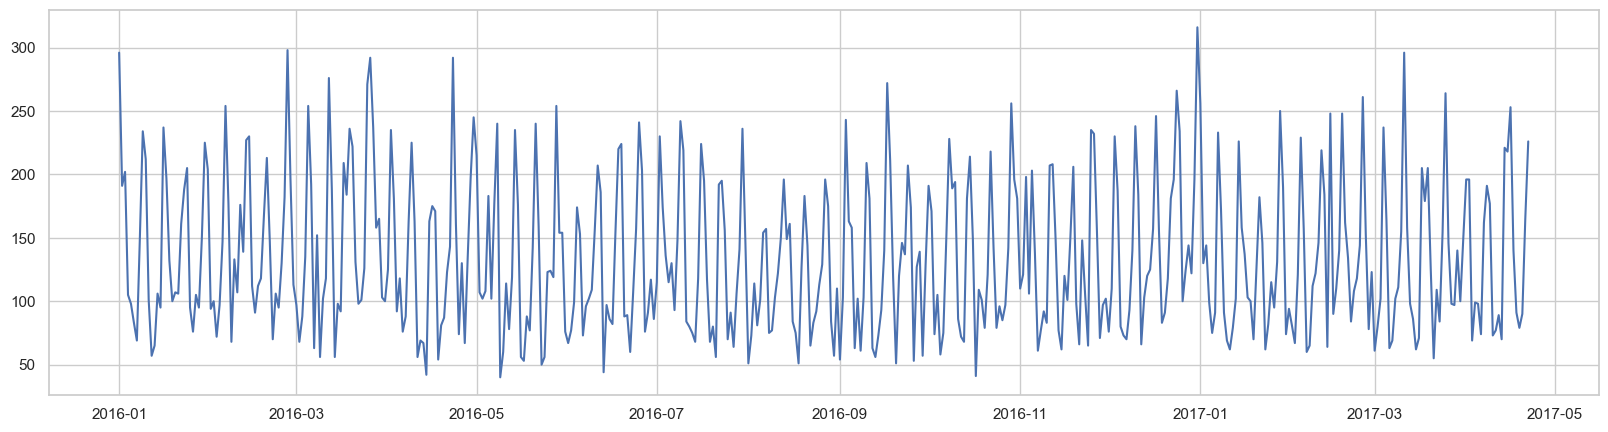

In [107]:
# plotting the data to visualize the time series
plt.plot(df.index, df["total"])

In the above plot, the peaks can be observed, but those peaks cannot be mapped to any particular days. Therefore, in order to obtain better insights, the number of days being visualized are decreased in the following plot.

([<matplotlib.axis.XTick at 0x16d43fe90>,
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Saturday'),
  Text(2, 0, 'Sunday'),
  Text(3, 0, 'Monday'),
  Text(4, 0, 'Tuesday'),
  Text(5, 0, 'Wednesday'),
  Text(6, 0, 'Thursday'),
  Text(7, 0, 'Friday'),
  Text(8, 0, 'Saturday'),
  Text(9, 0, 'Sunday'),
  Text(10, 0, 'Monday'),
  Text(11, 0, 'Tuesday'),
  Text(12, 0, 'Wednesday'),
  Text(13, 0, 'Thursday'),
  Text(14, 0, 'Friday'),
  Text(15, 0, 'Saturday'),
  Text(16, 0, 'Sunday'),
  Text(17, 0, 'Monday'),
  Text(18, 0, 'Tuesday'),
  Text(19, 0, 'Wednesday'),
  Text(20, 0, 'Thursday'),
  Text(21, 0, 'Friday'),
  Text(22, 0, 'Saturday'),
  Text(23, 0, 'Sunday'),
  Text(24, 0, 'Monday'),
  Text(25, 0, 'Tuesday'),
  Text(26, 0, 'Wednesday'),
  Text(27, 0, 'Thursday'),
  Text(28, 0, 'Friday'),
  Text(29, 0, 'Saturday'),
  Text(30, 0, 'Sunday'),
  Text(31, 0, 'Monday'),
  Text(32, 0, 'Tuesday'),
  Text(33, 0, 'Wednesday'),
  Text(34, 0, 'Thursday'),
  Text(35, 0, 'Friday'),
  Text(36, 0, 'Saturday'),
 

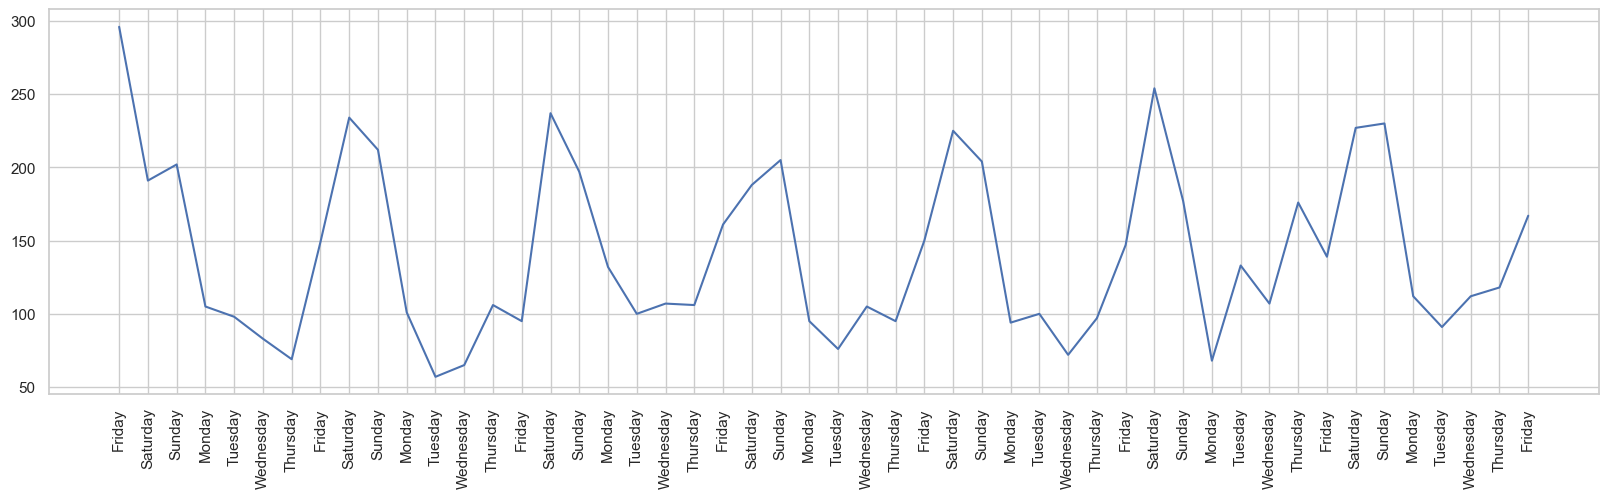

In [108]:
plt.plot(range(50), df["total"][: 50])
plt.xticks(range(0, 50), df["weekday"][: 50], rotation = 90)

It is now clear that the peaks in the number of visitors is around Saturday and Sunday.

In [109]:
# checking the number of holidays in the dataset
df["holiday"].value_counts()

holiday
0    446
1     32
Name: count, dtype: int64

<Axes: xlabel='date'>

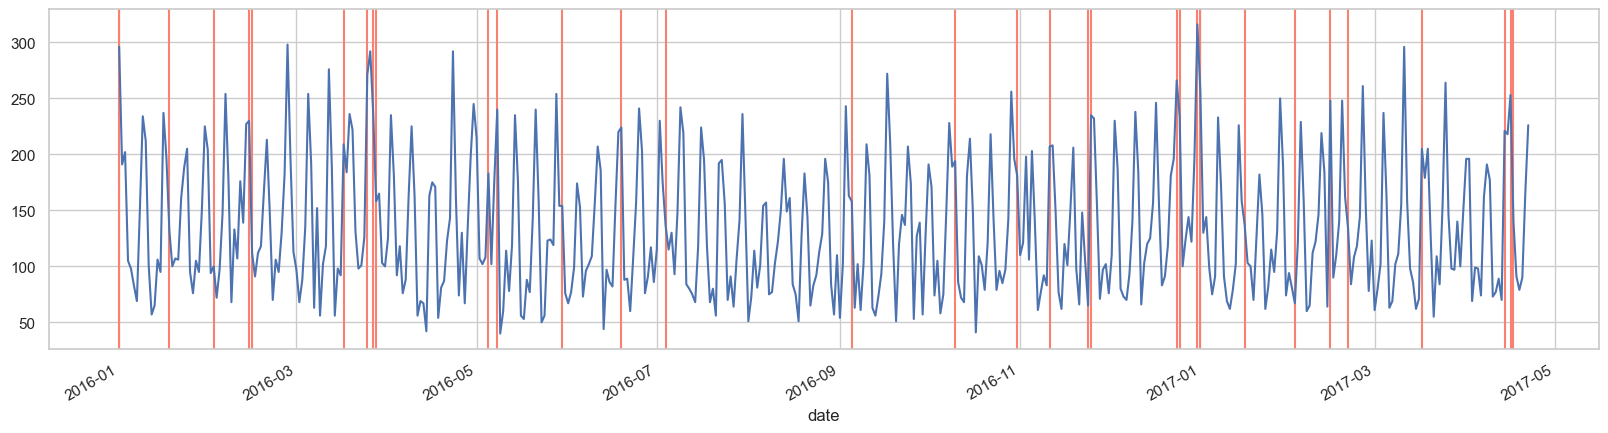

In [110]:
# plotting the data with holiday
# a red line is used to indicate that the given day is a holiday
holidays = df.loc[df["holiday"] == 1].index
for i in holidays:
    plt.axvline(x = i, color = "#FA8072")
df["total"].plot()


From the above plot it is observed that the holidays generally see a peak in the foot falls.

<Figure size 2000x500 with 0 Axes>

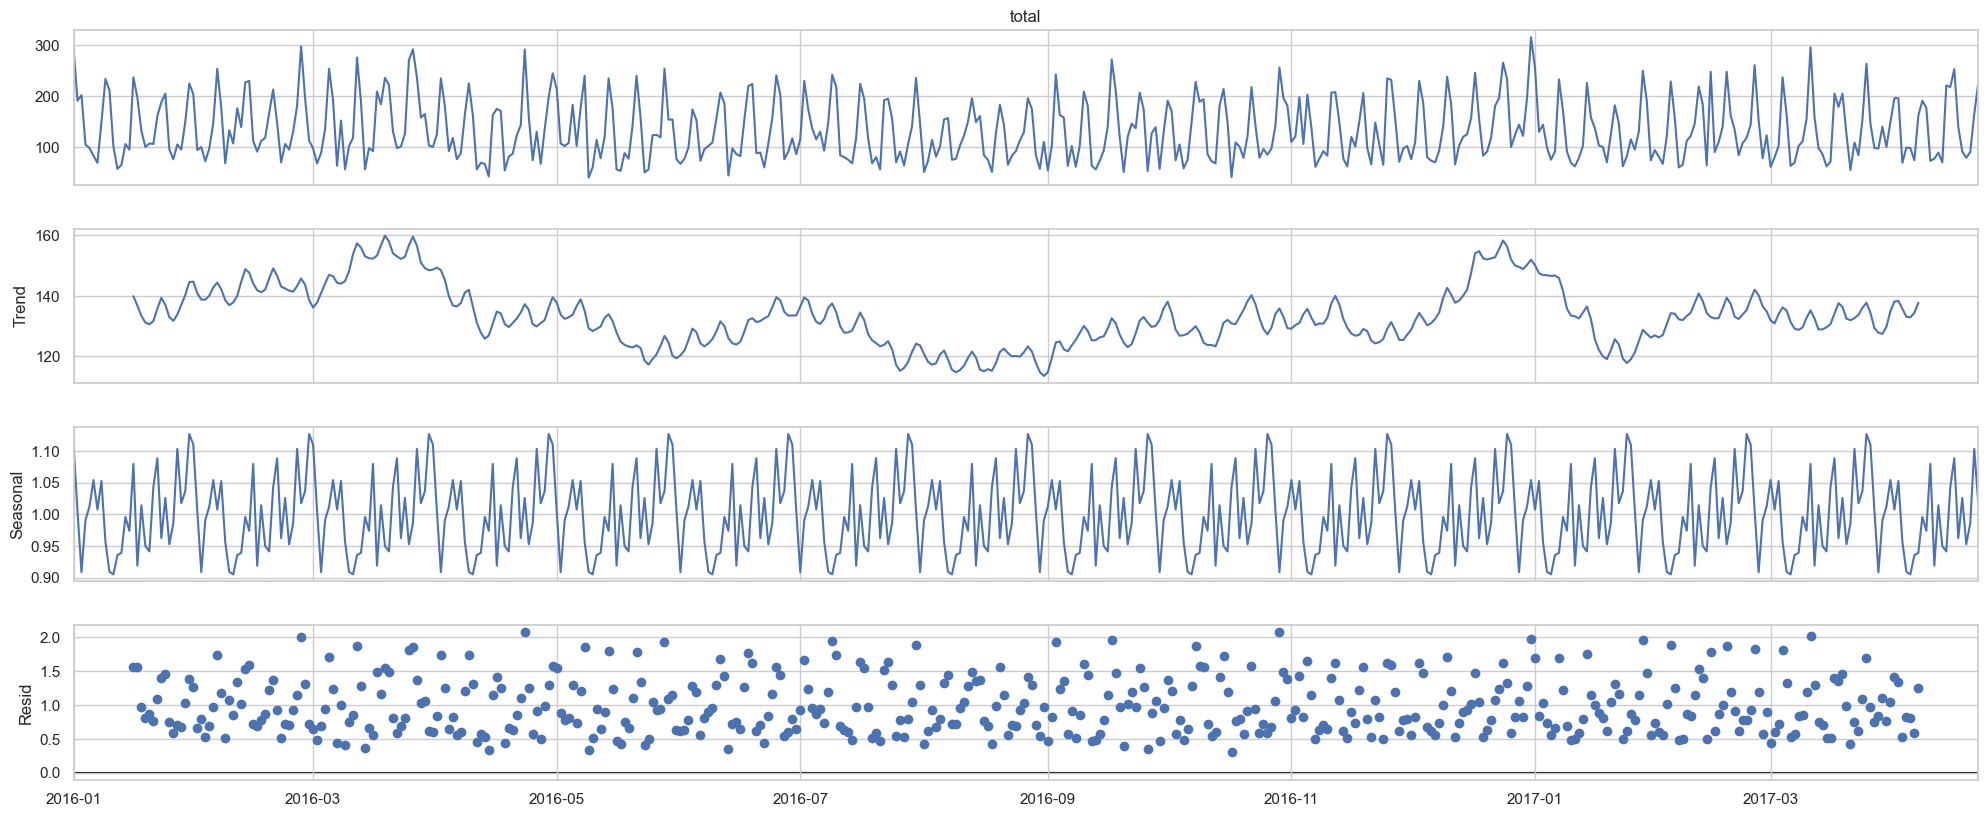

In [111]:
# decomposing the time series to see if it follows any pattern
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["total"], model = "multiplicative", period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20, 9)
fig.show()

From the above decomposition it is visible that th data consists of seasonality and the trend is increasing and decreasing which is understandable as the number of visitors will increase during the weekends.

Since there is seasonality existing, SARIMA model is used for prediction.

In [112]:
# generating a baseline forecast
train = df.iloc[: 436]
test = df.iloc[436: ]
test.tail()

weekday  holiday  total
date                                 
2017-04-18    Tuesday        0   91.0
2017-04-19  Wednesday        0   79.0
2017-04-20   Thursday        0   90.0
2017-04-21     Friday        0  165.0
2017-04-22   Saturday        0  226.0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.33146D+00    |proj g|=  6.55179D-02

At iterate    5    f=  5.24127D+00    |proj g|=  5.50413D-02

At iterate   10    f=  5.18655D+00    |proj g|=  7.48231D-02

At iterate   15    f=  4.98736D+00    |proj g|=  4.10049D-02

At iterate   20    f=  4.95333D+00    |proj g|=  1.17956D-02

At iterate   25    f=  4.94460D+00    |proj g|=  4.31024D-03

At iterate   30    f=  4.94384D+00    |proj g|=  2.87780D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

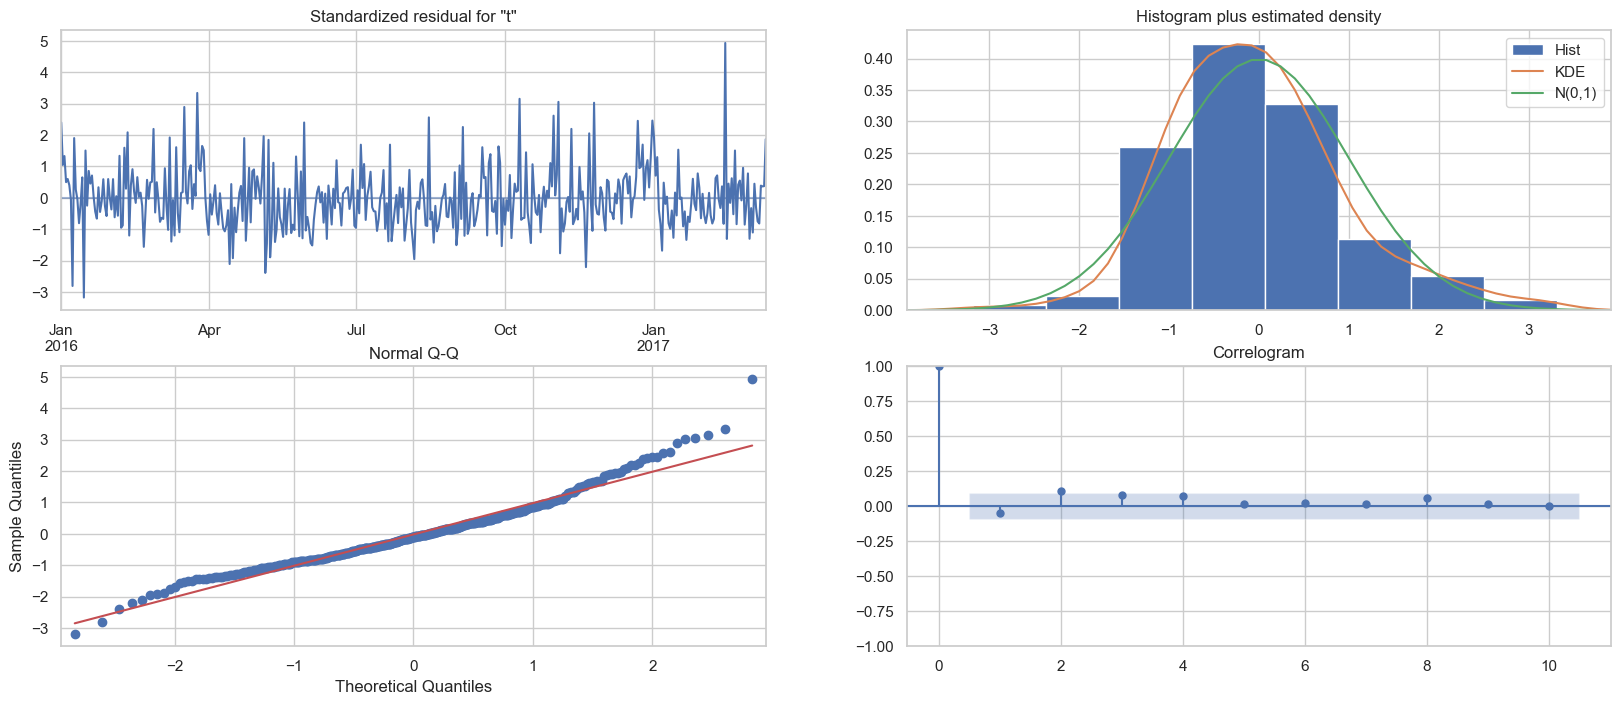

In [113]:
# training a pure seasonality based model by ignoring p, d, q paramters
model = SARIMAX(train["total"], seasonal_order = (1, 0, 1, 7))
result = model.fit()
fc = result.forecast(42)

# analyzing the residuals after training the model on the SARIMA
result.plot_diagnostics(figsize = (20, 8));

It is known that there is a problem of exogenous variable in the dataset.

In [114]:
# making a prediction based on the SARIMA model
start = len(train)
end = len(train) + len(test) - 1
predictions = result.predict(start = start, end = end)

# computing the performance
performance(test["total"], predictions)

MAE : 25.159
RMSE : 31.97
MAPE: 0.202


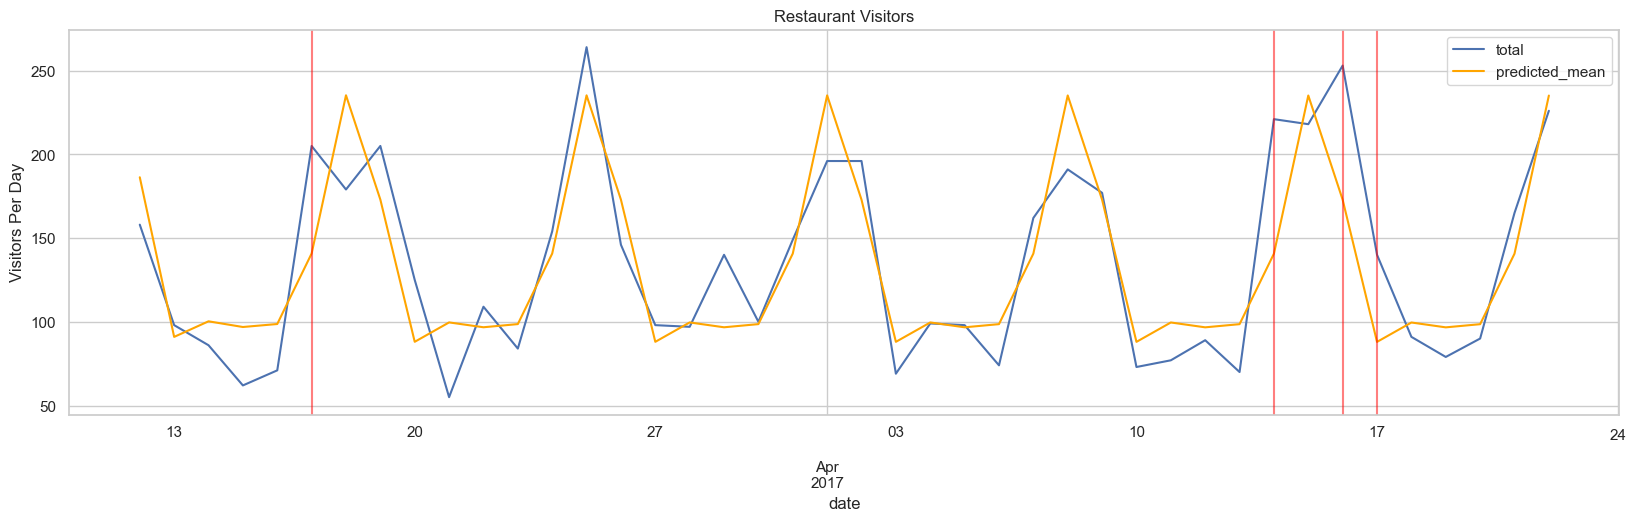

In [115]:
# plotting the results against the known values
title = "Restaurant Visitors"
xlabel = "Days"
ylabel = "Visitors Per Day"

ax = test["total"].plot(legend = True, figsize = (20, 5), title = title)
predictions.plot(legend = True, color = "orange")
ax.autoscale(axis = "x")
ax.set_ylabel(ylabel)
for x in test.query("holiday == 1").index:
    ax.axvline(x = x, color = "red", alpha = 0.5)

The results obtained are of low quality. Meaning, the model has missed the peaks for the holidays. This is because the SARIMA model does not account for any information about the holiday or non-holiday dates.

# SARIMAX Model
To address the short comings of the above SARIMA model, SARIMAX model is used. SARIMAX considers the exogenous variable as well. Meaning, if it is known that holiday is an exogenous variable, then this can be declared upfornt.

SARIMAX model has, along with the 7 parameters, p, d, q, P, D, Q, s, another parameter called exog. Which takes an array of exogenous variable as input.

In [116]:
exog_forecast = test[["holiday"]] # requires 2 brackets to yield the shape of (35, 1)
predictions = result.predict(start = start, end = end, exog = exog_forecast).rename("Predictions")

# computing the performance
performance(test["total"], predictions)

MAE : 25.159
RMSE : 31.97
MAPE: 0.202


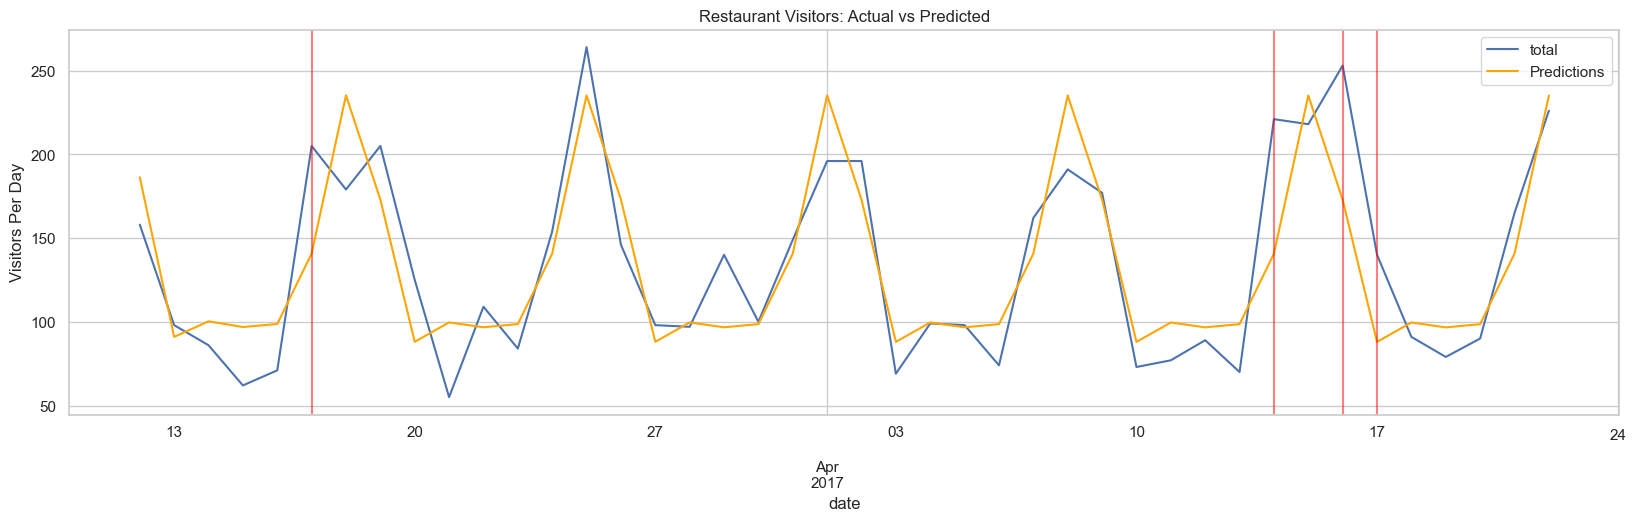

In [117]:
# plotting the predictions against the known values
title = "Restaurant Visitors: Actual vs Predicted"
xlabel = "Days"
ylabel = "Visitors Per Day"

ax = test["total"].plot(legend = True, figsize = (20, 5), title = title)
predictions.plot(legend = True, color = "orange")
ax.autoscale(axis = "x")
ax.set_ylabel(ylabel)
for x in test.query("holiday == 1").index:
    ax.axvline(x = x, color = "red", alpha = 0.5)

Whenever a forecast is built, the dates and holiday calendar are given, thereafter an event calendar is defined. Then the days where some kind of outlier behavior is expected or anitcipated are marked. The model then takes care of the prediction with all this factored in.

Now that the model is already trained in figuring out what the errors are, a forecast on newer dates can be made.

The following forecast is made on the 39 observations which were dropped.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


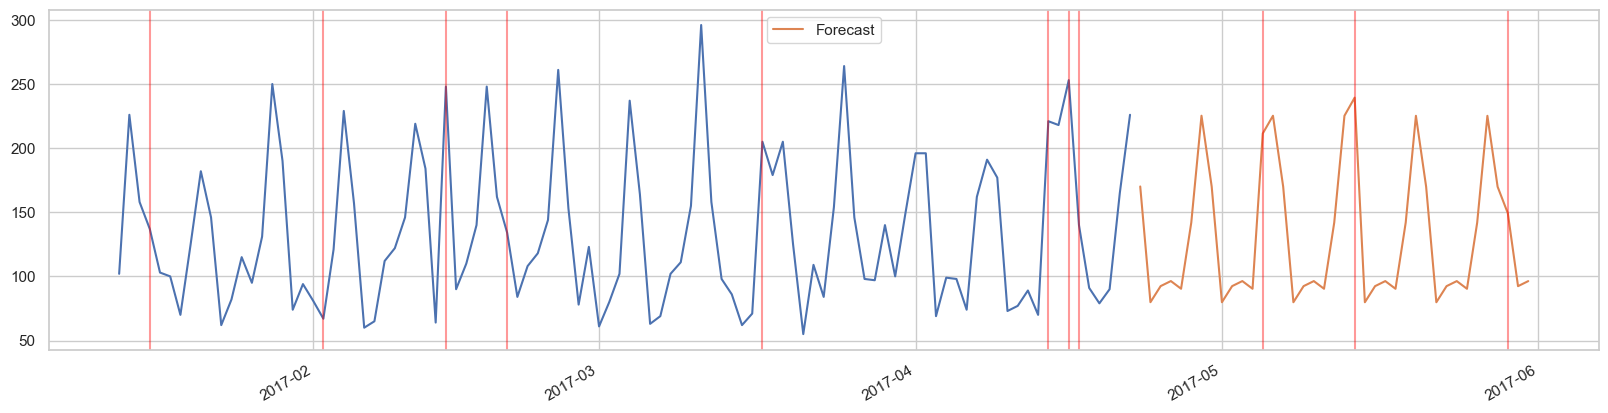

In [118]:
# forecasting for 39 newer observations
model = SARIMAX(df["total"], exog = df["holiday"], order = (1, 0, 0), seasonal_order = (1, 0, 1, 7), enforce_invertibility = False)
results = model.fit(disp = False)
exog_forecast = df1[478: ][["holiday"]]
fcast = results.predict(478, df1.shape[0]-1, exog = exog_forecast).rename("Forecast")

# plotting the perdictions against the known values
title = "Restaurant Visitors: Actual vs Predicted"
xlabel = "Days"
ylabel = "Visitors Per Day"

# ax = df["total"][-100: ].plot(legend = True, figsize=(16, 5), title = title)
plt.plot(df[-100: ].index, df[-100: ].total)
fcast.plot(legend = True)
ax.autoscale(axis = "x", tight = True)
ax.set(xlabel = xlabel, ylabel = ylabel)
for x in df[-100: ].query("holiday == 1").index:
    plt.axvline(x = x, color = "red", alpha = 0.4)

for x in df1[-42: ].query('holiday==1').date:
    plt.axvline(x = pd.to_datetime(x), color = "red", alpha = 0.4)

Note that while forecasting,
- whether the future plot looks correct or incorrect has to be decided.
- metrics and other measures aside, it is the responsibility of the forecaster that the forecast has to be correct.
- forecasting is a game of experience, and not just theory and code.

Refer this: https://towardsdatascience.com/time-series-forecasting-prediction-intervals-360b1bf4b085

# Change Points
The most popular curve for time series seen so far is the increasing wavy curve. When there is time series of this sort, a time series decomposition is done, post which, trend, seasonality and residuals are obtained.

Now consider a new time series, the trend is such that when a straight line is drawn from point a, the straight line has no slope up to a certain point, say point b. Post which another straight line has to be drawn to show the increasing trend up to point c. Therefore, there are 2 time series, T1 up to point b, and T2 after point b. The complete time series is therefore expressed as,

TS = T_1vec + T_2vec

The impact of T1 and T2 is such that it helps in understanding what trend to pick while making a forecast.

Consider that a prediction at t+1 has to be made. What points should be considered to make the prediction ar t+1? a, c or a + c? The most recent data point, or the trend should be considered to predict at t+1, which is point c. This is because, it is known that something occured at point b which caused the trend to change its direction.

The growth of fintech industry in India was pretty mundane up until 8th November 2016 (demonetization). Meaning the trend was almost a flat line. Post the demonetizzation date, the growth trend changed direction into an upward direction. If the demonetization had not been announced, the growth would have continued to be the same as before. Therefore, when forecasting for fintech industry, at t+1, the most recent trend is considered.

Such points, where the time series drastically changes its behavior is called as change point(s). Change points cannot be predicted in advance. They can only be found when looked backwards. Meaning, they are a retrospective finding.

Read this: https://pro.arcgis.com/en/pro-app/3.1/tool-reference/space-time-pattern-mining/how-change-point-detection-works.htm

# Detecting a Change Point
Something called as cost is defined, and points were a drastic change in cost are checked. Cost could be,

Cost = mean(time_series) (or) standard deviation (or) variance (or) change in slope (or) seasons etc.

The cost could be any of these.

Therefore change points can be based on the following factors:
##### 1. Change in Mean
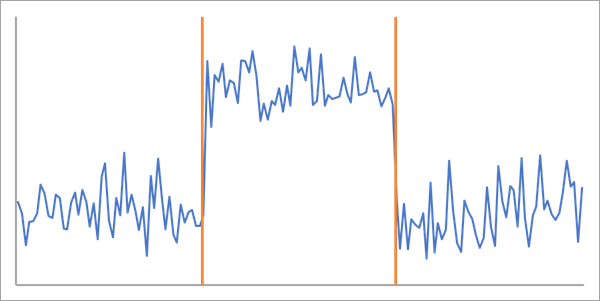

A window is defined, this could be number of days, months, quarters, years, etc (essentially a range). Say that the first window is from point 1 to 20, the range is shifted by 1, the second window is from 2 to 21. The means of each window can be calculated. The means of each window are compared to observe a change in the mean. Where ever the change is drastic, that point can be concluded as the change point.

All the points where a major change in the cost is seen are called as change points. A time series can have multiple chnge points.

What if the change in periodicity is a seasonal pattern? How is seasonality differentiated from the change point?

Sometimes the time series can have multiple seasonality. Or sometime, the trend changes after every n period of time. In this case the data has multiple time series. Would this be called seasonality or changing point? In such cases, it can said that the change points are also seasonal in nature.

##### 2. Change in Variance/ Standard Deviation
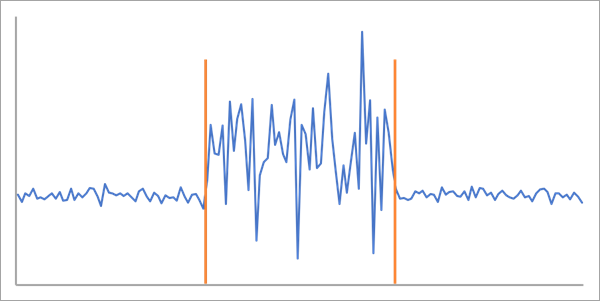

##### 3. Change in Slope
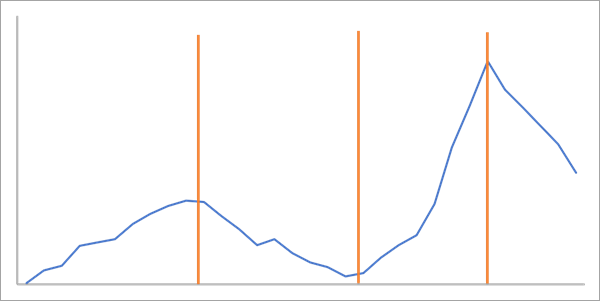

##### 4. Change in Count
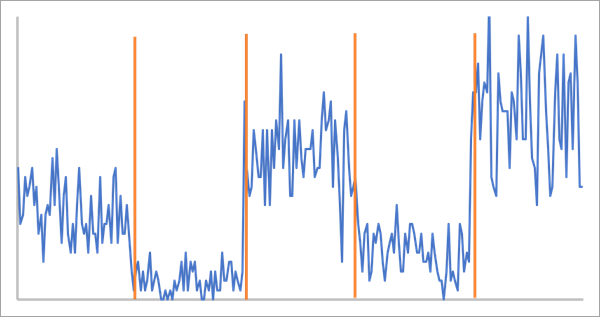

##### 5. Change in Periodicity

##### 6. Change in Pattern


There are 2 approaches to finding the change points,
- Manual
- Programming

### Manual Approach
Considering the mobile sales data, a 60 point window is considered. A slope is calculated for each of the window.
- m1 = 1 to 60
- m2 = 2 to 61

If m2 - m1 > 7.5, then it would be called as a change point. This threshold is only for demonstration.

In [119]:
plt.rcParams["figure.figsize"] = (20, 5)

In [120]:
mobile_sales = pd.read_excel("mobilesales.xlsx")
mobile_sales.head()

DATE   Sales
0 2001-01-01  6519.0
1 2001-02-01  6654.0
2 2001-03-01  7332.0
3 2001-04-01  7332.0
4 2001-05-01  8240.0

In [121]:
# setting "DATE" as index
mobile_sales.set_index("DATE", inplace = True)
mobile_sales.head()

Sales
DATE              
2001-01-01  6519.0
2001-02-01  6654.0
2001-03-01  7332.0
2001-04-01  7332.0
2001-05-01  8240.0

In [122]:
# checking for missing values
mobile_sales["Sales"].isna().sum()

19

<Axes: xlabel='DATE'>

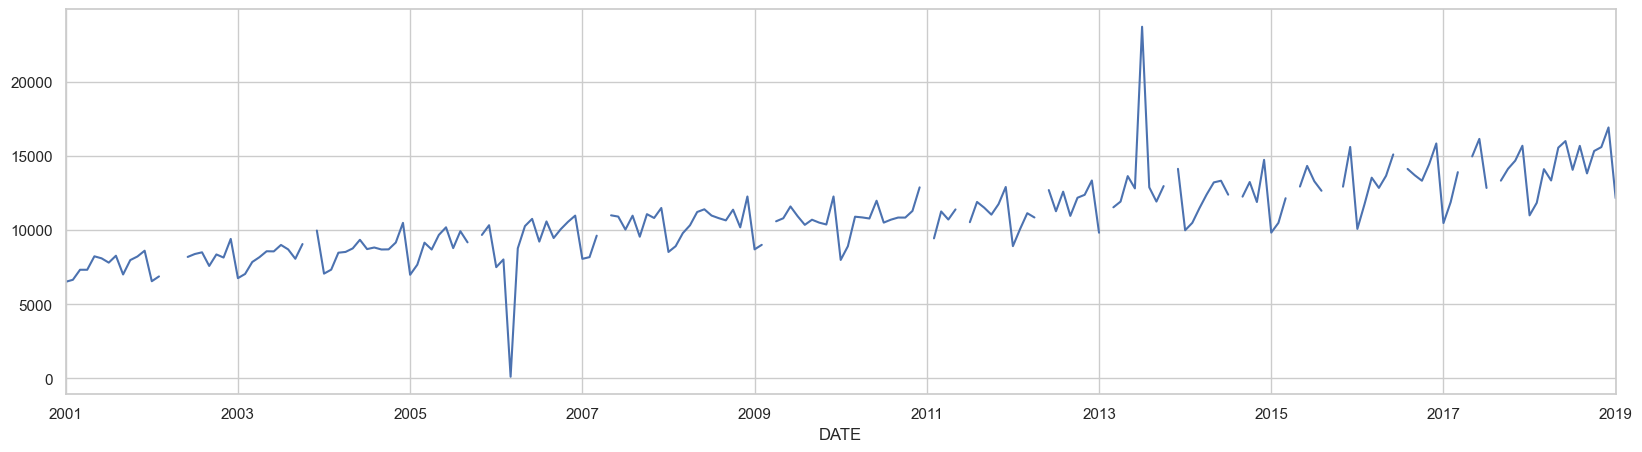

In [123]:
# plotting
mobile_sales["Sales"].plot(label = "actual")

In [124]:
# filling the missing value using linear interpolation
mobile_sales["Sales"] = mobile_sales["Sales"].interpolate(method = "linear")
mobile_sales["Sales"].isna().sum()

0

<Axes: xlabel='DATE'>

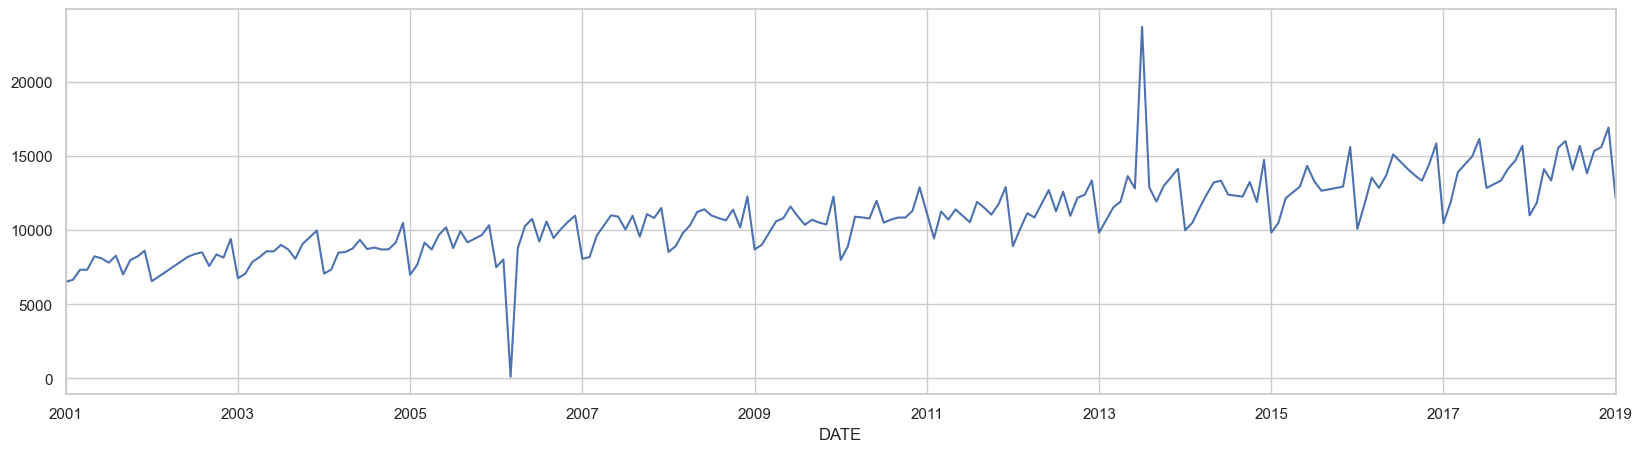

In [125]:
# plotting
mobile_sales["Sales"].plot(label = "actual")

<Axes: xlabel='DATE'>

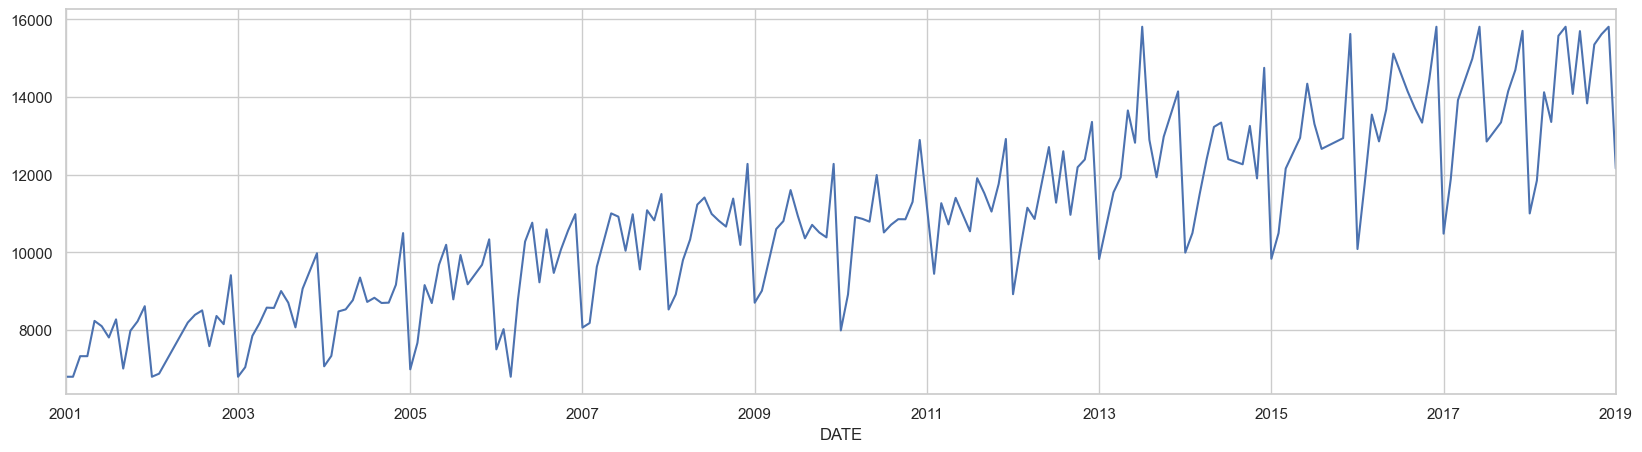

In [126]:
# clipping the outliers
mobile_sales["Sales"] = mobile_sales["Sales"].clip(upper = mobile_sales["Sales"].quantile(0.98), lower = mobile_sales["Sales"].quantile(0.02))

# plotting
mobile_sales["Sales"].plot(label = "actual")

In [127]:
# creating a custom method to compute performance
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

def performance(actual, predicted):
    print("MAE : ", round(mae(actual, predicted), 3))
    print("RMSE : ", round(mse(actual, predicted) ** 0.5, 3))
    print("MAPE: ", round(mape(actual, predicted), 3))

In [128]:
# splitting the dataset into train and test sets
cutoff_date = mobile_sales.index[-12]
train_x = mobile_sales.loc[mobile_sales.index < cutoff_date].copy()
test_x = mobile_sales.loc[mobile_sales.index >= cutoff_date].copy()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE :  536.519
RMSE :  622.166
MAPE:  0.037


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='DATE'>

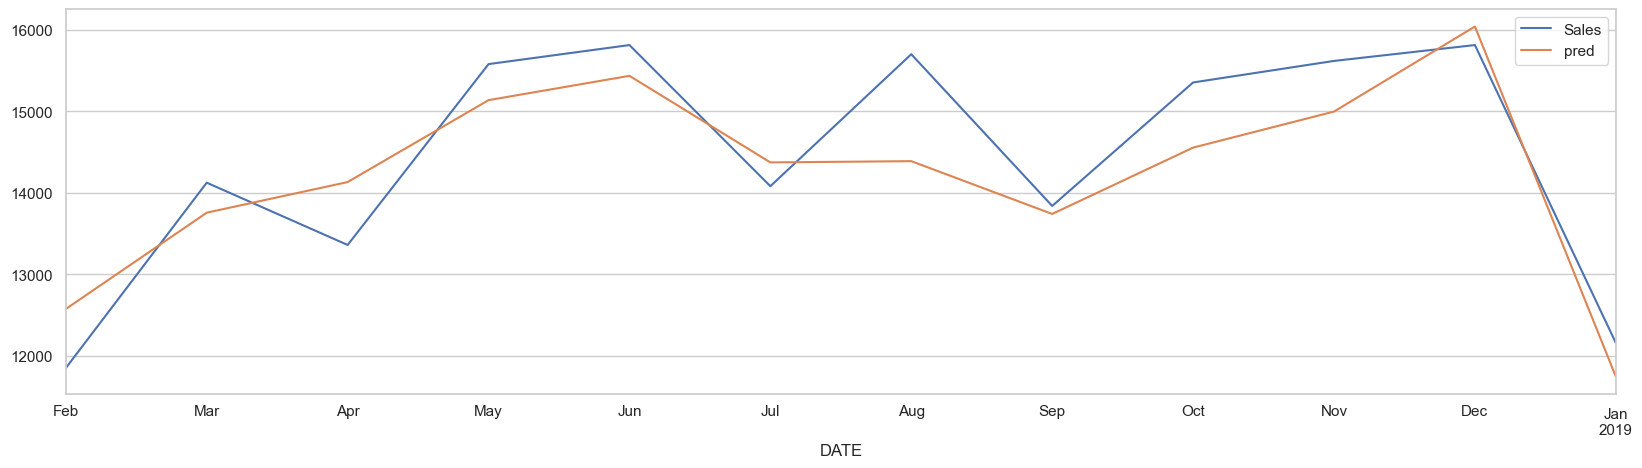

In [129]:
# training the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# building the model
model = SARIMAX(train_x["Sales"], order = (3, 1, 3), seasonal_order = (1, 1, 1, 12))

# training the model
model_fit = model.fit(disp = False)

# predicting
test_x["pred"] = model_fit.forecast(steps = 12)

# computing the performance
performance(test_x["Sales"], test_x["pred"])

# plotting
test_x.plot()

In [130]:
from IPython.display import Image
Image(url='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/007/752/original/illustration_of_change_point_detectopn_via_sliding-window.gif?1658421673')

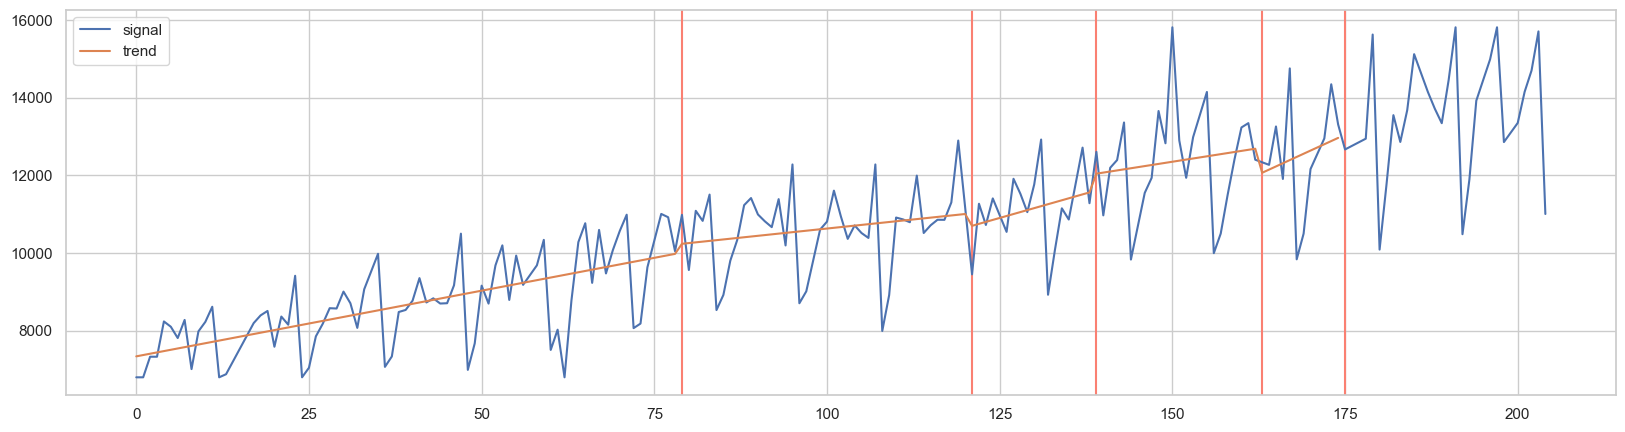

In [131]:
# this function helps plot change points
def plot_changepoints(signal, changepoints):
    for cp in changepoints:
        plt.axvline(x = cp, color = "#FA8072")
    plt.plot(signal, label = "signal")

    start = 0
    trends = np.array([])
    for i in changepoints:
        x = np.arange(start, i)
        y = signal[start: i]
        l1 = np.polyfit(x, y, deg = 1)
        trend = x * l1[0] + l1[1]
        trends = np.append(trends, trend)
        start = i
    
    plt.plot(trends, label = "trend")
    plt.legend()
    plt.show()

signal = train_x["Sales"] # stationarize for mean as cost function
window = 60

def get_slope(y):
    return np.polyfit(np.arange(len(y)), y, deg = 1)[0]

changepoints = signal.loc[abs(signal.rolling(window, center = True).apply(get_slope).diff()) > 7.5].index

# converting to index from dates
temp = signal.reset_index()
changepoints = temp.loc[temp["DATE"].isin(changepoints)].index.tolist()

plot_changepoints(signal.values, changepoints)

The blue line represents the time series trend, the orange line represents the slope, vertical red lines represent the points where the slope of the orange line is changing drastically.

### Programming Approach
The ruptures package leverages ML methodologies to identify the change points.

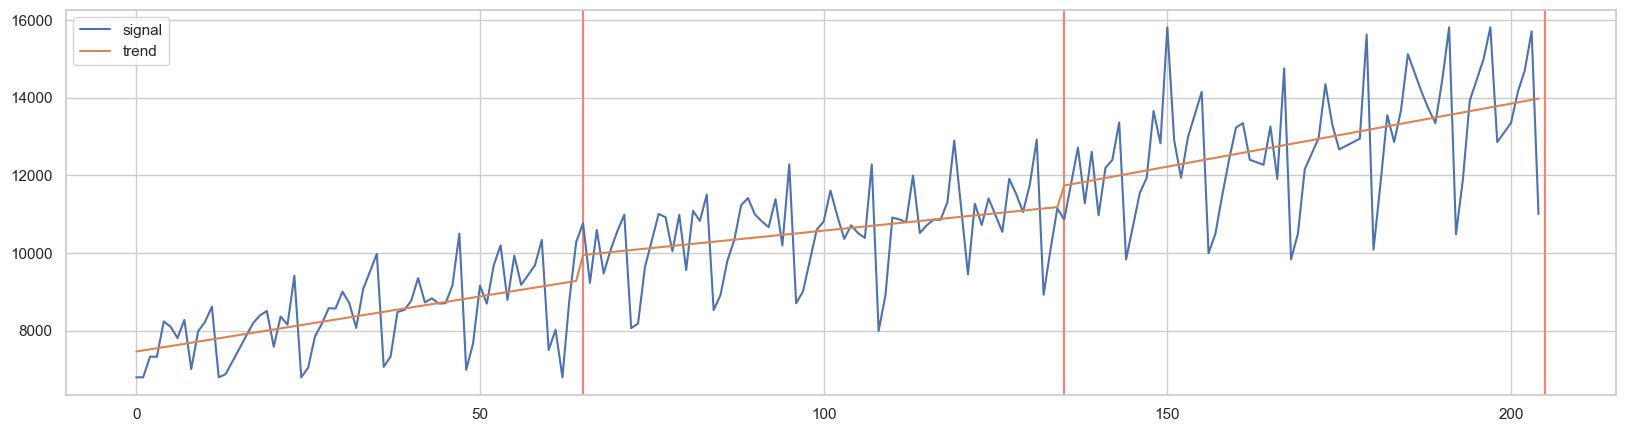

In [132]:
import ruptures as rpt

# generating signal
n_samples, dim, sigma = 1000, 3, 4
n_bkps = 4 # number of breakpoints
signal = train_x["Sales"].values

# detection
algo = rpt.Pelt(model = "rbf").fit(signal)
changepoints = algo.predict(pen = 5)
# higher or lower (find out) the value of penaly (pen), the model is more sensitive to catch the change points
plot_changepoints(signal, changepoints)

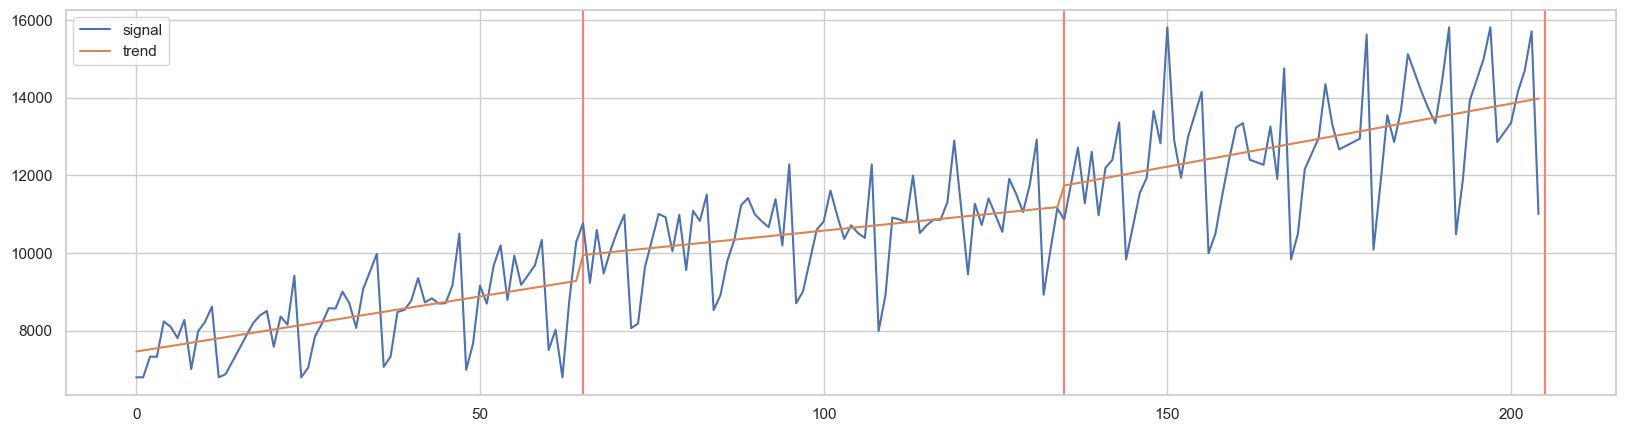

In [133]:
# detection
algo = rpt.Pelt(model = "rbf").fit(signal)
changepoints = algo.predict(pen = 10)
plot_changepoints(signal, changepoints)

Read this: https://www.kaggle.com/code/nabeelvalley/change-point-detection-with-ruptures

### Things to Remember
- Change point does not affect the prediction in any way.
- change point only helps in understanding if the time series has any drastic change in the cost.
- If there is a drastic change, there may be a need to change the training data to capture the trend properly.

# Time Series Forecasting using Linear Regression
Consider that tomorrow is a Saturday (23rd March 2024), say that a restaurant wants to predict the number of expected customers, what factors will be considered for making this prediction?
1. Day of the week
2. Number of customers on the previous days
3. Weekend/ Weekday
4. Last week's sales
5. Holiday/ Festival

If the data is stored on the basis of time,

Sales on 24th March 2024 = (α1 * Weekend) + (α2 * Last week's sales) + (α3 * Number of customers on the previous day) + (α4 * Day of the week) + (α5 * Holiday) + Error

This formula can be used to predict the sales on the 24th of March. Where,
- α1, α2, α3, α4, α5 = linear regression coefficients

From the existing data, all of these parameters will be created, and then an deduction can be made if linear regression can help in making the prediction.

In [134]:
df = pd.read_csv("rest_vis.csv")
df.head()

date   weekday  holiday  total
0  1/1/2016    Friday        1  296.0
1  1/2/2016  Saturday        0  191.0
2  1/3/2016    Sunday        0  202.0
3  1/4/2016    Monday        0  105.0
4  1/5/2016   Tuesday        0   98.0

In [135]:
# setting the "date" column as the index of the DataFrame
df["date"] = pd.to_datetime(df["date"])

# creating a feature "weekday"
df["weekday"] = np.where(
    ((df["weekday"] == "Friday") | (df["weekday"] == "Thursday") | (df["weekday"] == "Wednesday") | (df["weekday"] == "Tuesday") | (df["weekday"] == "Monday")), "working_day", "weekend"
)
intmdt = pd.get_dummies(df["weekday"])
intmdt

weekend  working_day
0      False         True
1       True        False
2       True        False
3      False         True
4      False         True
..       ...          ...
512     True        False
513     True        False
514    False         True
515    False         True
516    False         True

[517 rows x 2 columns]

In [136]:
df = pd.concat([df, intmdt], axis = 1)
df.head()

date      weekday  holiday  total  weekend  working_day
0 2016-01-01  working_day        1  296.0    False         True
1 2016-01-02      weekend        0  191.0     True        False
2 2016-01-03      weekend        0  202.0     True        False
3 2016-01-04  working_day        0  105.0    False         True
4 2016-01-05  working_day        0   98.0    False         True

If prediction has to be made for 24th March 2024, some previous data is needed, i.e., 23, 22, 21, ... Similar will be the case if predicting for 23rd March.

Using the shift() method to shift by 1, and a window of 31 days (1 month) is considered.

In [137]:
# shifting the data
for i in range(1, 32):
    df["Lag_{}".format(i)] = df["total"].shift(i)

In [138]:
# combining this data
lis = ["Lag_{}".format(i) for i in range(1, 32)]

# since some of the lags will be NaNs they have to be dropped
df.dropna(inplace = True)

# calculating the average lag for the last 31 days
df["last_month_avg_level"] = df.loc[:, lis].sum(axis = 1)/ 7
df.head()

date      weekday  holiday  total  weekend  working_day  Lag_1  \
31 2016-02-01  working_day        0   94.0    False         True  204.0   
32 2016-02-02  working_day        1  100.0    False         True   94.0   
33 2016-02-03  working_day        0   72.0    False         True  100.0   
34 2016-02-04  working_day        0   97.0    False         True   72.0   
35 2016-02-05  working_day        0  147.0    False         True   97.0   

    Lag_2  Lag_3  Lag_4  Lag_5  Lag_6  Lag_7  Lag_8  Lag_9  Lag_10  Lag_11  \
31  225.0  150.0   95.0  105.0   76.0   95.0  205.0  188.0   161.0   106.0   
32  204.0  225.0  150.0   95.0  105.0   76.0   95.0  205.0   188.0   161.0   
33   94.0  204.0  225.0  150.0   95.0  105.0   76.0   95.0   205.0   188.0   
34  100.0   94.0  204.0  225.0  150.0   95.0  105.0   76.0    95.0   205.0   
35   72.0  100.0   94.0  204.0  225.0  150.0   95.0  105.0    76.0    95.0   

    Lag_12  Lag_13  Lag_14  Lag_15  Lag_16  Lag_17  Lag_18  Lag_19  Lag_20  \
31   107.0   100.0   132.0   197.0   237.0    95.0   106.0    65.0    57.0   
32   106.0   107.0   100.0   132.0   197.0   237.0    95.0   106.0    65.0   
33   161.0   106.0   107.0   100.0   132.0   197.0   237.0    95.0   106.0   
34   188.0   161.0   106.0   107.0   100.0   132.0   197.0   237.0    95.0   
35   205.0   188.0   161.0   106.0   107.0   100.0   132.0   197.0   237.0   

    Lag_21  Lag_22  Lag_23  Lag_24  Lag_25  Lag_26  Lag_27  Lag_28  Lag_29  \
31   101.0   212.0   234.0   149.0    69.0    83.0    98.0   105.0   202.0   
32    57.0   101.0   212.0   234.0   149.0    69.0    83.0    98.0   105.0   
33    65.0    57.0   101.0   212.0   234.0   149.0    69.0    83.0    98.0   
34   106.0    65.0    57.0   101.0   212.0   234.0   149.0    69.0    83.0   
35    95.0   106.0    65.0    57.0   101.0   212.0   234.0   149.0    69.0   

    Lag_30  Lag_31  last_month_avg_level  
31   191.0   296.0            635.142857  
32   202.0   191.0            606.285714  
33   105.0   202.0            593.285714  
34    98.0   105.0            574.714286  
35    83.0    98.0            573.571429

In [139]:
# calculating the average lag for the last 7 days
lis = ["Lag_{}".format(i) for i in range(1, 8)]
df["last_week_avg_level"] = df.loc[:, lis].sum(axis = 1)/ 7
df.head()

date      weekday  holiday  total  weekend  working_day  Lag_1  \
31 2016-02-01  working_day        0   94.0    False         True  204.0   
32 2016-02-02  working_day        1  100.0    False         True   94.0   
33 2016-02-03  working_day        0   72.0    False         True  100.0   
34 2016-02-04  working_day        0   97.0    False         True   72.0   
35 2016-02-05  working_day        0  147.0    False         True   97.0   

    Lag_2  Lag_3  Lag_4  Lag_5  Lag_6  Lag_7  Lag_8  Lag_9  Lag_10  Lag_11  \
31  225.0  150.0   95.0  105.0   76.0   95.0  205.0  188.0   161.0   106.0   
32  204.0  225.0  150.0   95.0  105.0   76.0   95.0  205.0   188.0   161.0   
33   94.0  204.0  225.0  150.0   95.0  105.0   76.0   95.0   205.0   188.0   
34  100.0   94.0  204.0  225.0  150.0   95.0  105.0   76.0    95.0   205.0   
35   72.0  100.0   94.0  204.0  225.0  150.0   95.0  105.0    76.0    95.0   

    Lag_12  Lag_13  Lag_14  Lag_15  Lag_16  Lag_17  Lag_18  Lag_19  Lag_20  \
31   107.0   100.0   132.0   197.0   237.0    95.0   106.0    65.0    57.0   
32   106.0   107.0   100.0   132.0   197.0   237.0    95.0   106.0    65.0   
33   161.0   106.0   107.0   100.0   132.0   197.0   237.0    95.0   106.0   
34   188.0   161.0   106.0   107.0   100.0   132.0   197.0   237.0    95.0   
35   205.0   188.0   161.0   106.0   107.0   100.0   132.0   197.0   237.0   

    Lag_21  Lag_22  Lag_23  Lag_24  Lag_25  Lag_26  Lag_27  Lag_28  Lag_29  \
31   101.0   212.0   234.0   149.0    69.0    83.0    98.0   105.0   202.0   
32    57.0   101.0   212.0   234.0   149.0    69.0    83.0    98.0   105.0   
33    65.0    57.0   101.0   212.0   234.0   149.0    69.0    83.0    98.0   
34   106.0    65.0    57.0   101.0   212.0   234.0   149.0    69.0    83.0   
35    95.0   106.0    65.0    57.0   101.0   212.0   234.0   149.0    69.0   

    Lag_30  Lag_31  last_month_avg_level  last_week_avg_level  
31   191.0   296.0            635.142857           135.714286  
32   202.0   191.0            606.285714           135.571429  
33   105.0   202.0            593.285714           139.000000  
34    98.0   105.0            574.714286           134.285714  
35    83.0    98.0            573.571429           134.571429

In [140]:
# calculating the average lag for the last 14 days
lis = ["Lag_{}".format(i) for i in range(1, 15)]
df["last_2weeks_avg_level"] = df.loc[:, lis].sum(axis = 1)/ 14
df.head()

date      weekday  holiday  total  weekend  working_day  Lag_1  \
31 2016-02-01  working_day        0   94.0    False         True  204.0   
32 2016-02-02  working_day        1  100.0    False         True   94.0   
33 2016-02-03  working_day        0   72.0    False         True  100.0   
34 2016-02-04  working_day        0   97.0    False         True   72.0   
35 2016-02-05  working_day        0  147.0    False         True   97.0   

    Lag_2  Lag_3  Lag_4  Lag_5  Lag_6  Lag_7  Lag_8  Lag_9  Lag_10  Lag_11  \
31  225.0  150.0   95.0  105.0   76.0   95.0  205.0  188.0   161.0   106.0   
32  204.0  225.0  150.0   95.0  105.0   76.0   95.0  205.0   188.0   161.0   
33   94.0  204.0  225.0  150.0   95.0  105.0   76.0   95.0   205.0   188.0   
34  100.0   94.0  204.0  225.0  150.0   95.0  105.0   76.0    95.0   205.0   
35   72.0  100.0   94.0  204.0  225.0  150.0   95.0  105.0    76.0    95.0   

    Lag_12  Lag_13  Lag_14  Lag_15  Lag_16  Lag_17  Lag_18  Lag_19  Lag_20  \
31   107.0   100.0   132.0   197.0   237.0    95.0   106.0    65.0    57.0   
32   106.0   107.0   100.0   132.0   197.0   237.0    95.0   106.0    65.0   
33   161.0   106.0   107.0   100.0   132.0   197.0   237.0    95.0   106.0   
34   188.0   161.0   106.0   107.0   100.0   132.0   197.0   237.0    95.0   
35   205.0   188.0   161.0   106.0   107.0   100.0   132.0   197.0   237.0   

    Lag_21  Lag_22  Lag_23  Lag_24  Lag_25  Lag_26  Lag_27  Lag_28  Lag_29  \
31   101.0   212.0   234.0   149.0    69.0    83.0    98.0   105.0   202.0   
32    57.0   101.0   212.0   234.0   149.0    69.0    83.0    98.0   105.0   
33    65.0    57.0   101.0   212.0   234.0   149.0    69.0    83.0    98.0   
34   106.0    65.0    57.0   101.0   212.0   234.0   149.0    69.0    83.0   
35    95.0   106.0    65.0    57.0   101.0   212.0   234.0   149.0    69.0   

    Lag_30  Lag_31  last_month_avg_level  last_week_avg_level  \
31   191.0   296.0            635.142857           135.714286   
32   202.0   191.0            606.285714           135.571429   
33   105.0   202.0            593.285714           139.000000   
34    98.0   105.0            574.714286           134.285714   
35    83.0    98.0            573.571429           134.571429   

    last_2weeks_avg_level  
31             139.214286  
32             136.500000  
33             136.500000  
34             134.000000  
35             133.357143

Say that if 23rd March 2024 is a Saturday, then 17th March 2024, 10th March 2024, and so on will all be Saturdays. Therefore, it is safe to assume that there is some kind of seasonality persent in the data.

Hence a month long data is considered, and the average amount of sales for a weekday is calculated.

In [141]:
df["day_of_week"] = df["date"].dt.dayofweek
df["sale_wrt_dow"] = df.groupby("day_of_week")["total"].transform("mean")
df[["sale_wrt_dow", "day_of_week"]].drop_duplicates()
df.head()

date      weekday  holiday  total  weekend  working_day  Lag_1  \
31 2016-02-01  working_day        0   94.0    False         True  204.0   
32 2016-02-02  working_day        1  100.0    False         True   94.0   
33 2016-02-03  working_day        0   72.0    False         True  100.0   
34 2016-02-04  working_day        0   97.0    False         True   72.0   
35 2016-02-05  working_day        0  147.0    False         True   97.0   

    Lag_2  Lag_3  Lag_4  Lag_5  Lag_6  Lag_7  Lag_8  Lag_9  Lag_10  Lag_11  \
31  225.0  150.0   95.0  105.0   76.0   95.0  205.0  188.0   161.0   106.0   
32  204.0  225.0  150.0   95.0  105.0   76.0   95.0  205.0   188.0   161.0   
33   94.0  204.0  225.0  150.0   95.0  105.0   76.0   95.0   205.0   188.0   
34  100.0   94.0  204.0  225.0  150.0   95.0  105.0   76.0    95.0   205.0   
35   72.0  100.0   94.0  204.0  225.0  150.0   95.0  105.0    76.0    95.0   

    Lag_12  Lag_13  Lag_14  Lag_15  Lag_16  Lag_17  Lag_18  Lag_19  Lag_20  \
31   107.0   100.0   132.0   197.0   237.0    95.0   106.0    65.0    57.0   
32   106.0   107.0   100.0   132.0   197.0   237.0    95.0   106.0    65.0   
33   161.0   106.0   107.0   100.0   132.0   197.0   237.0    95.0   106.0   
34   188.0   161.0   106.0   107.0   100.0   132.0   197.0   237.0    95.0   
35   205.0   188.0   161.0   106.0   107.0   100.0   132.0   197.0   237.0   

    Lag_21  Lag_22  Lag_23  Lag_24  Lag_25  Lag_26  Lag_27  Lag_28  Lag_29  \
31   101.0   212.0   234.0   149.0    69.0    83.0    98.0   105.0   202.0   
32    57.0   101.0   212.0   234.0   149.0    69.0    83.0    98.0   105.0   
33    65.0    57.0   101.0   212.0   234.0   149.0    69.0    83.0    98.0   
34   106.0    65.0    57.0   101.0   212.0   234.0   149.0    69.0    83.0   
35    95.0   106.0    65.0    57.0   101.0   212.0   234.0   149.0    69.0   

    Lag_30  Lag_31  last_month_avg_level  last_week_avg_level  \
31   191.0   296.0            635.142857           135.714286   
32   202.0   191.0            606.285714           135.571429   
33   105.0   202.0            593.285714           139.000000   
34    98.0   105.0            574.714286           134.285714   
35    83.0    98.0            573.571429           134.571429   

    last_2weeks_avg_level  day_of_week  sale_wrt_dow  
31             139.214286            0     89.593750  
32             136.500000            1     94.531250  
33             136.500000            2     94.687500  
34             134.000000            3     99.015625  
35             133.357143            4    147.171875

In [142]:
df.columns

Index(['date', 'weekday', 'holiday', 'total', 'weekend', 'working_day',
       'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7', 'Lag_8',
       'Lag_9', 'Lag_10', 'Lag_11', 'Lag_12', 'Lag_13', 'Lag_14', 'Lag_15',
       'Lag_16', 'Lag_17', 'Lag_18', 'Lag_19', 'Lag_20', 'Lag_21', 'Lag_22',
       'Lag_23', 'Lag_24', 'Lag_25', 'Lag_26', 'Lag_27', 'Lag_28', 'Lag_29',
       'Lag_30', 'Lag_31', 'last_month_avg_level', 'last_week_avg_level',
       'last_2weeks_avg_level', 'day_of_week', 'sale_wrt_dow'],
      dtype='object')

In [143]:
# creating a copy before reducing the number of features
import copy
dfo = df.copy()
df = dfo.copy()

In [144]:
# retaining only the following features
df = df[["total", "Lag_1", "last_month_avg_level", "last_week_avg_level", "last_2weeks_avg_level", "sale_wrt_dow", "holiday"]]
df.head()

total  Lag_1  last_month_avg_level  last_week_avg_level  \
31   94.0  204.0            635.142857           135.714286   
32  100.0   94.0            606.285714           135.571429   
33   72.0  100.0            593.285714           139.000000   
34   97.0   72.0            574.714286           134.285714   
35  147.0   97.0            573.571429           134.571429   

    last_2weeks_avg_level  sale_wrt_dow  holiday  
31             139.214286     89.593750        0  
32             136.500000     94.531250        1  
33             136.500000     94.687500        0  
34             134.000000     99.015625        0  
35             133.357143    147.171875        0

In [145]:
# splitting the dataset into train and test set
# test set contains 42 rows which is 6 weeks of data, the rest is put into the train set
train = df.iloc[: df.shape[0]-42].dropna()
test = df.iloc[df.shape[0]-42: ]

In [146]:
# separating the dependent and independent variables
train_x = train.drop(["total"], axis = 1)
train_y = train["total"]
test_x = test.drop(["total"], axis = 1)
test_y = test["total"]

In [147]:
# training the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error as mape

model = LinearRegression()
model.fit(train_x, train_y)
y_pred = pd.Series(model.predict(test_x), index = test.index)
mape(test["total"], y_pred)

0.15509506491480665

The MAPE obtained here is infact better than the MAPE obtained using SARIMAX model.

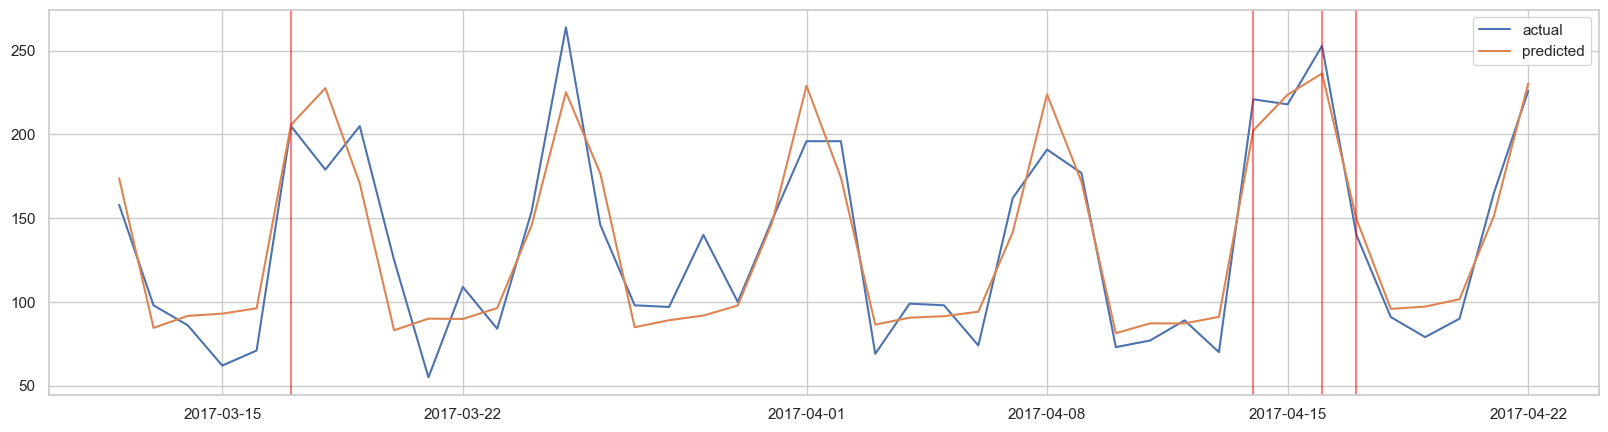

In [148]:
plt.plot(dfo.tail(42)["date"], test_y, label="actual")
plt.plot(dfo.tail(42)["date"], y_pred, label="predicted")
for x in dfo[-42: ].query("holiday == 1")["date"]:
    plt.axvline(x = x, color = "red", alpha = 0.5)
plt.legend()

# Facebook's Prophet Library
This library was created to address some complex forecasting needs at Facebook.

Documentation: https://facebook.github.io/prophet/docs/quick_start.html#python-api

The most advanced model that captures most of the ingredients is SARIMAX. But SARIMAX has some short comings,
1. Outliers and missing values must be handled.
2. There could be multiple seasonalities in the time series, which SARIMAX does not considers.

In the Facebook's prophet library, the forecast is defined as, y(t) = g(t) + s(t) + h(t) + error

Where,
- g(t) = trend (linear/ logistic)
- s(t) = periodic changes (weekly/ monthly/ yearly seasonality)
- h(t) = effect of holidays (user provided) with irregular schedules

The output is a combination of all of the above mentioned parameters.

In [149]:
df = pd.read_csv("rest_vis.csv")
df.head()

date   weekday  holiday  total
0  1/1/2016    Friday        1  296.0
1  1/2/2016  Saturday        0  191.0
2  1/3/2016    Sunday        0  202.0
3  1/4/2016    Monday        0  105.0
4  1/5/2016   Tuesday        0   98.0

In [150]:
df["ds"] = pd.to_datetime(df["date"])
df["y"] = df["total"]
df = df[["ds", "y", "holiday"]]
df.head()

ds      y  holiday
0 2016-01-01  296.0        1
1 2016-01-02  191.0        0
2 2016-01-03  202.0        0
3 2016-01-04  105.0        0
4 2016-01-05   98.0        0

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ds       517 non-null    datetime64[ns]
 1   y        478 non-null    float64       
 2   holiday  517 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 12.2 KB


Importing plotly failed. Interactive plots will not work.
23:16:53 - cmdstanpy - INFO - Chain [1] start processing
23:16:53 - cmdstanpy - INFO - Chain [1] done processing


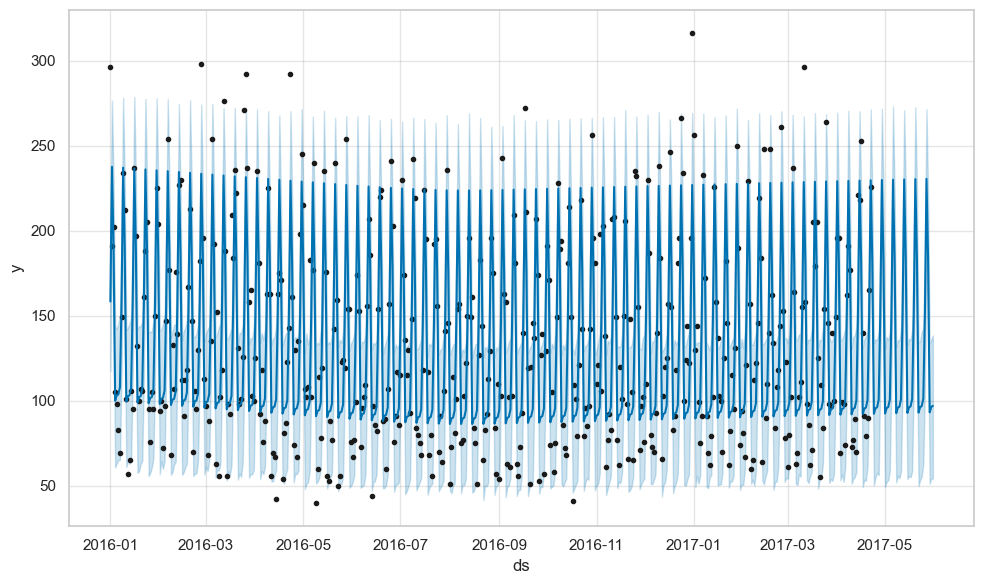

In [152]:
from prophet import Prophet

# defining the model
model = Prophet()

# fitting the model
model.fit(df[["ds", "y"]][: -39])

# creating future data
future = model.make_future_dataframe(periods = 39, freq = "D")
forecast = model.predict(future)
fig = model.plot(forecast)

# the blck dots are the actual number of visits
# the dark blue line is the forecast
# the light blue line is the 95% CI
# no need to treat the missing values

In [153]:
forecast.tail(4)

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
513 2017-05-28  136.049083  141.642864  221.284793   135.866129   136.221733   
514 2017-05-29  136.073641   51.214962  133.654578   135.881841   136.260422   
515 2017-05-30  136.098200   54.251721  135.914728   135.895765   136.294715   
516 2017-05-31  136.122758   54.167907  138.406803   135.909700   136.328726   

     additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
513       46.763919             46.763919             46.763919  46.763919   
514      -42.862660            -42.862660            -42.862660 -42.862660   
515      -39.698799            -39.698799            -39.698799 -39.698799   
516      -39.108463            -39.108463            -39.108463 -39.108463   

     weekly_lower  weekly_upper  multiplicative_terms  \
513     46.763919     46.763919                   0.0   
514    -42.862660    -42.862660                   0.0   
515    -39.698799    -39.698799                   0.0   
516    -39.108463    -39.108463                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper        yhat  
513                         0.0                         0.0  182.813001  
514                         0.0                         0.0   93.210981  
515                         0.0                         0.0   96.399400  
516                         0.0                         0.0   97.014295

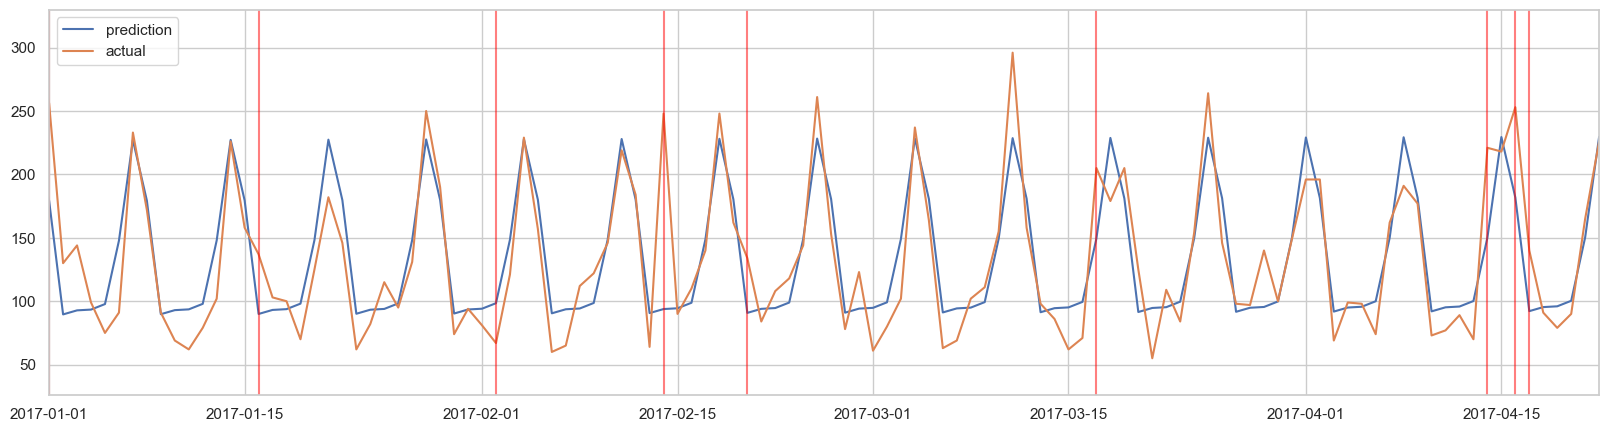

In [154]:
# plotting actuals and predictions
plt.plot(forecast["ds"], forecast["yhat"], label = "prediction")
plt.plot(df["ds"], df["y"], label = "actual")
for x in df.query("holiday == 1")["ds"]:
    plt.axvline(x = x, color = "red", alpha = 0.5)
plt.xlim(pd.to_datetime("2017-01-01"), pd.to_datetime("2017--4-22"))
plt.legend()

In [155]:
# calculating the test performance
performance(df["y"][: -39], forecast["yhat"][: -39])

MAE :  24.057
RMSE :  31.987
MAPE:  0.213


23:16:54 - cmdstanpy - INFO - Chain [1] start processing
23:16:54 - cmdstanpy - INFO - Chain [1] done processing


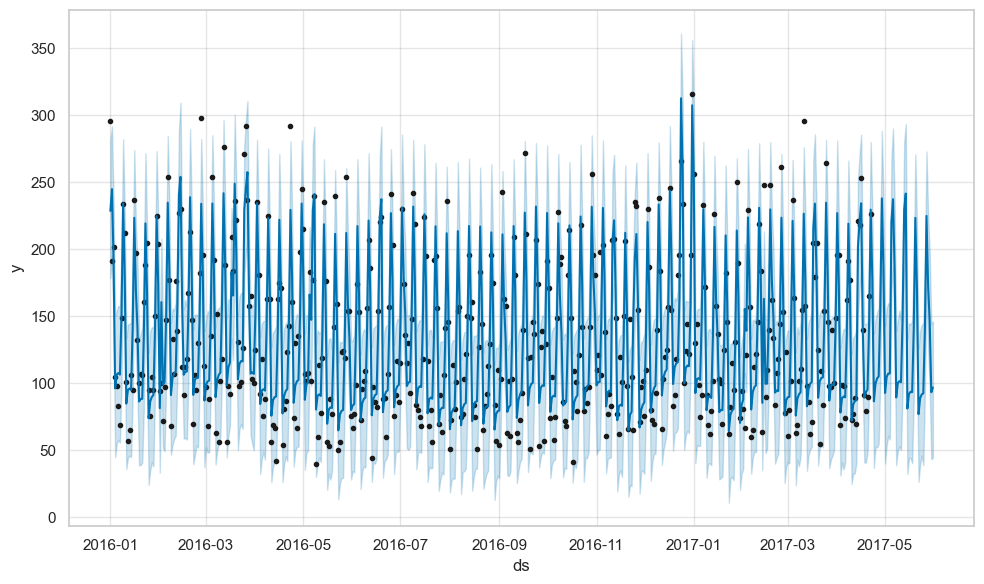

In [156]:
# playing around with the available attributes
model2 = Prophet(interval_width = 0.95, yearly_seasonality = True, weekly_seasonality = True,
               changepoint_prior_scale = 4)
model2.add_regressor("holiday") # adding holidays data in the model3
model2.fit(df[: -39])
forecast2 = model2.predict(df)
fig = model2.plot(forecast2)

In [157]:
# calculating the test performance
performance(df["y"][: -39],forecast2["yhat"][: -39])

MAE :  19.925
RMSE :  25.674
MAPE:  0.18


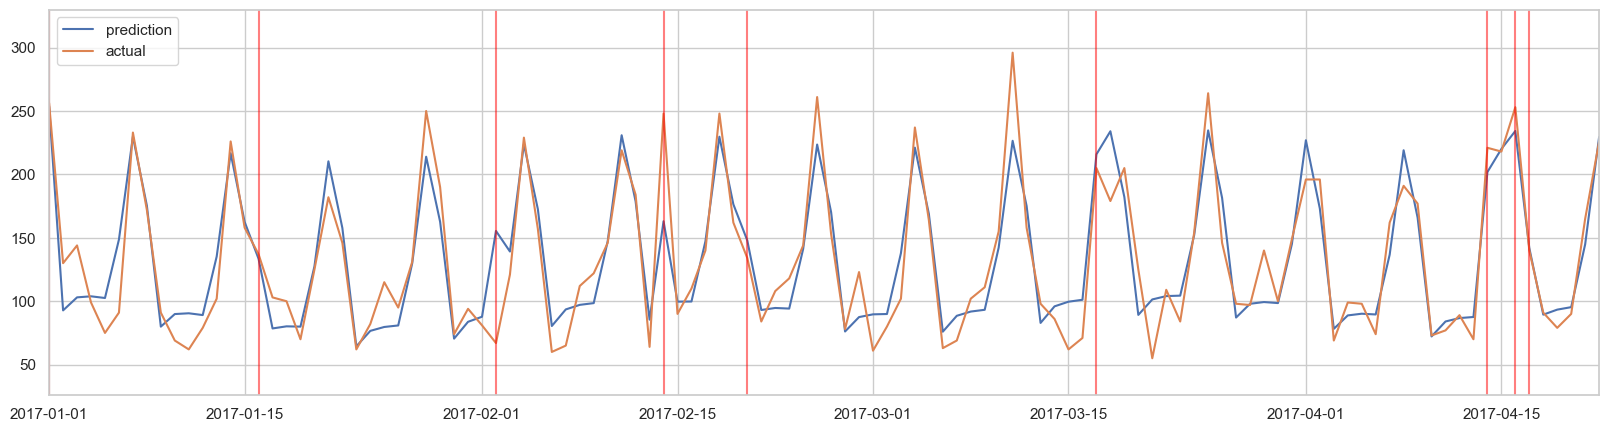

In [158]:
# plotting actuals and predictions
plt.plot(forecast["ds"], forecast2["yhat"], label = "prediction")
plt.plot(df["ds"], df["y"], label = "actual")
plt.xlim(pd.to_datetime("2017-01-01"), pd.to_datetime("2017--4-22"))
for x in df.query("holiday == 1")["ds"]:
    plt.axvline(x = x, color = "red", alpha = 0.5)
plt.legend()

23:16:55 - cmdstanpy - INFO - Chain [1] start processing
23:16:55 - cmdstanpy - INFO - Chain [1] done processing


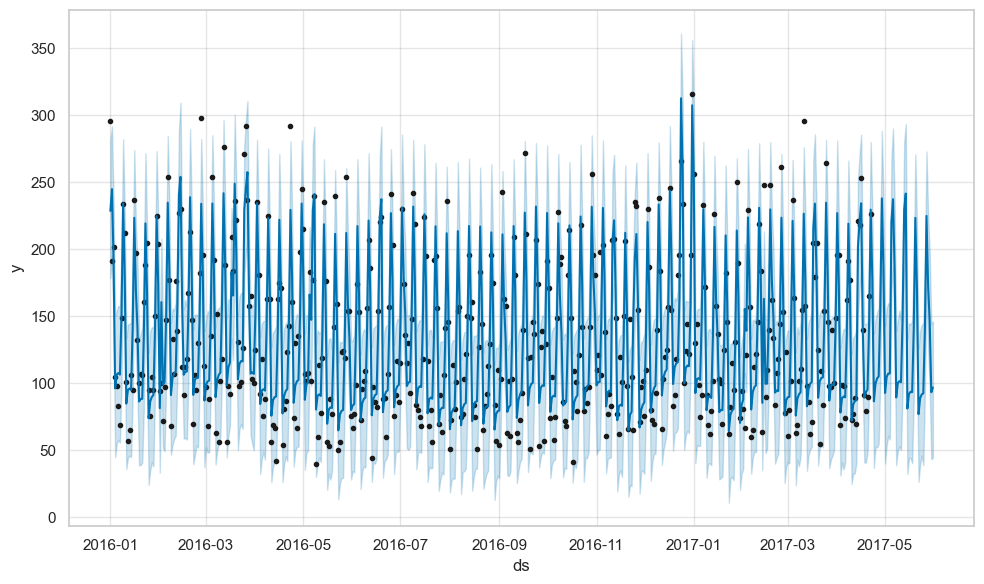

In [159]:
# including the holiday parameter
model3 = Prophet(interval_width = 0.95, yearly_seasonality = True, weekly_seasonality = True,
               changepoint_prior_scale = 4)
model3.add_country_holidays(country_name = "US") # adding holidays data in the model2
model3.fit(df[: -39])
future = model3.make_future_dataframe(periods = 39,freq = "D")
forecast3 = model3.predict(df)
fig = model3.plot(forecast2)

In [160]:
# calculating the test performance
performance(df["y"][: -39],forecast3["yhat"][: -39])

MAE :  20.938
RMSE :  27.727
MAPE:  0.184


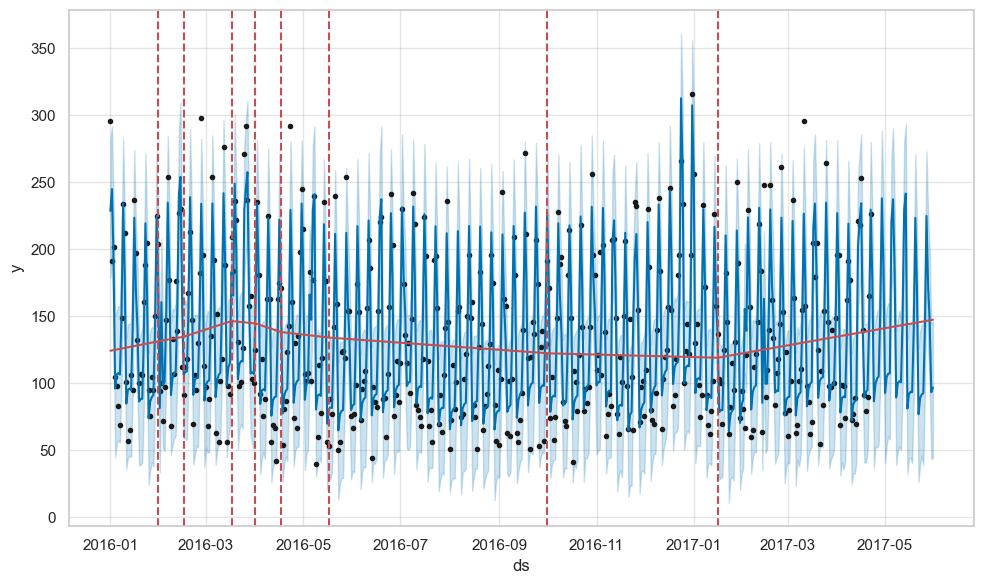

In [161]:
# automatic change point detection
from prophet.plot import add_changepoints_to_plot
fig = model2.plot(forecast2)
a = add_changepoints_to_plot(fig.gca(), model2, forecast2)